# Movie’s world

### As a movie’s lover since a long time ago, I ask myself a few questions about them:

#### 1-	What kind of movies this industry interested in?

#### 2-	How much this sector is growth?

#### 3-	How much time we usually spend watching movies or TV-shows?

#### 4-	Who is this biggest winner?

#### 5- what is the releation between movies budget and movies gross?

##### I will use some dataset of movies and companies working in this


### Importing Libraries

In [169]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
from termcolor import colored
import warnings
import statsmodels.api as sm
from sklearn.preprocessing import MultiLabelBinarizer

warnings.filterwarnings("ignore")

sns.set_style("whitegrid", {"font.family": ["serif"]})
sns.set_context("talk")

%pylab inline
%config InlineBackend.figure_formats = ['retina']


Populating the interactive namespace from numpy and matplotlib


### Importing data

In [170]:
#This is Netflex movies has more details about movies descraption
NetflixMovies = pd.read_csv('netflix_titles.csv')
#This is IMDb movies contains 
IMDbmovies = pd.read_csv('IMDb movies.csv')
#This is Netflex movies has more details about movies budget and gross
ModelMovies = pd.read_csv('Movies.csv')
print('Netflix Movies = ',NetflixMovies.shape,'IMDb movies = ',IMDbmovies.shape,'Movies = ',ModelMovies.shape)

Netflix Movies =  (8807, 12) IMDb movies =  (85855, 22) Movies =  (7668, 15)


# EDA 

### 1.NetflixMovies

####  features descripction

In [171]:
NetflixMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Change date type to Date

In [172]:
NetflixMovies['date_added'] = pd.to_datetime(NetflixMovies.date_added)

### Check nulls

In [173]:
NetflixMovies.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [174]:
NetflixMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [175]:
NetflixMovies.drop(['show_id','director','cast','country'],
  axis='columns', inplace=True)

In [176]:
NetflixMovies.head()

type                  title date_added  release_year rating   duration  \
0    Movie   Dick Johnson Is Dead 2021-09-25          2020  PG-13     90 min   
1  TV Show          Blood & Water 2021-09-24          2021  TV-MA  2 Seasons   
2  TV Show              Ganglands 2021-09-24          2021  TV-MA   1 Season   
3  TV Show  Jailbirds New Orleans 2021-09-24          2021  TV-MA   1 Season   
4  TV Show           Kota Factory 2021-09-24          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

### Instead of deleting missing records I prefer to find the low counts missing information about rating online 

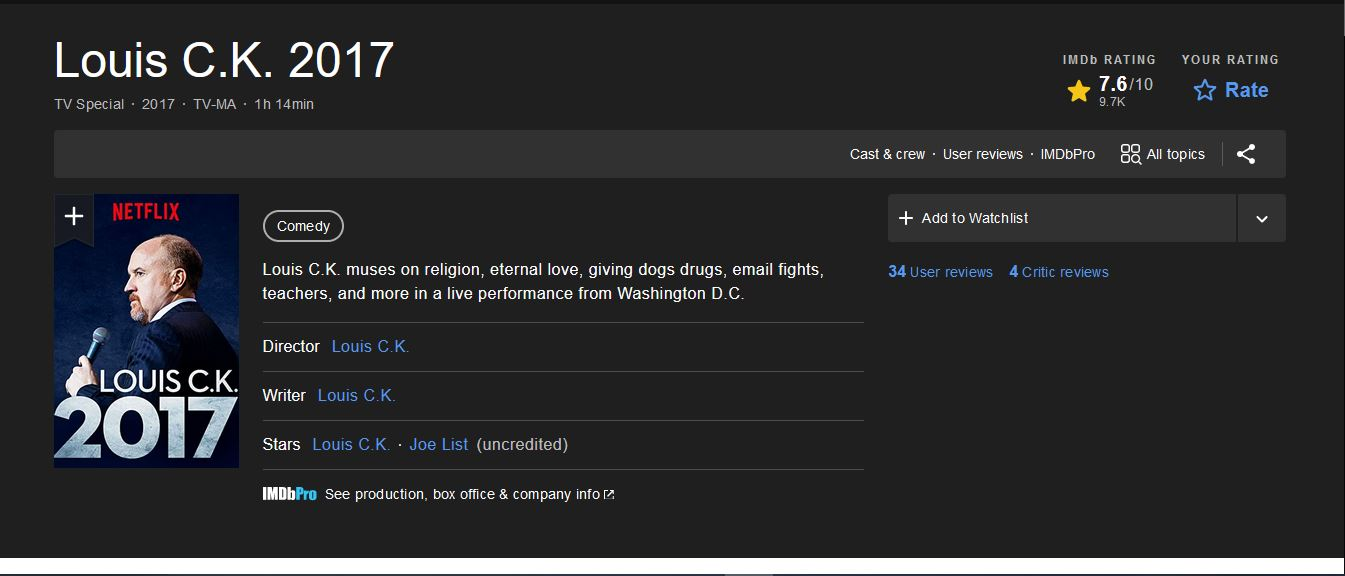

In [177]:
from IPython.display import Image
Image(filename='Louis c k 2017.JPG')

### Check nulls

In [178]:
NetflixMovies.isna().sum()

type             0
title            0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

### Add a counter line

In [179]:
NetflixMovies['counter'] = 1

### Drop nulls 

In [180]:
NetflixMovies.dropna(inplace= True)

### Check nulls again

In [181]:
NetflixMovies.isna().sum()

type            0
title           0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
counter         0
dtype: int64

### Note: The Movies rating system definition

### Add some functions

#### Function for getting rating shorts to full name

In [182]:
def get_rating(rating):
    if rating =='PG-13':
        return 'Parents Strongly Cautioned'
    elif rating=='TV-MA': return 'TV Mature Audience Only'
    elif rating=='PG':return 'Parental Guidance Suggested'
    elif rating=='TV-PG':return 'Parental Guidance Suggested'
    elif rating=='TV-14':return 'Parents Strongly Cautioned'
    elif rating=='TV-Y':return 'All Children'
    elif rating=='TV-Y7':return 'Directed to Older Children'
    elif rating=='R': return'R – Restricted'
    elif rating=='TV-G':return 'General Audience'
    elif rating=='G': return 'G – General Audience'
    elif rating=='NC-17' : return 'No Children 17 or Under'
    elif rating=='NR' : return 'Not Rated'
    elif rating=='TV-Y7-FV': return 'fantasy violence'
    elif rating=='UR' : return 'Not Rated'

#### Function for getting rating short name to a new cat based on suitablity for kids

## Any movie will rate with is contains one or more of the following:
    

In [183]:
def for_kids(rating):
    if rating =='PG-13': return 'unsuitable for children under 17'
    elif rating=='TV-MA': return 'unsuitable for children under 17'
    elif rating=='PG':return 'unsuitable for children under 17'
    elif rating=='TV-PG':return 'unsuitable for children under 17'
    elif rating=='TV-14':return 'unsuitable for children under 17'
    elif rating=='TV-Y':return 'General Audience'
    elif rating=='TV-Y7':return 'unsuitable for children under 17'
    elif rating=='R': return'unsuitable for children under 17'
    elif rating=='TV-G':return 'General Audience'
    elif rating=='G': return 'General Audience'
    elif rating=='NC-17' : return 'unsuitable for children under 17'
    elif rating=='NR' : return 'Not Rated'
    elif rating=='TV-Y7-FV': return 'unsuitable for children under 17'
    elif rating=='UR' : return 'Not Rated'

### Apply functions on dataframe

In [184]:
NetflixMovies['Calssifcation'] = NetflixMovies.rating.apply(get_rating)
NetflixMovies['suitable_for_children'] = NetflixMovies.rating.apply(for_kids)

### Extract the running time from the straing column

In [185]:
NetflixMovies['RunnibgTime'] = NetflixMovies['duration'].str.extract('(\d+)').astype(str).astype(int)


### Rename the release_year to year for merging latter on

In [186]:
NetflixMovies.rename(columns={'release_year' : 'year'},inplace=True)


### I will split the dataframe to two Movies and TVShows

In [187]:
Movies = NetflixMovies[NetflixMovies['type']=='Movie']

In [188]:
TVShows = NetflixMovies[NetflixMovies['type']=='TV Show']

### Function for getting running time for TV Shows

#### Accourding to many studies the avrage tv show is 7 episodes and the avrage running time is 40 Mins 
I will calulate the running time based on average for tv shows

In [189]:
def FindDuration (RunnibgTime):
        return ((RunnibgTime * 7)*40)

### Apply FindDuration function on TVShows to get total running time

In [190]:
TVShows['RunnibgTime']=TVShows.RunnibgTime.apply(FindDuration)#.astype(str).astype(int)


### Create a new column to get RunnibgTime in hours for TV Shows due to the big running time 

In [191]:
TVShows['RunnibgTime_in_hours']=TVShows['RunnibgTime']/60

### Function for getting genres for Movies and TV Shows from listed_in column and apply correlation_heatmap 

In [192]:
# Define a function takes the dataframe and type to calculate the the counts for each type

def correlation_heatmap(data, title,style):
# data['genre'] will calculate all genre in listed_in column and lambda will remove spaces and split them 
    data['genre'] = data['listed_in'].apply(lambda t :  t.replace(' ,',',').replace(', ',',').split(',')) 
# Types[] will calculate a unque list of all genre listed in no 
    Types = []
    for i in data['genre']: Types += i
    Types = set(Types)
    
#line will print the type and how many types we have in Movies or TV Shoes    
    print("There are {} Types of {}s in Netflix dataset".format(len(Types),title))    

    # Using the MultiLabelBinarizer library to Encode the multilabel data in MLB Format   
    testFile = data['genre']

    #Start the MultiLabelBinarizer 
    genre_mlb = MultiLabelBinarizer()
    
#This file will takes the incoded array out of our MultiLabelBinarizer fitted file by our textFile index 
    newFile = pd.DataFrame(genre_mlb.fit_transform(testFile), columns=genre_mlb.classes_, index=testFile.index)
#    
    correlation = newFile.corr()
#Make a mask to return the indices for the upper-triangle of our array
    Upermask = np.zeros_like(correlation, dtype=np.bool)
    Upermask[np.triu_indices_from(Upermask)] = True

# Heat map setting values 
    fig, ax = plt.subplots(figsize = (12, 12))
    sns.heatmap(correlation, mask=Upermask , cmap= style , vmax=1, vmin=-1, center=0, square=True, linewidths=.7,cbar_kws={"shrink": 0.6})
# Saving the heat map as a image with a name of fugirename.png   
    plt.savefig('fugirename.png')
#Show the heat map    
    plt.show()
# You can change the cmap with many types below    
#cmap choosies:    
               #"coolwarm"
               #'YlGnBu'

## 1.  Movies Genre Correlation

There are 20 Types of Movies in Netflix dataset


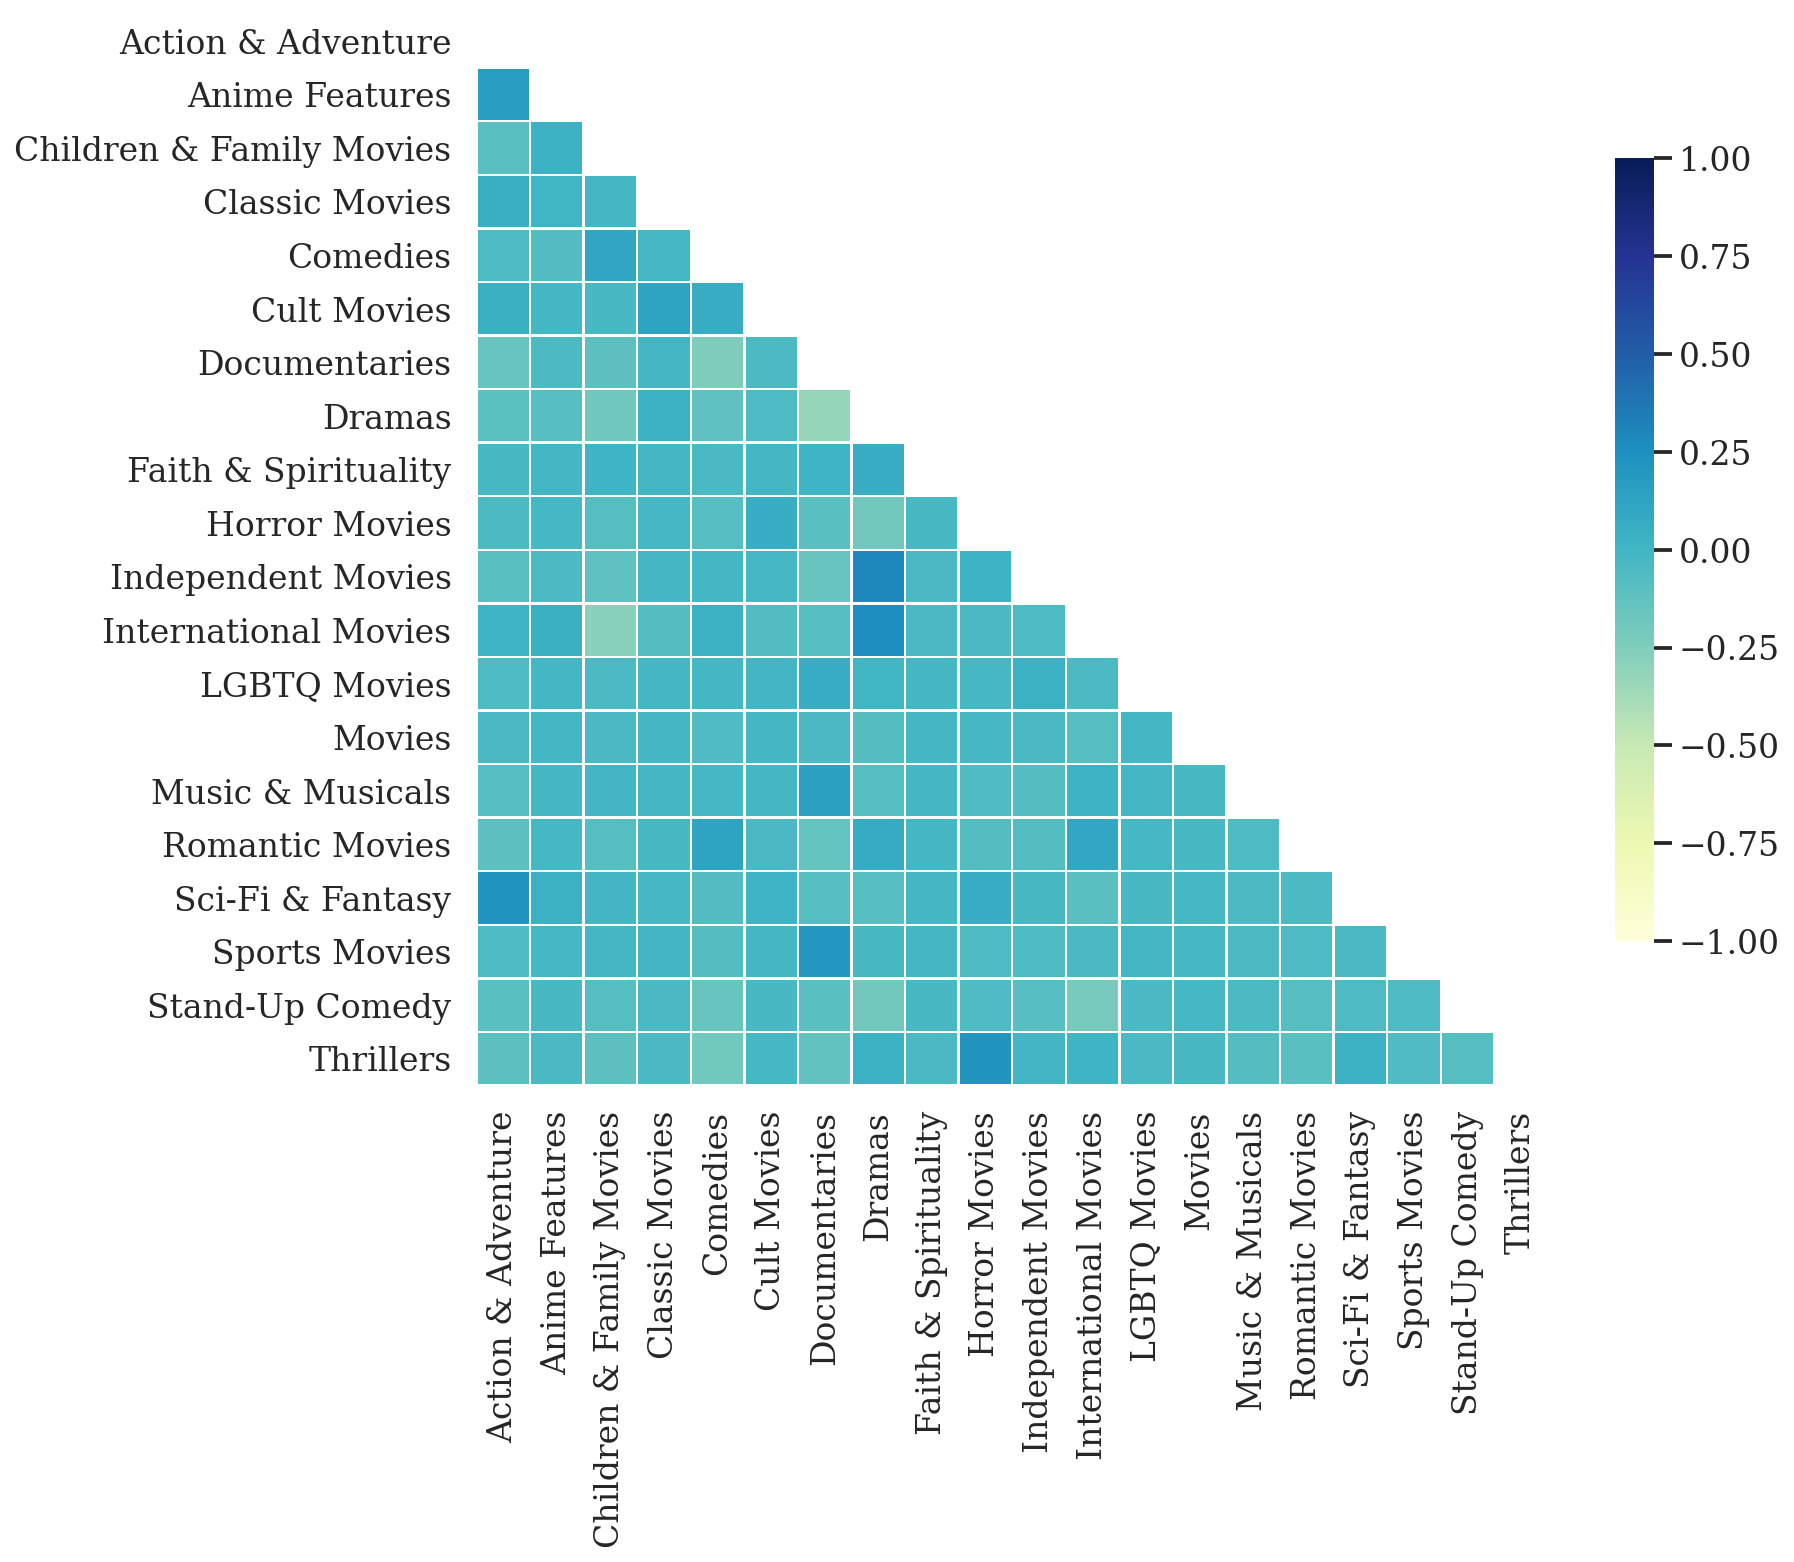

In [193]:
correlation_heatmap(Movies, 'Movie','YlGnBu')

## 2. TV_shows Genre Correlation 

There are 22 Types of TV Shows in Netflix dataset


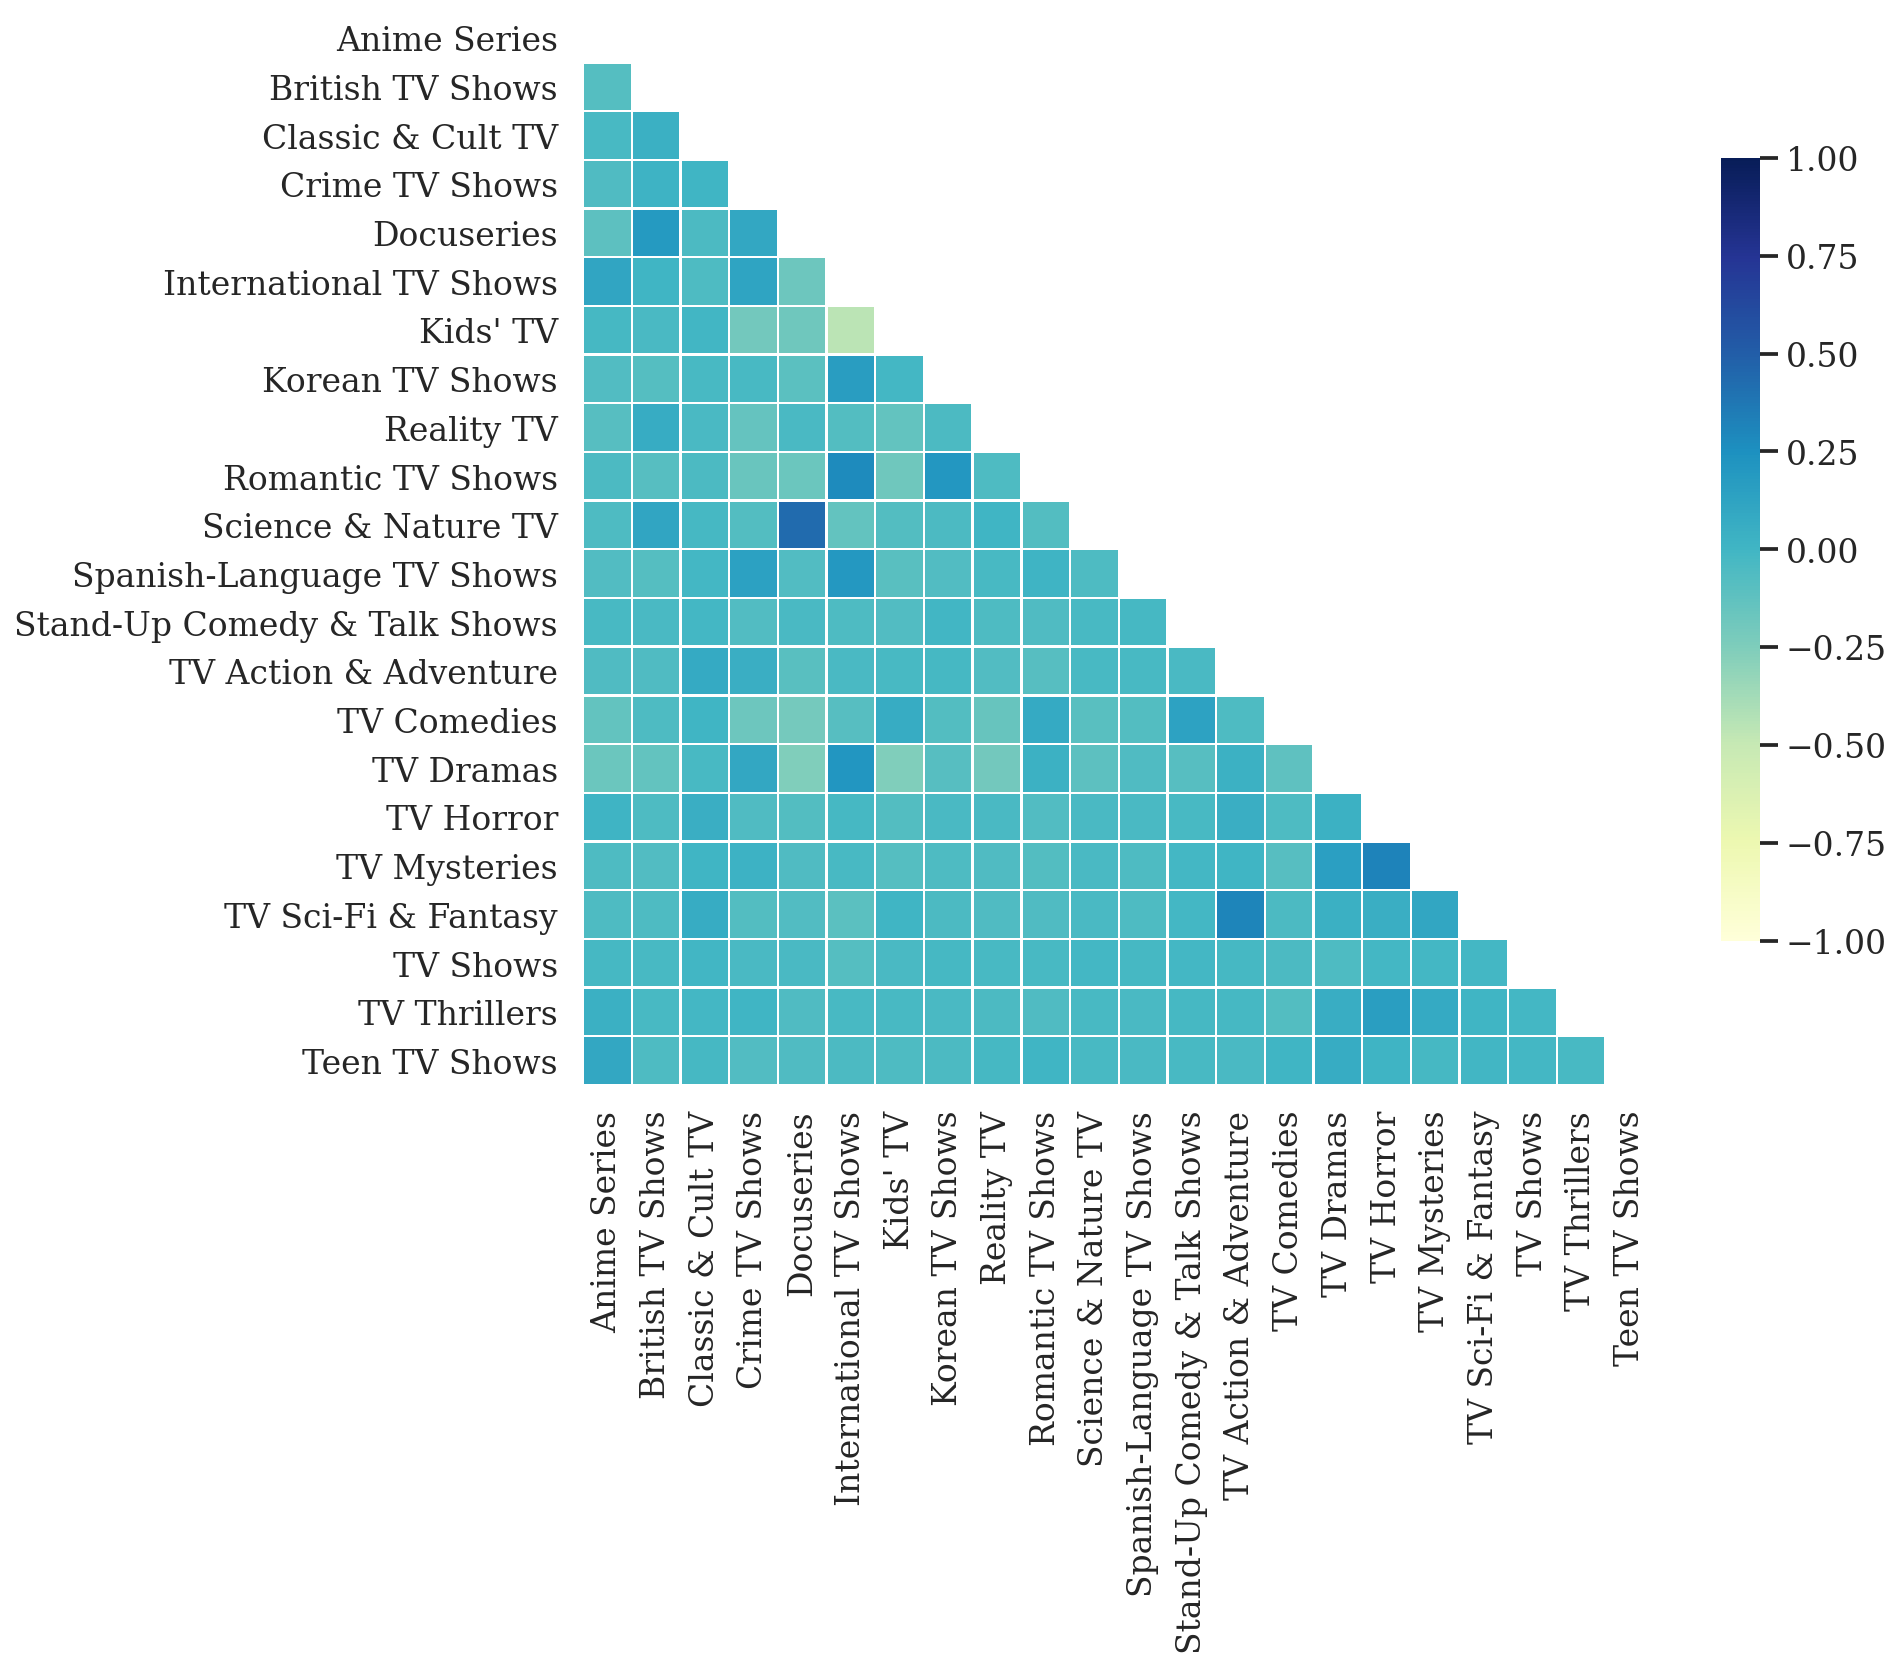

In [194]:
correlation_heatmap(TVShows,'TV Show','YlGnBu')

## 3. overall Correlation 

There are 42 Types of types in Netflix dataset


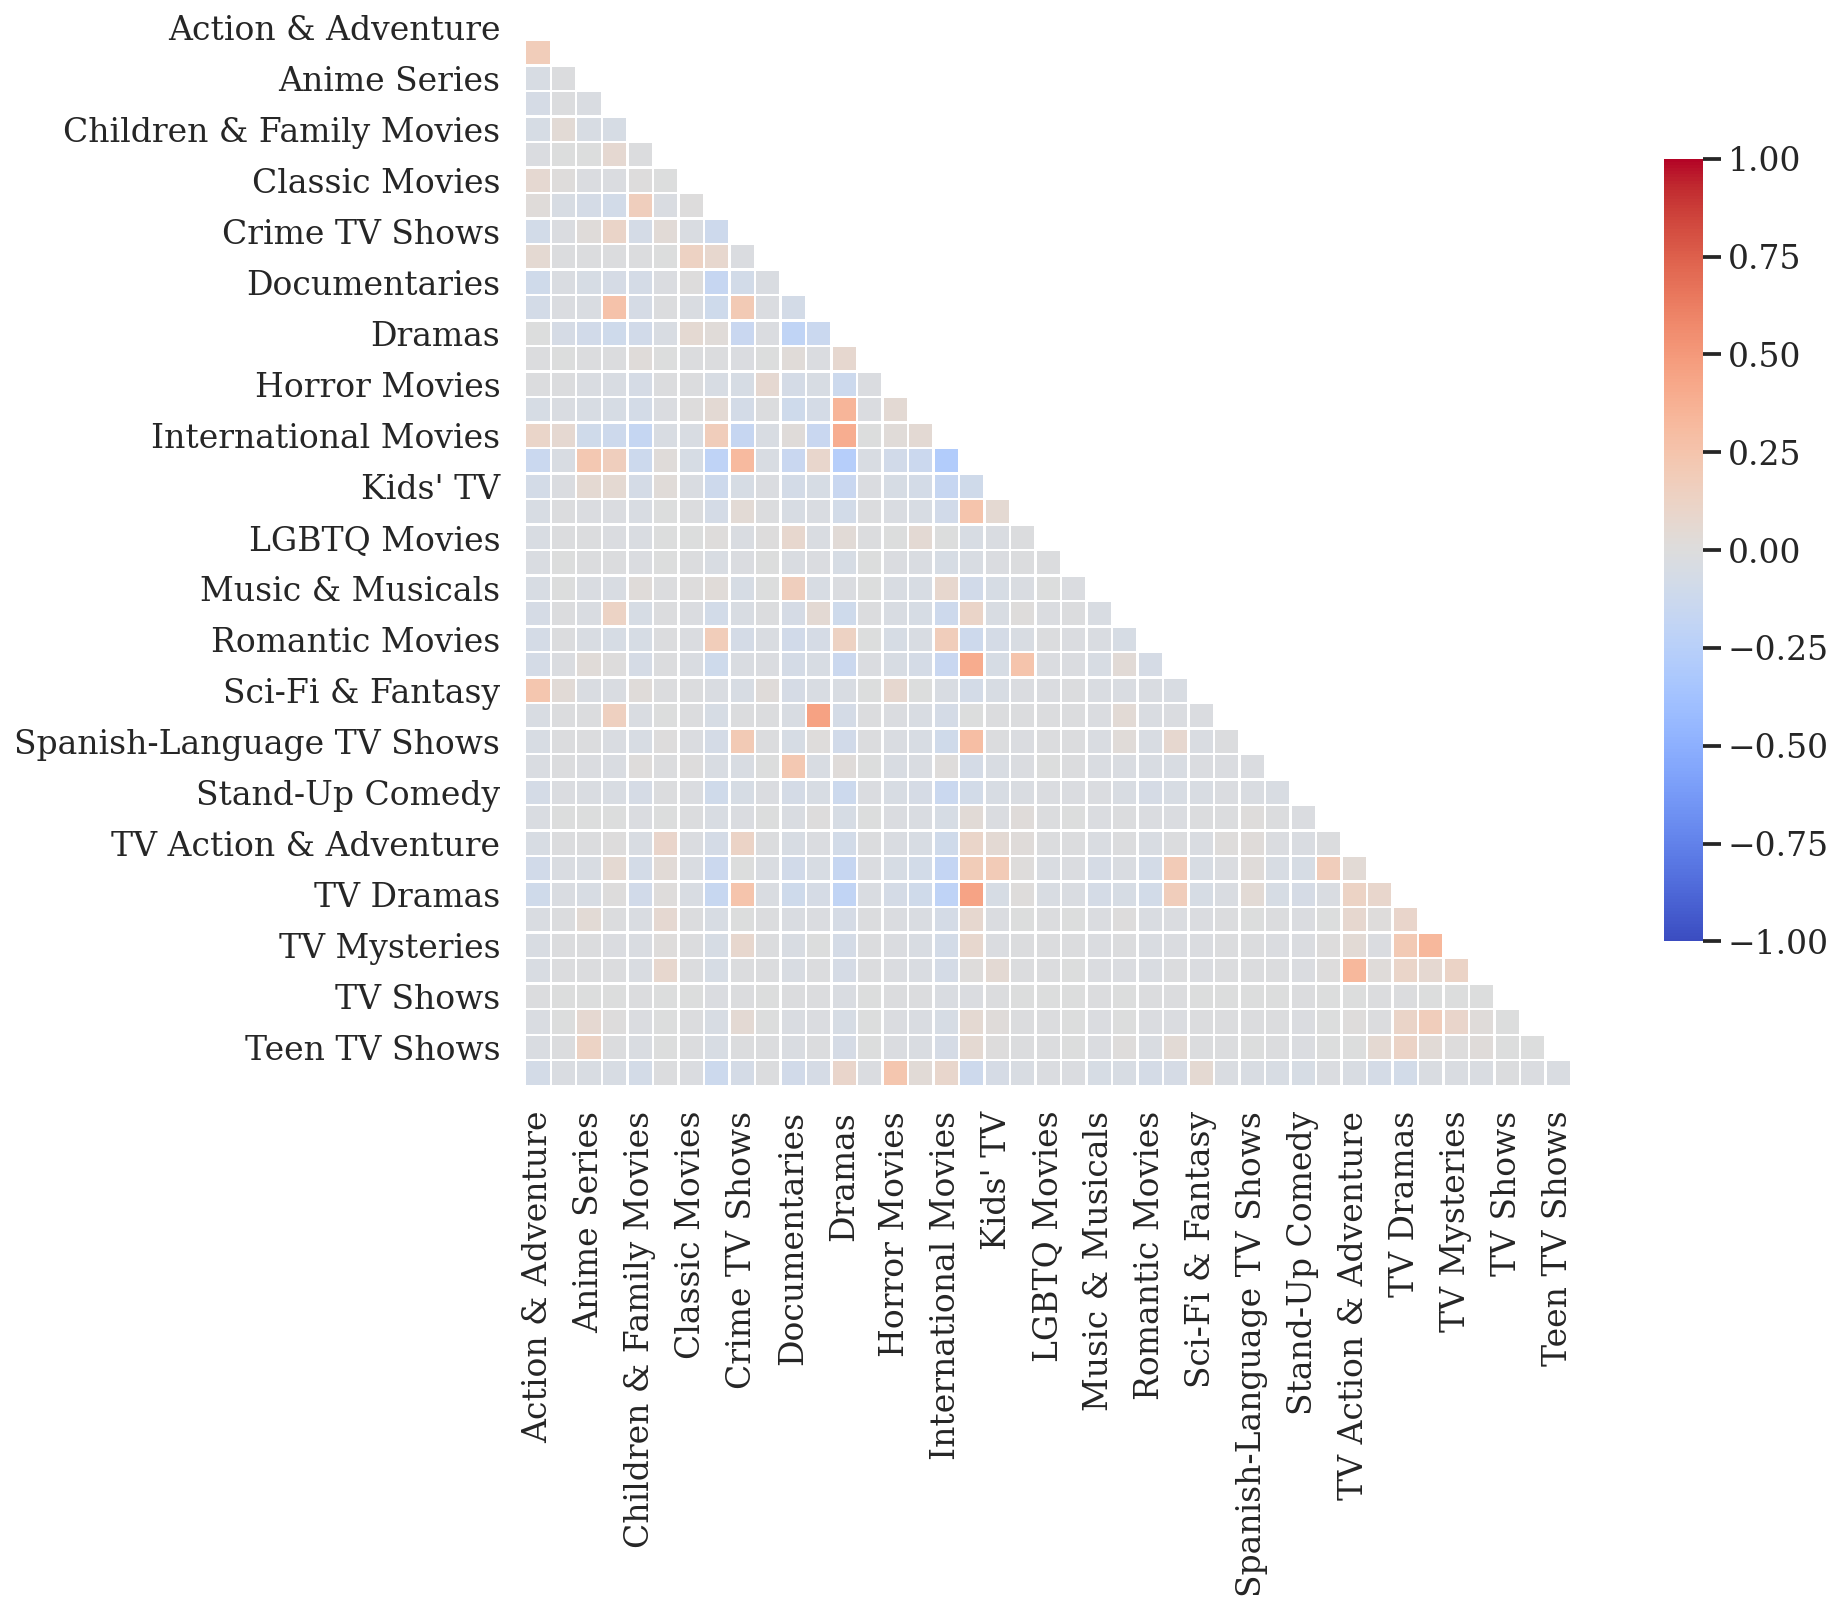

In [195]:
correlation_heatmap(NetflixMovies,'type','coolwarm')

### Add masks to have three tables Overall, Movies and TV-Shows based on suitablity for children

In [196]:
unsuitable17mask = (NetflixMovies['suitable_for_children']=='unsuitable for children under 17') & (NetflixMovies['year']> 1990)


### Apply masks on the dataframe 

In [197]:
unsuitable17 = NetflixMovies[unsuitable17mask]



### Create short tables for suitable and unsuitable 
#### 1.USTable 
#### 2.GAtable

In [198]:
USTable = unsuitable17.groupby('year')[['counter']].sum()


In [199]:
GeneralAudiencemask = (NetflixMovies['suitable_for_children']=='General Audience') & (NetflixMovies['year']> 1990)


In [200]:
GeneralAudience = NetflixMovies[GeneralAudiencemask]

In [201]:
GAtable = GeneralAudience.groupby('year')[['counter']].sum()


### Create a merged table to compare between suitable and unsuitable Nitflix shows over years 

In [202]:
overall = pd.merge(GAtable, USTable, on='year')

In [203]:
overall['total'] = overall.counter_x + overall.counter_y


In [204]:
overall['suitable %'] = (overall.counter_x / overall.total)*100


In [205]:
overall['unsuitable %'] = (overall.counter_y / overall.total)*100


In [206]:
overall['diff bt suitable and unsuitable'] = overall.counter_y - overall.counter_x


In [207]:
overall.rename(columns={'counter_x' : 'suitable',
                        'counter_y' : 'unsuitable'
                        },inplace=True)
overall

suitable  unsuitable  total  suitable %  unsuitable %  \
year                                                          
1991         2          13     15   13.333333     86.666667   
1992         1          22     23    4.347826     95.652174   
1993         1          27     28    3.571429     96.428571   
1994         1          21     22    4.545455     95.454545   
1995         2          23     25    8.000000     92.000000   
1997         3          35     38    7.894737     92.105263   
1998         2          34     36    5.555556     94.444444   
1999         4          35     39   10.256410     89.743590   
2000         2          35     37    5.405405     94.594595   
2001         3          42     45    6.666667     93.333333   
2003         1          58     59    1.694915     98.305085   
2004         4          58     62    6.451613     93.548387   
2005         2          78     80    2.500000     97.500000   
2007         3          83     86    3.488372     96.511628   
2008         6         128    134    4.477612     95.522388   
2009         5         147    152    3.289474     96.710526   
2010         8         180    188    4.255319     95.744681   
2011        11         172    183    6.010929     93.989071   
2012        11         220    231    4.761905     95.238095   
2013        18         259    277    6.498195     93.501805   
2014        23         322    345    6.666667     93.333333   
2015        31         507    538    5.762082     94.237918   
2016        56         824    880    6.363636     93.636364   
2017        58         970   1028    5.642023     94.357977   
2018        69        1076   1145    6.026201     93.973799   
2019        74         956   1030    7.184466     92.815534   
2020       105         848    953   11.017838     88.982162   
2021        47         545    592    7.939189     92.060811   

      diff bt suitable and unsuitable  
year                                   
1991                               11  
1992                               21  
1993                               26  
1994                               20  
1995                               21  
1997                               32  
1998                               32  
1999                               31  
2000                               33  
2001                               39  
2003                               57  
2004                               54  
2005                               76  
2007                               80  
2008                              122  
2009                              142  
2010                              172  
2011                              161  
2012                              209  
2013                              241  
2014                              299  
2015                              476  
2016                              768  
2017                              912  
2018                             1007  
2019                              882  
2020                              743  
2021                              498

## 4. Netflix Suitability for children over years

No handles with labels found to put in legend.


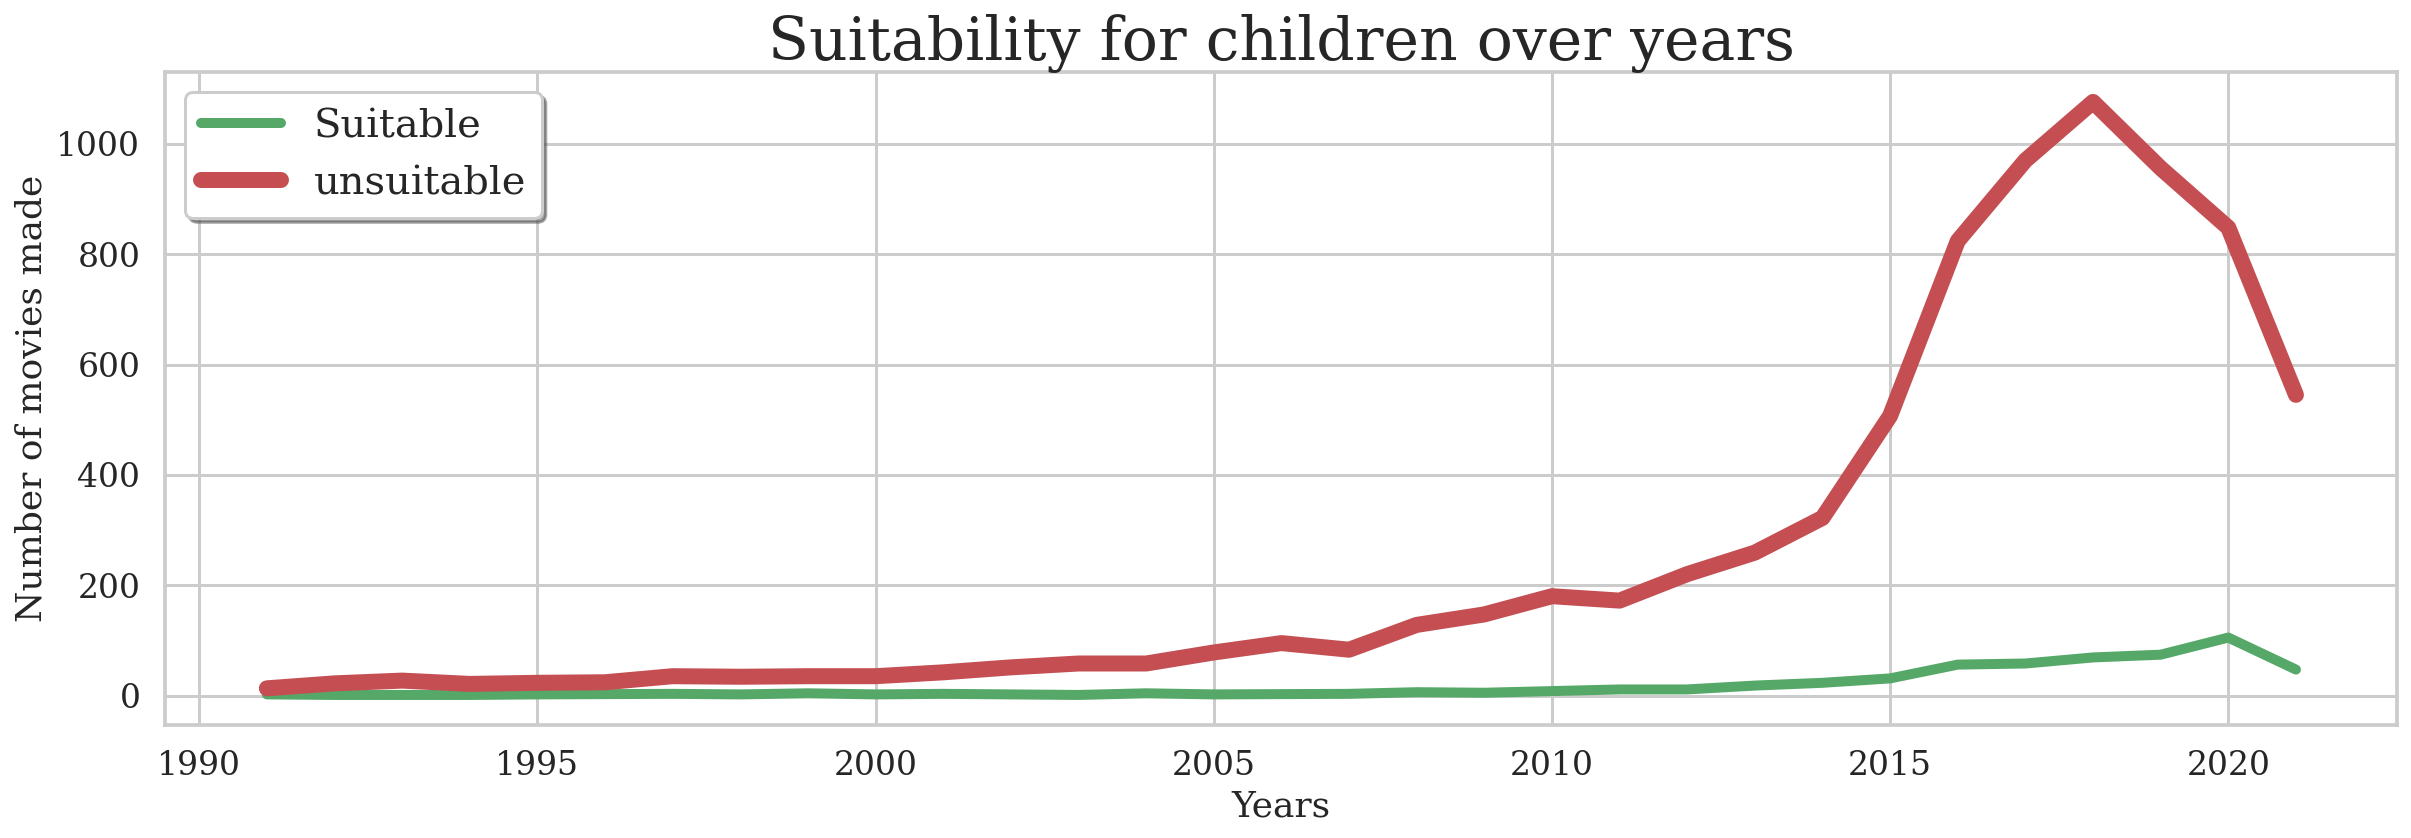

<Figure size 432x288 with 0 Axes>

In [208]:
plt.figure(figsize=[20,6])

plt.plot(GAtable.counter, 'g',linewidth = 5)
plt.plot(USTable.counter,'r', linewidth = 8)
plt.legend()
plt.xlabel("Years")
plt.ylabel("Number of movies made")
plt.title('Suitability for children over years',fontsize=30)
plt.legend(['Suitable','unsuitable'],shadow = True, loc = 2,fontsize=20)
plt.show()   
plt.savefig('Suitability for children over years.png')

In [209]:
overall.describe()

suitable   unsuitable        total  suitable %  unsuitable %  \
count   28.000000    28.000000    28.000000   28.000000     28.000000   
mean    19.750000   275.642857   295.392857    6.057402     93.942598   
std     28.095901   343.465154   370.108226    2.538747      2.538747   
min      1.000000    13.000000    15.000000    1.694915     86.666667   
25%      2.000000    35.000000    37.750000    4.445165     93.203883   
50%      4.500000   105.500000   110.000000    5.886505     94.113495   
75%     25.000000   368.250000   393.250000    6.796117     95.554835   
max    105.000000  1076.000000  1145.000000   13.333333     98.305085   

       diff bt suitable and unsuitable  
count                        28.000000  
mean                        255.892857  
std                         317.072995  
min                          11.000000  
25%                          32.000000  
50%                         101.000000  
75%                         343.250000  
max                        1007.000000

## 5. The avreage % of unsuitable movies over years is 94% and just 6% is Suitable

## 6. Avrage Netflix movies runtime

#### Shortest movie 

In [210]:
Movies['RunnibgTime'].min()

3

In [211]:
Movies.query('RunnibgTime == 3')

type   title date_added  year rating duration  \
3777  Movie  Silent 2019-06-04  2014   TV-Y    3 min   

                                       listed_in  \
3777  Children & Family Movies, Sci-Fi & Fantasy   

                                            description  counter  \
3777  "Silent" is an animated short film created by ...        1   

     Calssifcation suitable_for_children  RunnibgTime  \
3777  All Children      General Audience            3   

                                             genre  
3777  [Children & Family Movies, Sci-Fi & Fantasy]

### The Shortest move is (Silent)

#### Longest movie

In [212]:
Movies['RunnibgTime'].max()

312

### The longest move is (Black Mirror: Bandersnatch)

In [213]:
Movies.query('RunnibgTime == 312')

type                       title date_added  year rating duration  \
4253  Movie  Black Mirror: Bandersnatch 2018-12-28  2018  TV-MA  312 min   

                                           listed_in  \
4253  Dramas, International Movies, Sci-Fi & Fantasy   

                                            description  counter  \
4253  In 1984, a young programmer begins to question...        1   

                Calssifcation             suitable_for_children  RunnibgTime  \
4253  TV Mature Audience Only  unsuitable for children under 17          312   

                                                 genre  
4253  [Dramas, International Movies, Sci-Fi & Fantasy]

### Average Nitflix movies runtime

<AxesSubplot:title={'center':'Average Nitflix runtime of 6126 movies'}, xlabel='RunningTime', ylabel='Density'>

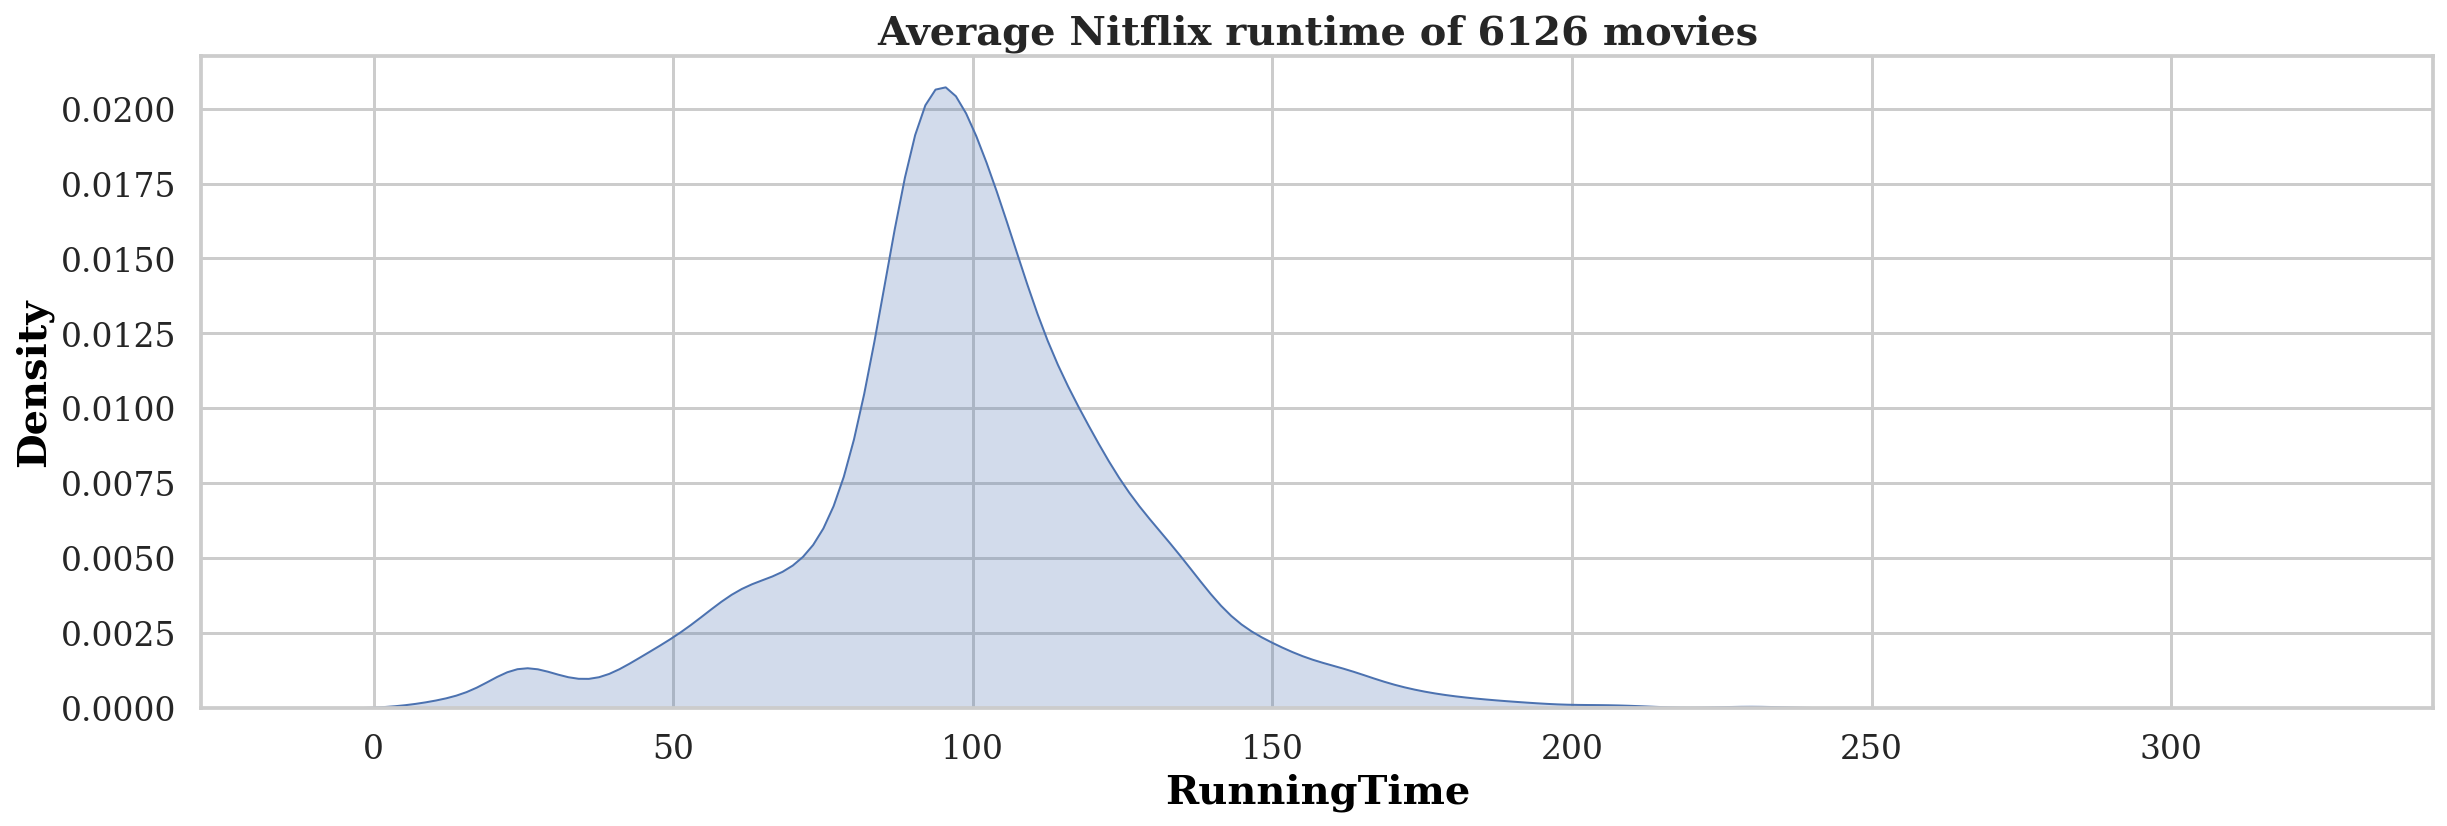

In [214]:
plt.figure(figsize=[20,6])
plt.title('Average Nitflix runtime of {} movies'.format(Movies['title'].count()),fontweight="bold", fontsize=20)
plt.xlabel('RunningTime',fontsize = 20, weight = 'bold',color='black')
plt.ylabel('Density',fontsize = 20, weight = 'bold',color='black')
sns.set(style="darkgrid")
sns.kdeplot(data=Movies['RunnibgTime'], shade=True)

In [215]:
Movies['RunnibgTime'].mean()

99.58488410055502

### . Avrage Netflix TV Show runtime

#### Shortest TV Show

In [216]:
TVShows['RunnibgTime_in_hours'].min()

4.666666666666667

In [217]:
TVShows.query('RunnibgTime_in_hours == 4.666666666666667')

type                                title date_added  year rating  \
2     TV Show                            Ganglands 2021-09-24  2021  TV-MA   
3     TV Show                Jailbirds New Orleans 2021-09-24  2021  TV-MA   
5     TV Show                        Midnight Mass 2021-09-24  2021  TV-MA   
10    TV Show  Vendetta: Truth, Lies and The Mafia 2021-09-24  2021  TV-MA   
11    TV Show                     Bangkok Breaking 2021-09-23  2021  TV-MA   
...       ...                                  ...        ...   ...    ...   
8775  TV Show                      Yeh Meri Family 2018-08-31  2018  TV-PG   
8780  TV Show                         Yo-Kai Watch 2016-04-01  2015  TV-Y7   
8783  TV Show                                 Yoko 2018-06-23  2016   TV-Y   
8785  TV Show                                  YOM 2018-06-07  2016  TV-Y7   
8800  TV Show                   Zindagi Gulzar Hai 2016-12-15  2012  TV-PG   

      duration                                          listed_in  \
2     1 Season  Crime TV Shows, International TV Shows, TV Act...   
3     1 Season                             Docuseries, Reality TV   
5     1 Season                 TV Dramas, TV Horror, TV Mysteries   
10    1 Season  Crime TV Shows, Docuseries, International TV S...   
11    1 Season  Crime TV Shows, International TV Shows, TV Act...   
...        ...                                                ...   
8775  1 Season                International TV Shows, TV Comedies   
8780  1 Season                             Anime Series, Kids' TV   
8783  1 Season                                           Kids' TV   
8785  1 Season                                           Kids' TV   
8800  1 Season  International TV Shows, Romantic TV Shows, TV ...   

                                            description  counter  \
2     To protect his family from a powerful drug lor...        1   
3     Feuds, flirtations and toilet talk go down amo...        1   
5     The arrival of a charismatic young priest brin...        1   
10    Sicily boasts a bold "Anti-Mafia" coalition. B...        1   
11    Struggling to earn a living in Bangkok, a man ...        1   
...                                                 ...      ...   
8775  In the summer of 1998, middle child Harshu bal...        1   
8780  Nate frees a mythical being trapped in a magic...        1   
8783  Friends Mai, Oto and Vik's games at the park b...        1   
8785  With the mind of a human being, and the body o...        1   
8800  Strong-willed, middle-class Kashaf and carefre...        1   

                    Calssifcation             suitable_for_children  \
2         TV Mature Audience Only  unsuitable for children under 17   
3         TV Mature Audience Only  unsuitable for children under 17   
5         TV Mature Audience Only  unsuitable for children under 17   
10        TV Mature Audience Only  unsuitable for children under 17   
11        TV Mature Audience Only  unsuitable for children under 17   
...                           ...                               ...   
8775  Parental Guidance Suggested  unsuitable for children under 17   
8780   Directed to Older Children  unsuitable for children under 17   
8783                 All Children                  General Audience   
8785   Directed to Older Children  unsuitable for children under 17   
8800  Parental Guidance Suggested  unsuitable for children under 17   

      RunnibgTime  RunnibgTime_in_hours  \
2             280              4.666667   
3             280              4.666667   
5             280              4.666667   
10            280              4.666667   
11            280              4.666667   
...           ...                   ...   
8775          280              4.666667   
8780          280              4.666667   
8783          280              4.666667   
8785          280              4.666667   
8800          280              4.666667   

                                                  genre 

#### Longest TV Show

In [218]:
TVShows['RunnibgTime_in_hours'].max()

79.33333333333333

In [219]:
TVShows.query('RunnibgTime_in_hours == 79.33333333333333')

type           title date_added  year rating    duration  \
548  TV Show  Grey's Anatomy 2021-07-03  2020  TV-14  17 Seasons   

                        listed_in  \
548  Romantic TV Shows, TV Dramas   

                                           description  counter  \
548  Intern (and eventual resident) Meredith Grey f...        1   

                  Calssifcation             suitable_for_children  \
548  Parents Strongly Cautioned  unsuitable for children under 17   

     RunnibgTime  RunnibgTime_in_hours                           genre  
548         4760             79.333333  [Romantic TV Shows, TV Dramas]

### 5. Average Netflix TV Show runtime

<AxesSubplot:title={'center':'Average Nitflix runtime of 2664 TVShows'}, xlabel='RunningTime', ylabel='Density'>

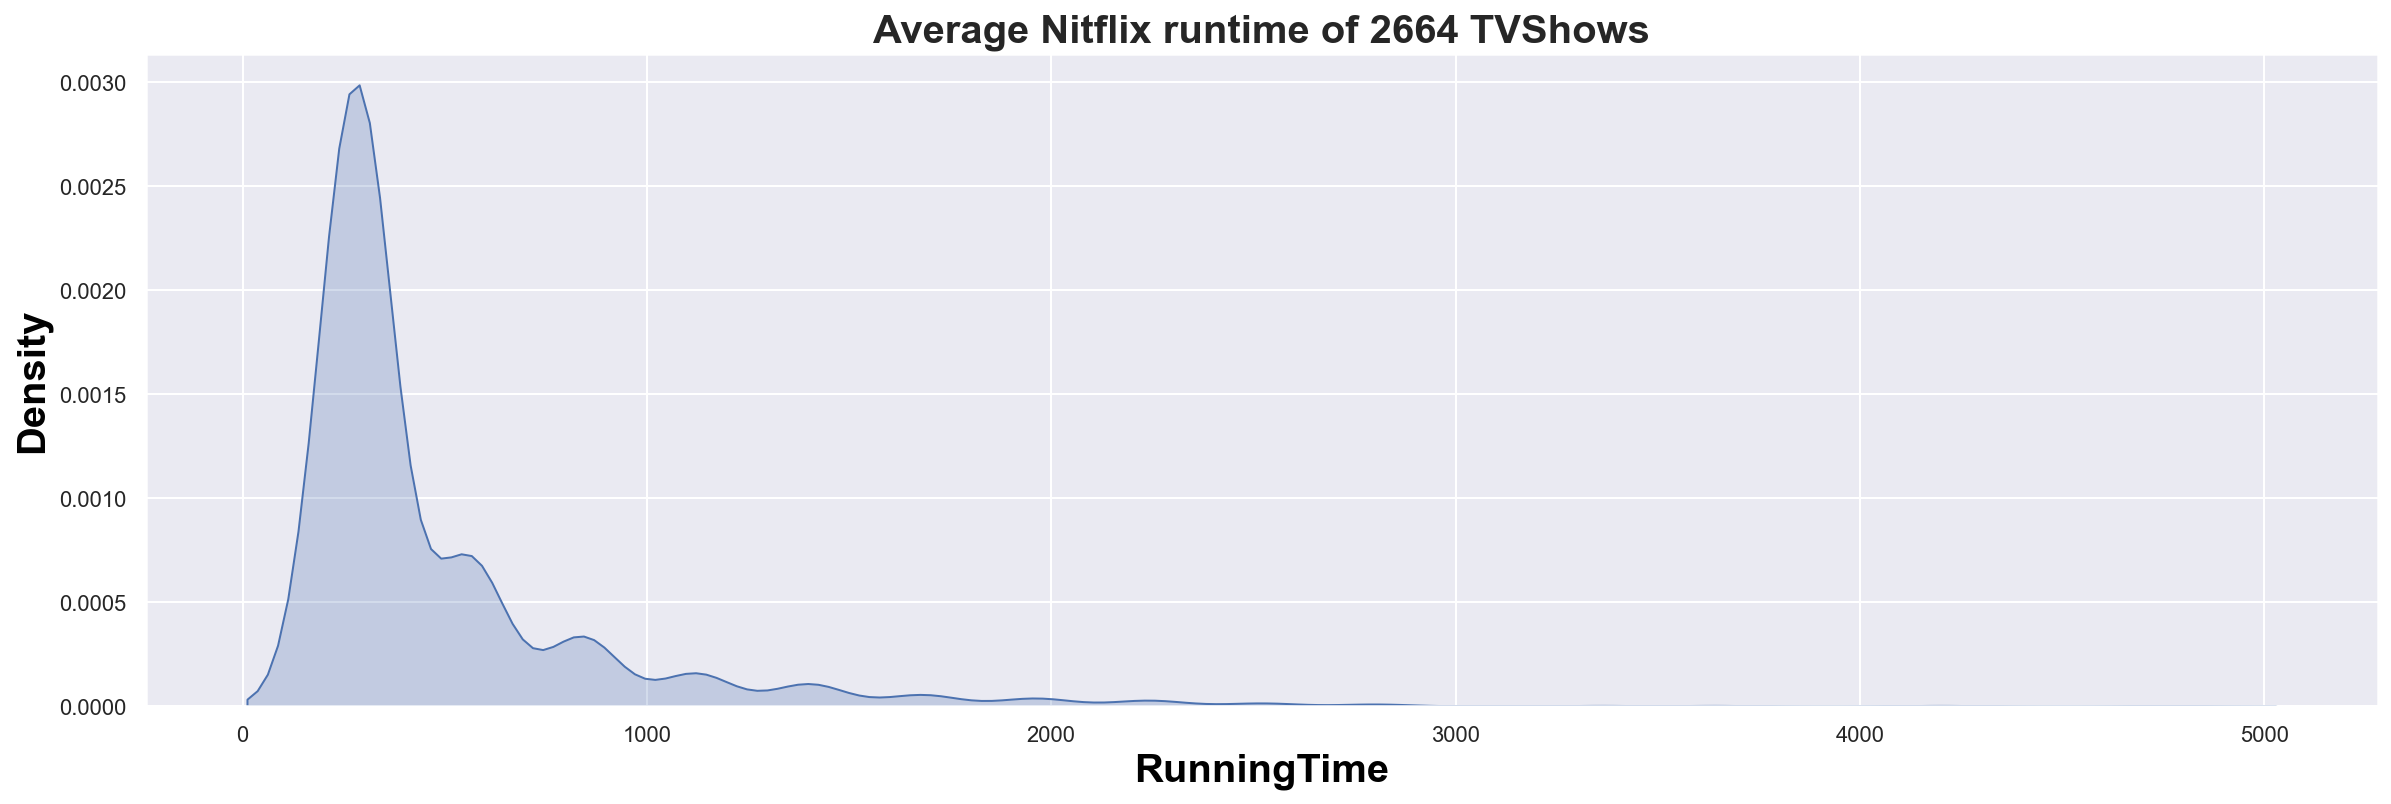

In [220]:
plt.figure(figsize=[20,6])
plt.title('Average Nitflix runtime of {} TVShows'.format(TVShows['title'].count()),fontweight="bold", fontsize=20)
plt.xlabel('RunningTime',fontsize = 20, weight = 'bold',color='black')
plt.ylabel('Density',fontsize = 20, weight = 'bold',color='black')

sns.set(style="darkgrid")
sns.kdeplot(data=TVShows['RunnibgTime'], shade=True)

<AxesSubplot:title={'center':'Average Nitflix runtime of 2664 TVShows in hours'}, xlabel='Duration', ylabel='Density'>

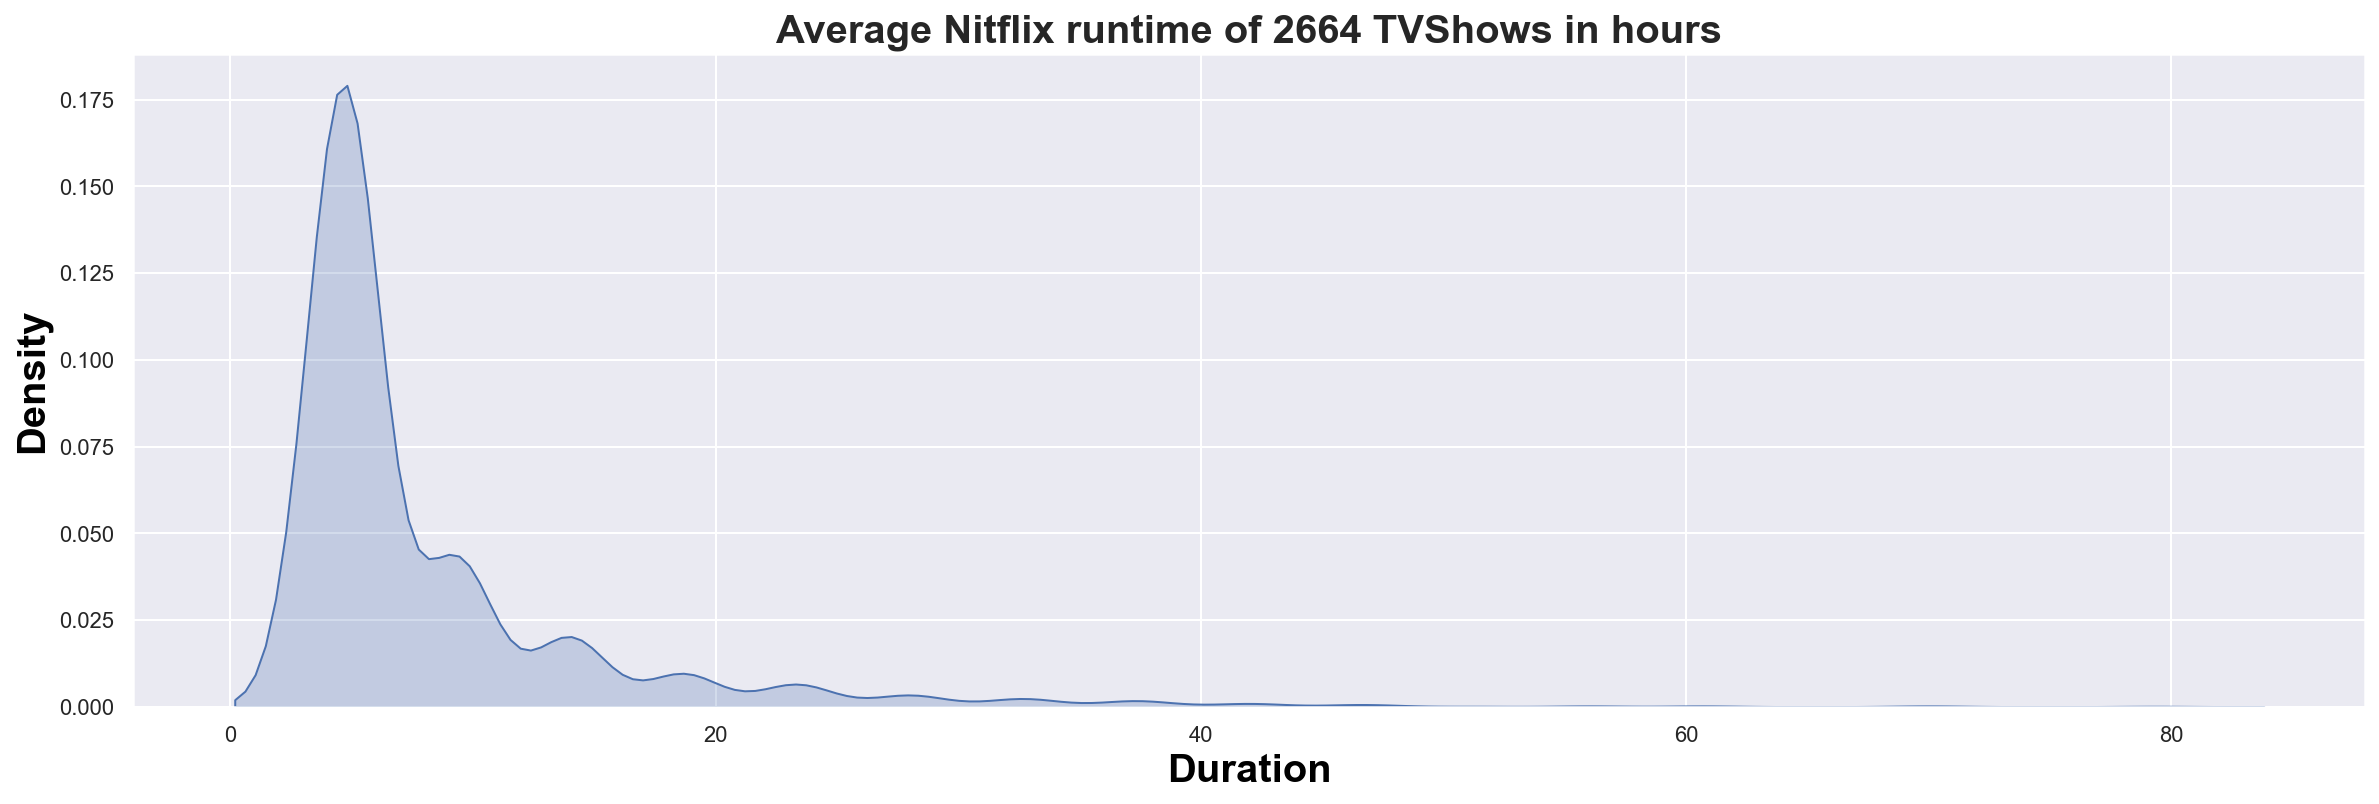

In [221]:
plt.figure(figsize=[20,6])
plt.title('Average Nitflix runtime of {} TVShows in hours'.format(TVShows['title'].count()),fontweight="bold", fontsize=20)
plt.ylabel('Density',fontsize = 20, weight = 'bold',color='black')
plt.xlabel('Duration',fontsize = 20, weight = 'bold',color='black')
sns.set(style="darkgrid")
sns.kdeplot(data=TVShows['RunnibgTime_in_hours'], shade=True)

In [222]:
TVShows['RunnibgTime'].mean()

490.52552552552555

In [223]:
TVShows['RunnibgTime_in_hours'].mean()

8.175425425425509

## Average Netflix TV Show runtime is 490 mins or 9 hours

In [224]:
TVShows['RunnibgTime_in_hours'].mean()

8.175425425425509

#### Average Netflix TV Show runtime is 8 hours

## 7. Netflix history

This data from Netfkix website which released 4 times a year
https://ir.netflix.net/financials/quarterly-earnings/default.aspx

In [225]:
NetfilxFinance = pd.read_csv('Netfilx finance.csv')
NetfilxFinance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years             16 non-null     int64  
 1   embloyees         16 non-null     int64  
 2   changePer         16 non-null     float64
 3   Revenue           10 non-null     float64
 4   RevenueChangePer  9 non-null      float64
 5   Subscribers       10 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 896.0 bytes


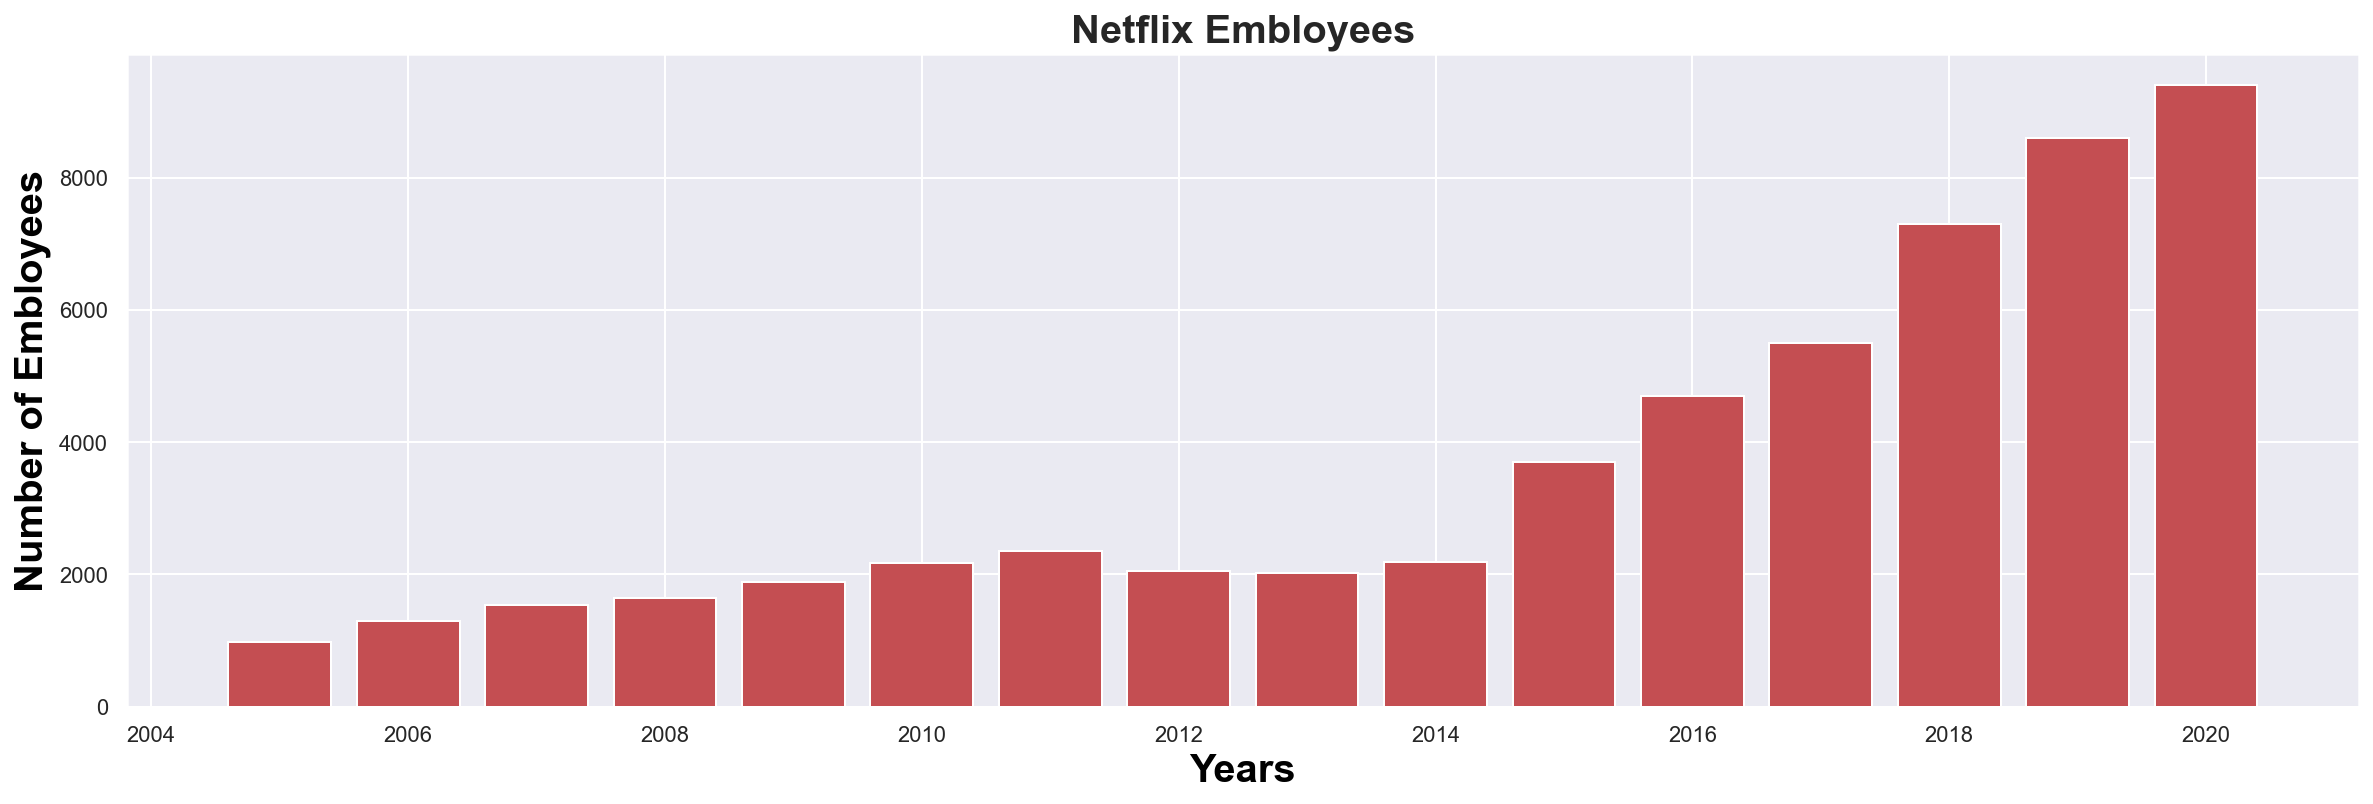

In [226]:
plt.figure(figsize=[20,6])

plt.subplot(1,1,1)
plt.bar(NetfilxFinance.Years,NetfilxFinance.embloyees,color='r')
plt.title('Netflix Embloyees',fontweight="bold", fontsize=20)
plt.ylabel('Number of Embloyees',fontsize = 20, weight = 'bold',color='black')
plt.xlabel('Years',fontsize = 20, weight = 'bold',color='black');
plt.savefig('Netflix Embloyees.png')

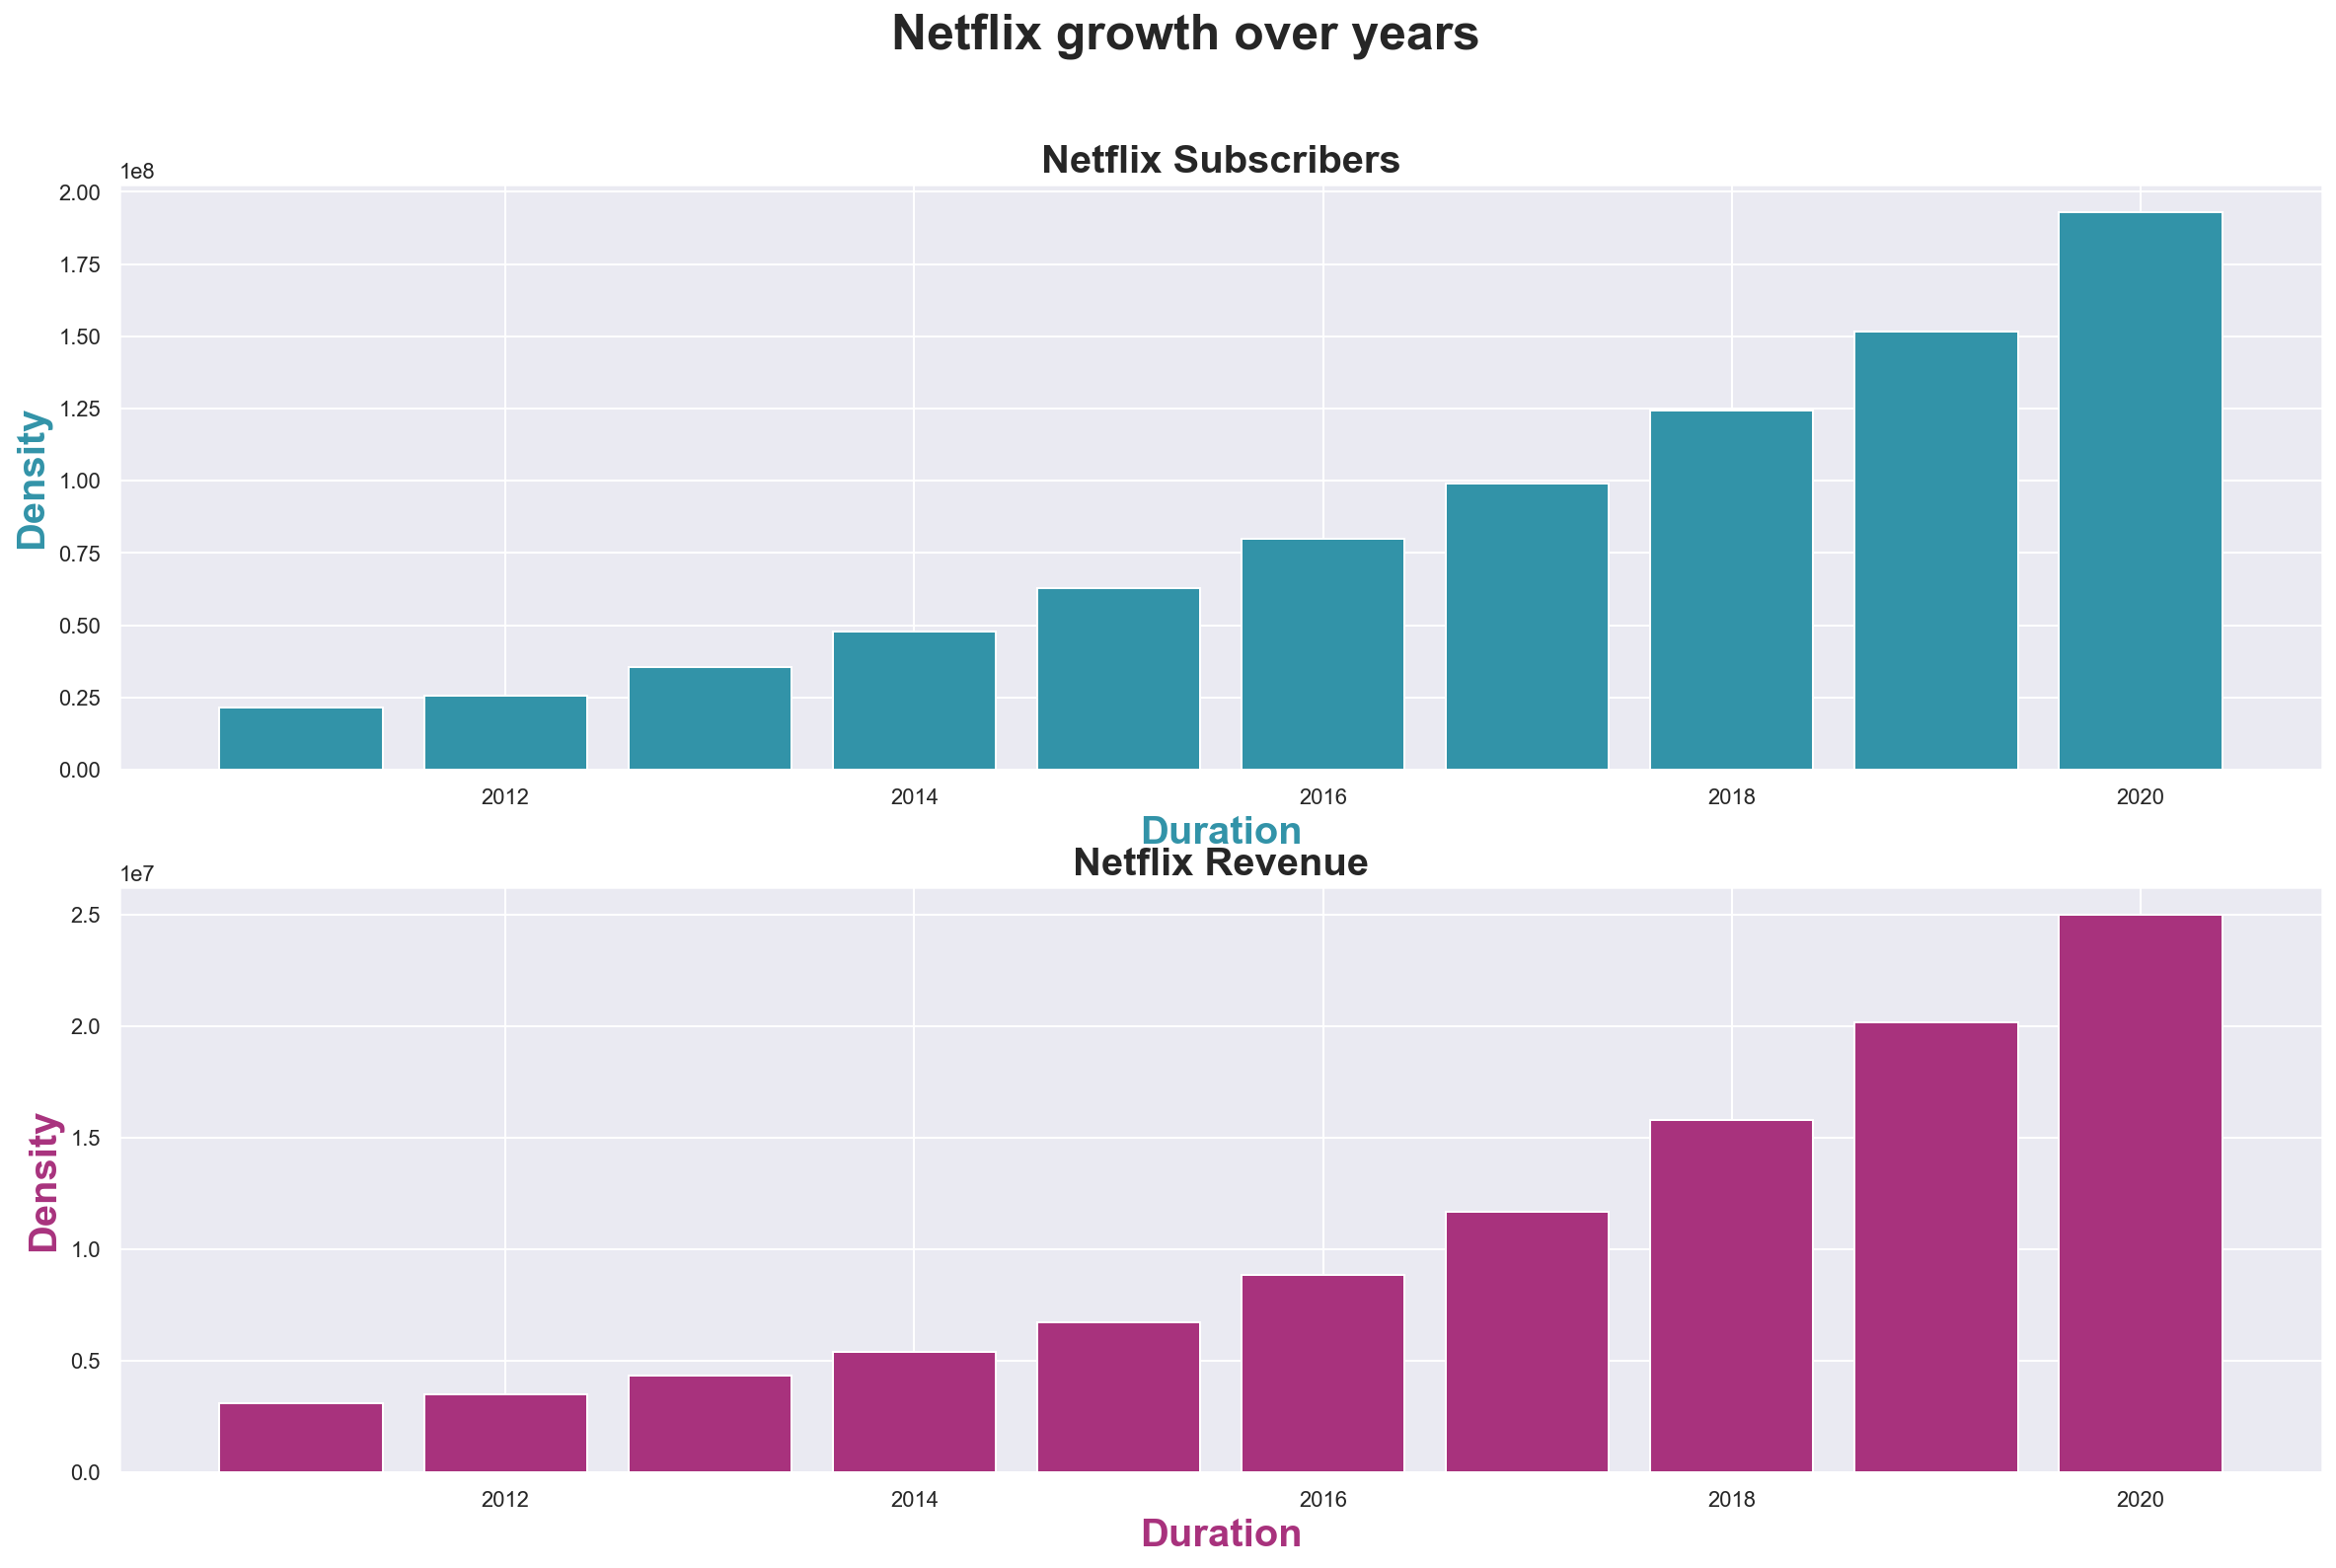

In [227]:
plt.figure(figsize=[20,12])
plt.suptitle('Netflix growth over years',fontweight="bold", fontsize=25) 
plt.subplot(2,1,1)
plt.bar(NetfilxFinance.Years,NetfilxFinance.Subscribers,color='#3293a8')
plt.title('Netflix Subscribers',fontweight="bold", fontsize=20)
plt.ylabel('Density',fontsize = 20, weight = 'bold',color='#3293a8')
plt.xlabel('Duration',fontsize = 20, weight = 'bold',color='#3293a8');

plt.subplot(2,1,2)
plt.bar(NetfilxFinance.Years,NetfilxFinance.Revenue,color='#a8327d')
plt.title('Netflix Revenue',fontweight="bold", fontsize=20)
plt.ylabel('Density',fontsize = 20, weight = 'bold',color='#a8327d')
plt.xlabel('Duration',fontsize = 20, weight = 'bold',color='#a8327d');
plt.savefig('SubscribersRevenue.png')

### Create a collections list to collecte description contents 

# 2.IMDbmovies

#### We need this dataset to take all movies outside Netflix dataset to find out what kind of movies Netflix is chosing for there costumers 


####  features descripction

Check its shape

In [228]:
IMDbmovies.shape

(85855, 22)

Change the type to date

In [229]:
IMDbmovies['Date'] = pd.to_datetime(IMDbmovies.date_published)

Check for nulls

In [230]:
IMDbmovies.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
Date                         0
dtype: int64

Drop unneeded 

In [231]:
IMDbmovies.drop(['imdb_title_id',
                 'original_title',
                 'writer',
                 'budget',
                 'usa_gross_income',
                 'worlwide_gross_income',
                 'metascore',
                 'reviews_from_users',
                 'reviews_from_critics'],
  axis='columns', inplace=True)

Drop duplicates

In [232]:
IMDbmovies.title.drop_duplicates( keep='first', inplace=False)
IMDbmovies.shape

(85855, 14)

Check for nulls again

In [233]:
IMDbmovies.dropna(inplace= True)
IMDbmovies.isna().sum()

title                 0
year                  0
date_published        0
genre                 0
duration              0
country               0
language              0
director              0
production_company    0
actors                0
description           0
avg_vote              0
votes                 0
Date                  0
dtype: int64

### Define a function to get duration in hours

In [234]:
def duration_in_hours(duration):
    return (duration /60)

Apply that function

In [235]:
IMDbmovies['duration_hours']=IMDbmovies.duration.apply(duration_in_hours)

I need a counter line for each raw

In [236]:
IMDbmovies['counter'] = 1

In [237]:
IMDbmovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78666 entries, 1 to 85854
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               78666 non-null  object        
 1   year                78666 non-null  int64         
 2   date_published      78666 non-null  object        
 3   genre               78666 non-null  object        
 4   duration            78666 non-null  int64         
 5   country             78666 non-null  object        
 6   language            78666 non-null  object        
 7   director            78666 non-null  object        
 8   production_company  78666 non-null  object        
 9   actors              78666 non-null  object        
 10  description         78666 non-null  object        
 11  avg_vote            78666 non-null  float64       
 12  votes               78666 non-null  int64         
 13  Date                78666 non-null  datetime64

## Create a founction takes the dataset and one string column to count words and show them by WordCloud library 

### Importing needed libraries Collections, WordCloud and  STOPWORDS

In [238]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

In [239]:
def words(data,style):
    stopwords = set(STOPWORDS)

    Description=list(data)
    gen=[]

    for i in Description:
        i=list(i.split(','))
        for j in i:
            gen.append(j.replace(' '," "))
        List = gen
    TotalList = ' '.join(gen)
    #ListCount = Counter(gen)
        
    wordcloud = WordCloud(
        background_color=style,
        stopwords = stopwords,
        max_font_size=60,
        max_words=50,
        scale=3,
        random_state=1
    ).generate(str(TotalList))
    
    fig = plt.figure(1,figsize=(20,15))
    plt.axis('off')
    if title: 
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.savefig('Netflix_Description_word_cloud.png')
    plt.show()

## 8. The most 50 used words in Netflix movies titles

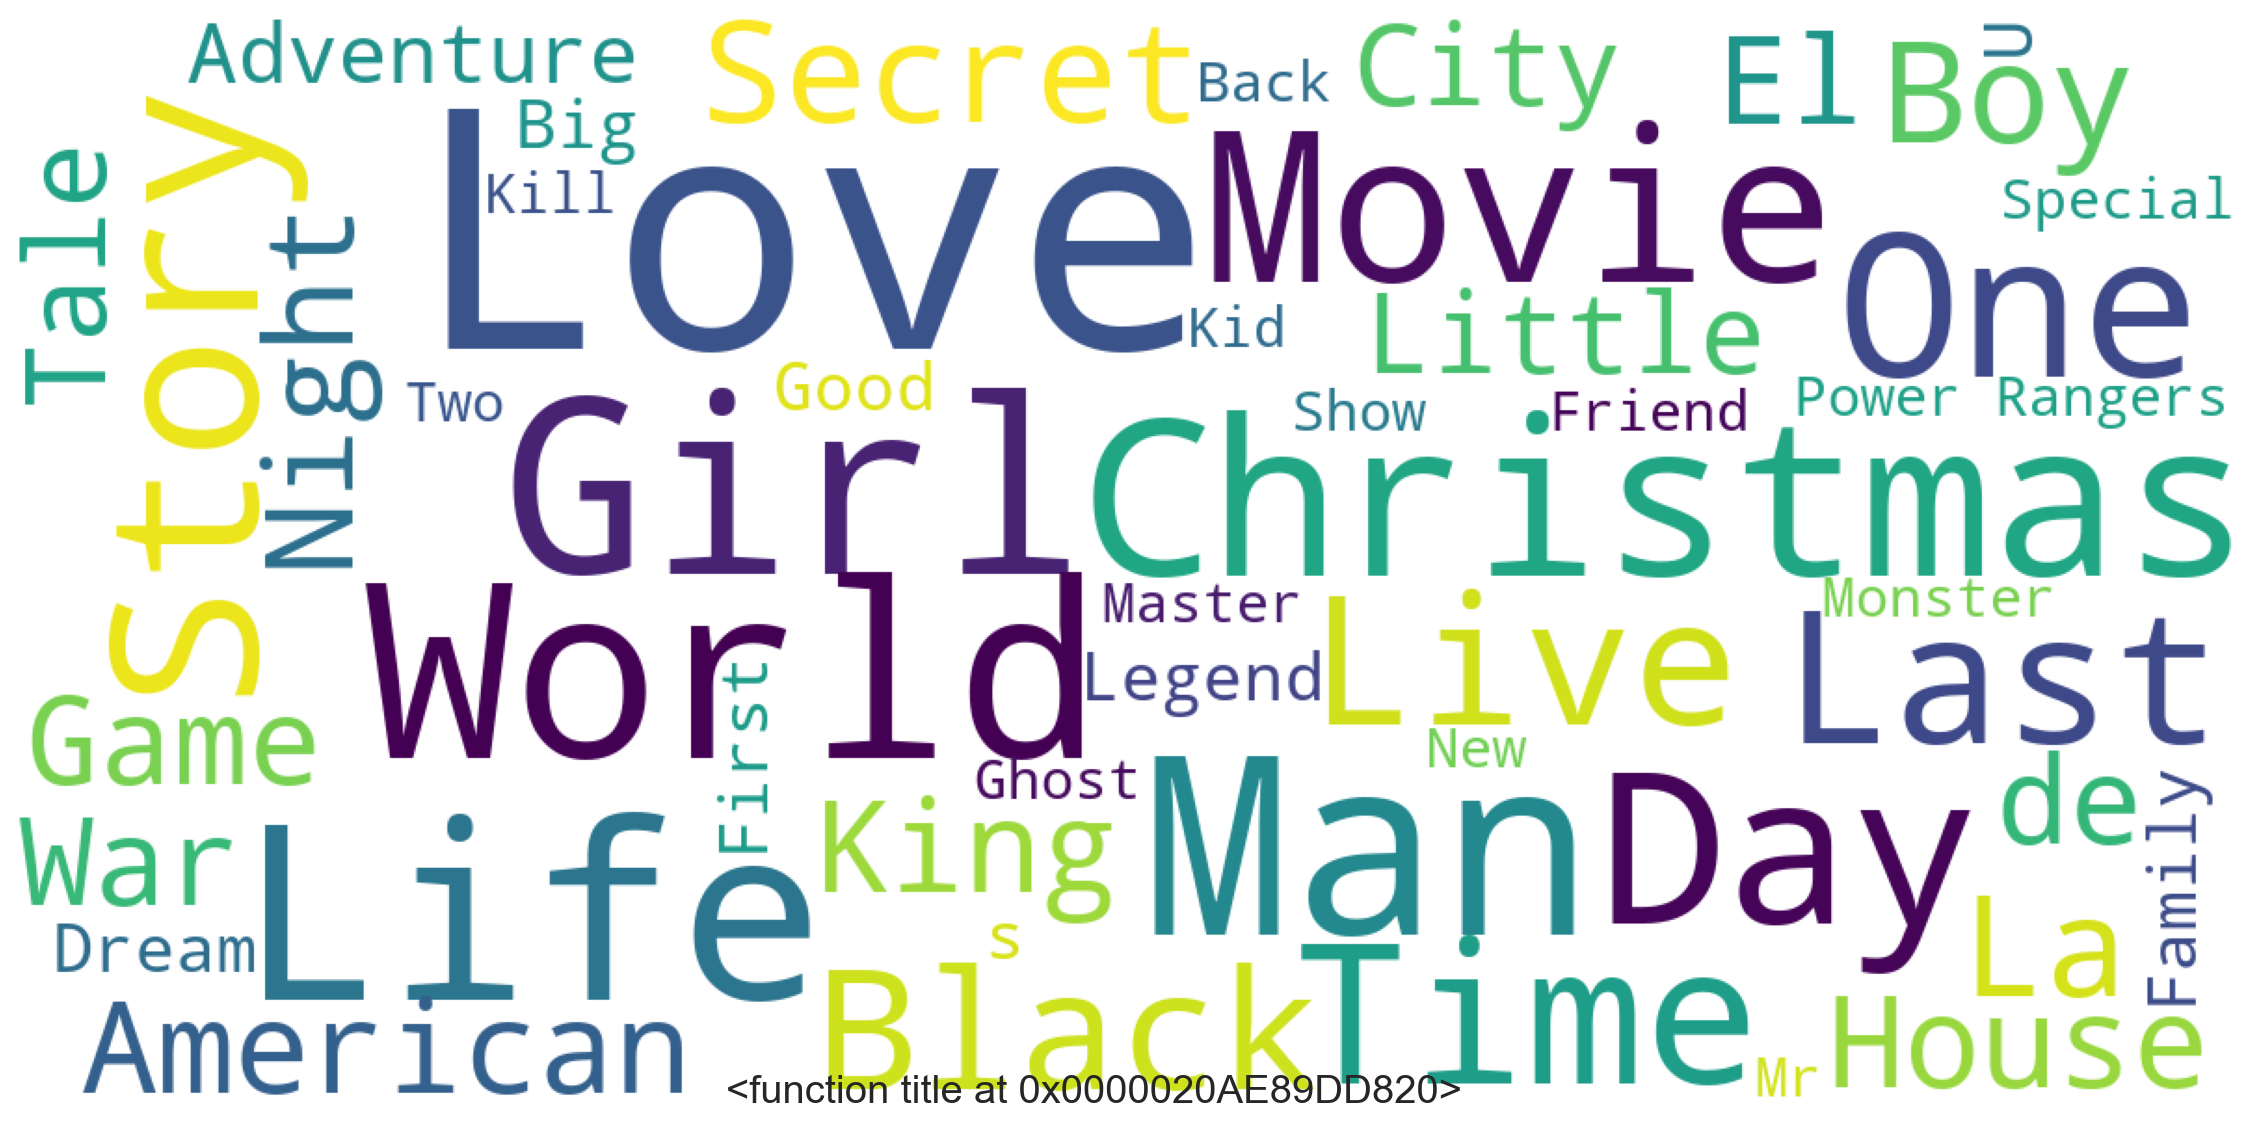

In [240]:
words(NetflixMovies['title'],"white")


## 9. The most 50 used words in Netflix movies description

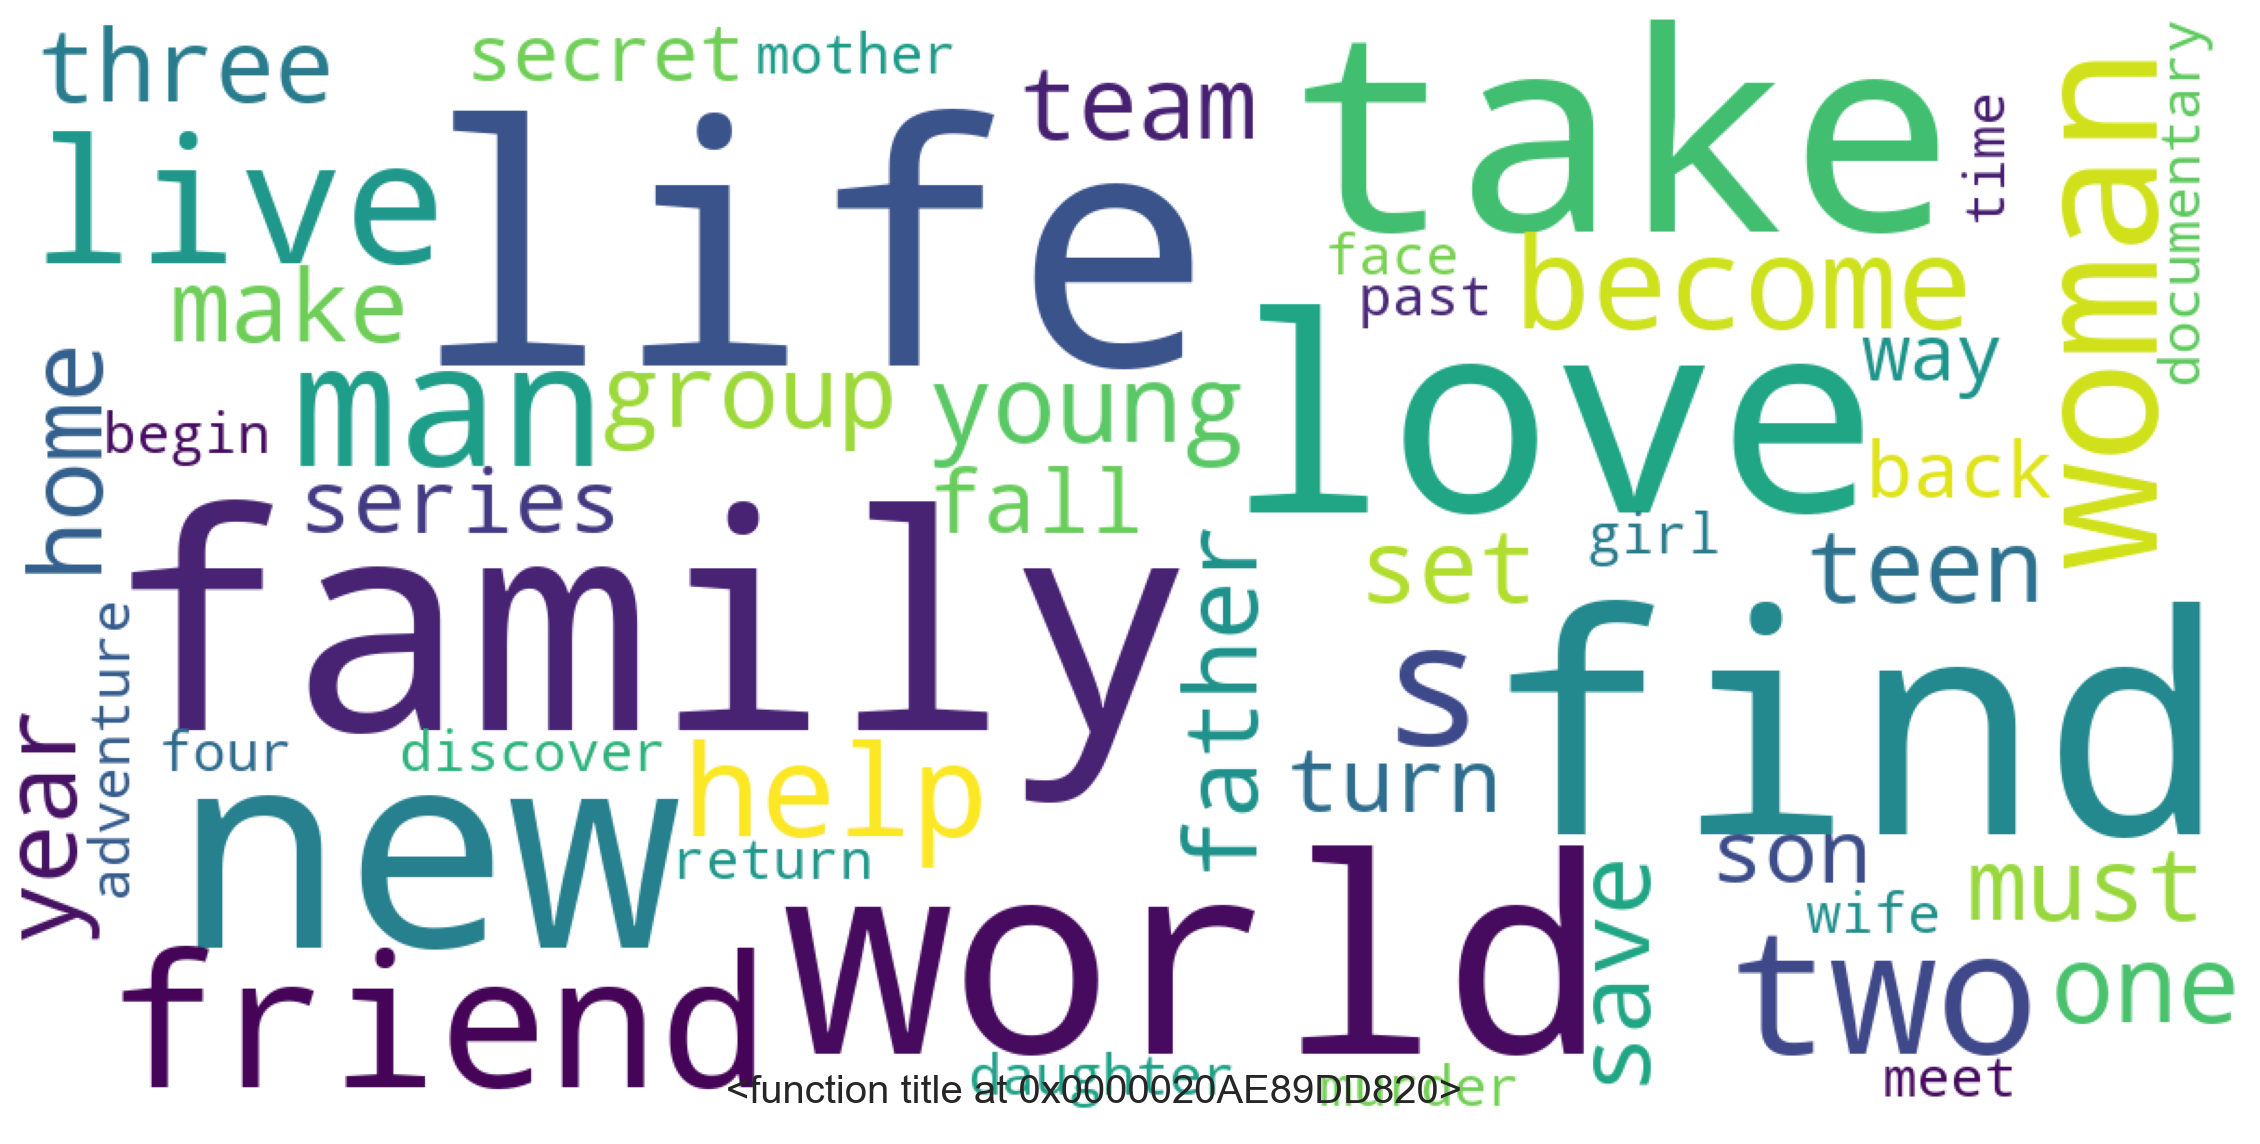

In [241]:
words(NetflixMovies['description'],"white")


## The most 50 used words in IMDb movies titles

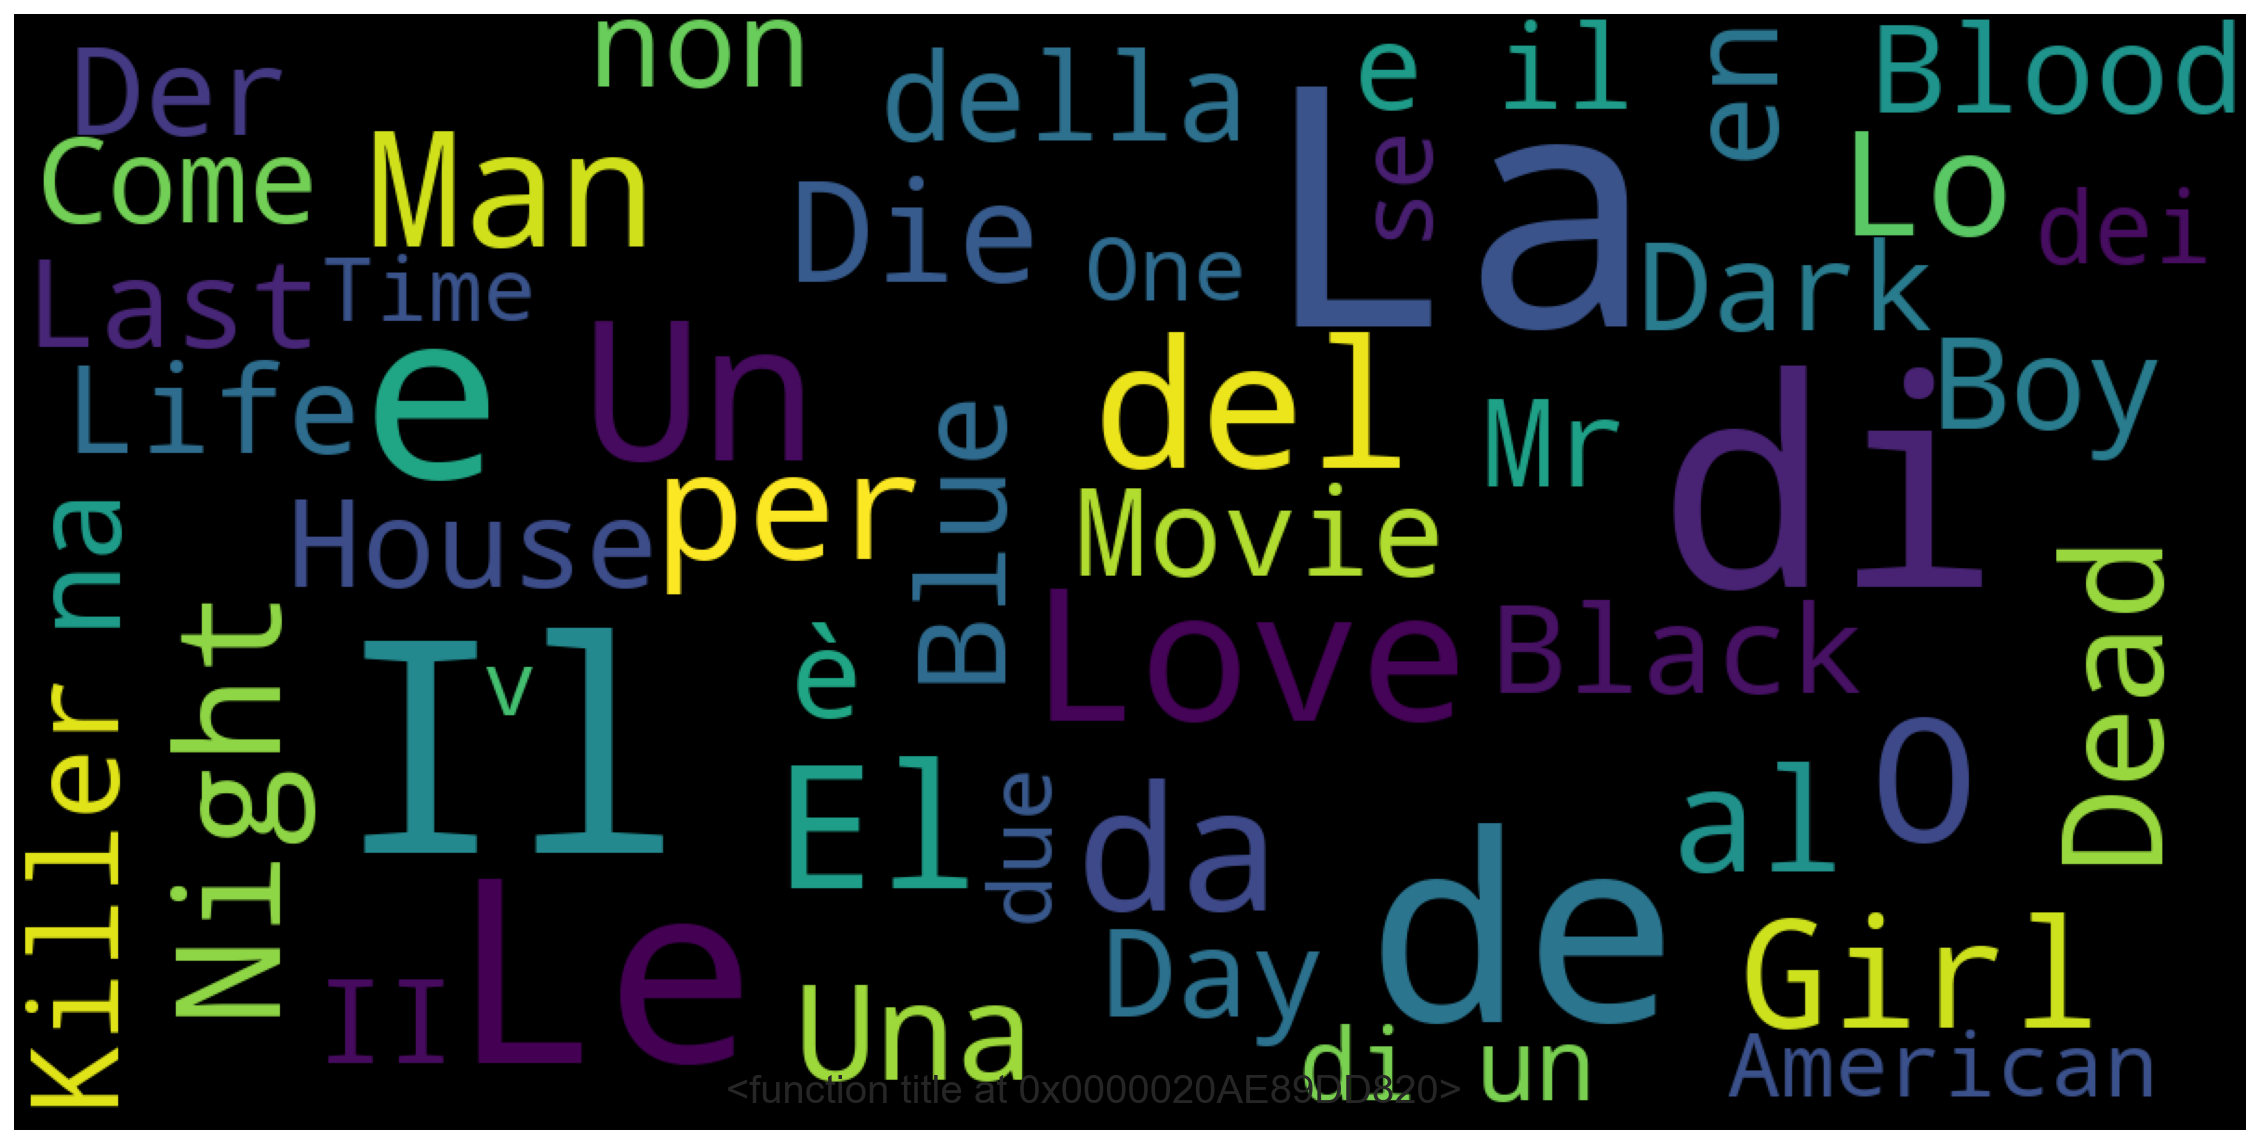

In [242]:
words(IMDbmovies['title'],"black")


## The most 50 used words in IMDb movies description

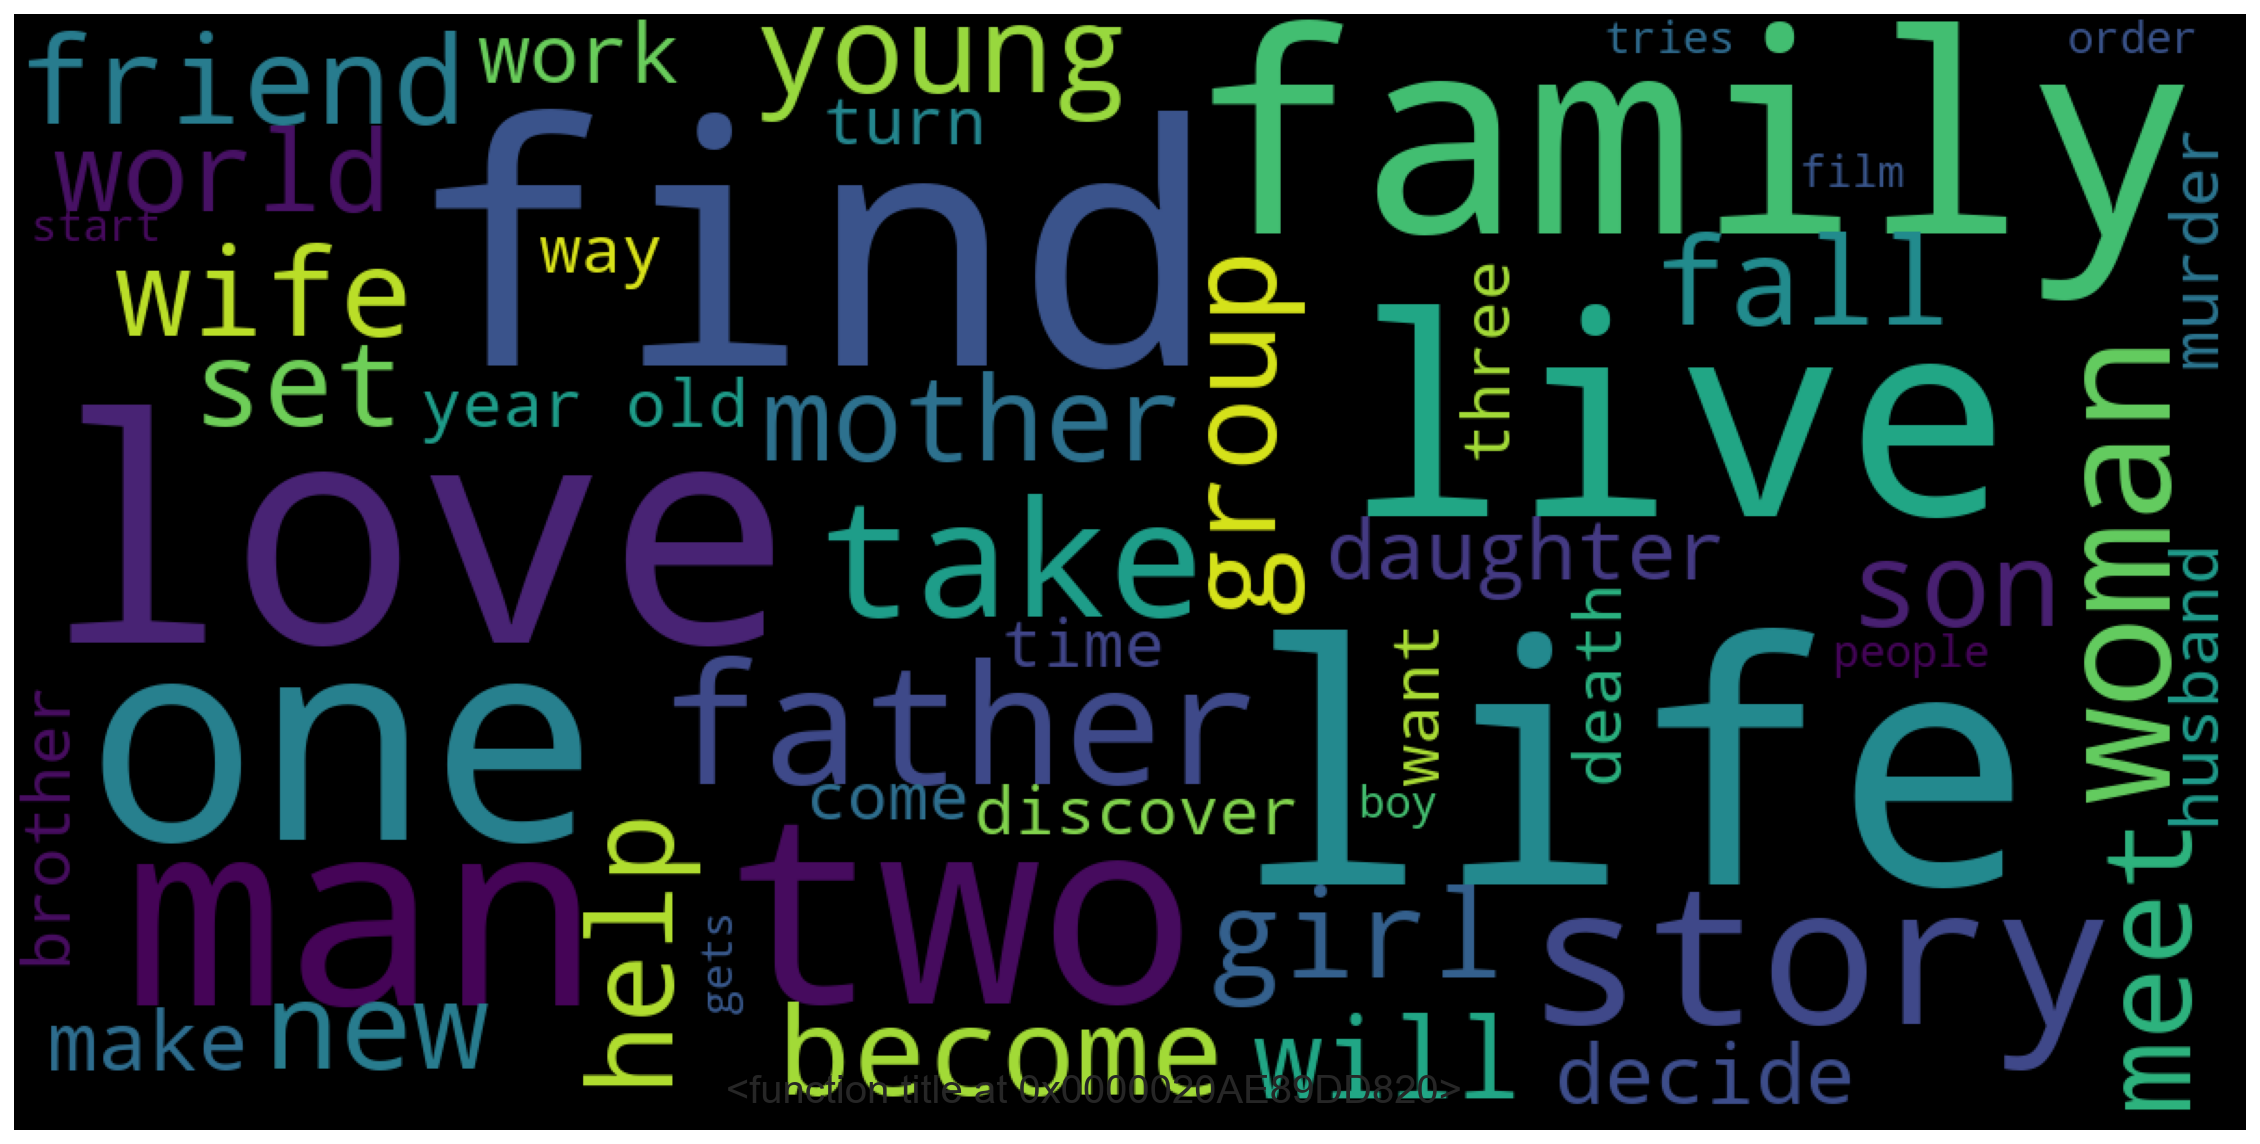

In [243]:
words(IMDbmovies['description'],"black")

## We can see the diffrence between what kind of movies Netflix show to us 

# Average Nitflix vs IMDb runtime

## 1.Nitflix

<AxesSubplot:title={'center':'Average Nitflix runtime of 6126 movies'}, xlabel='RunningTime', ylabel='Density'>

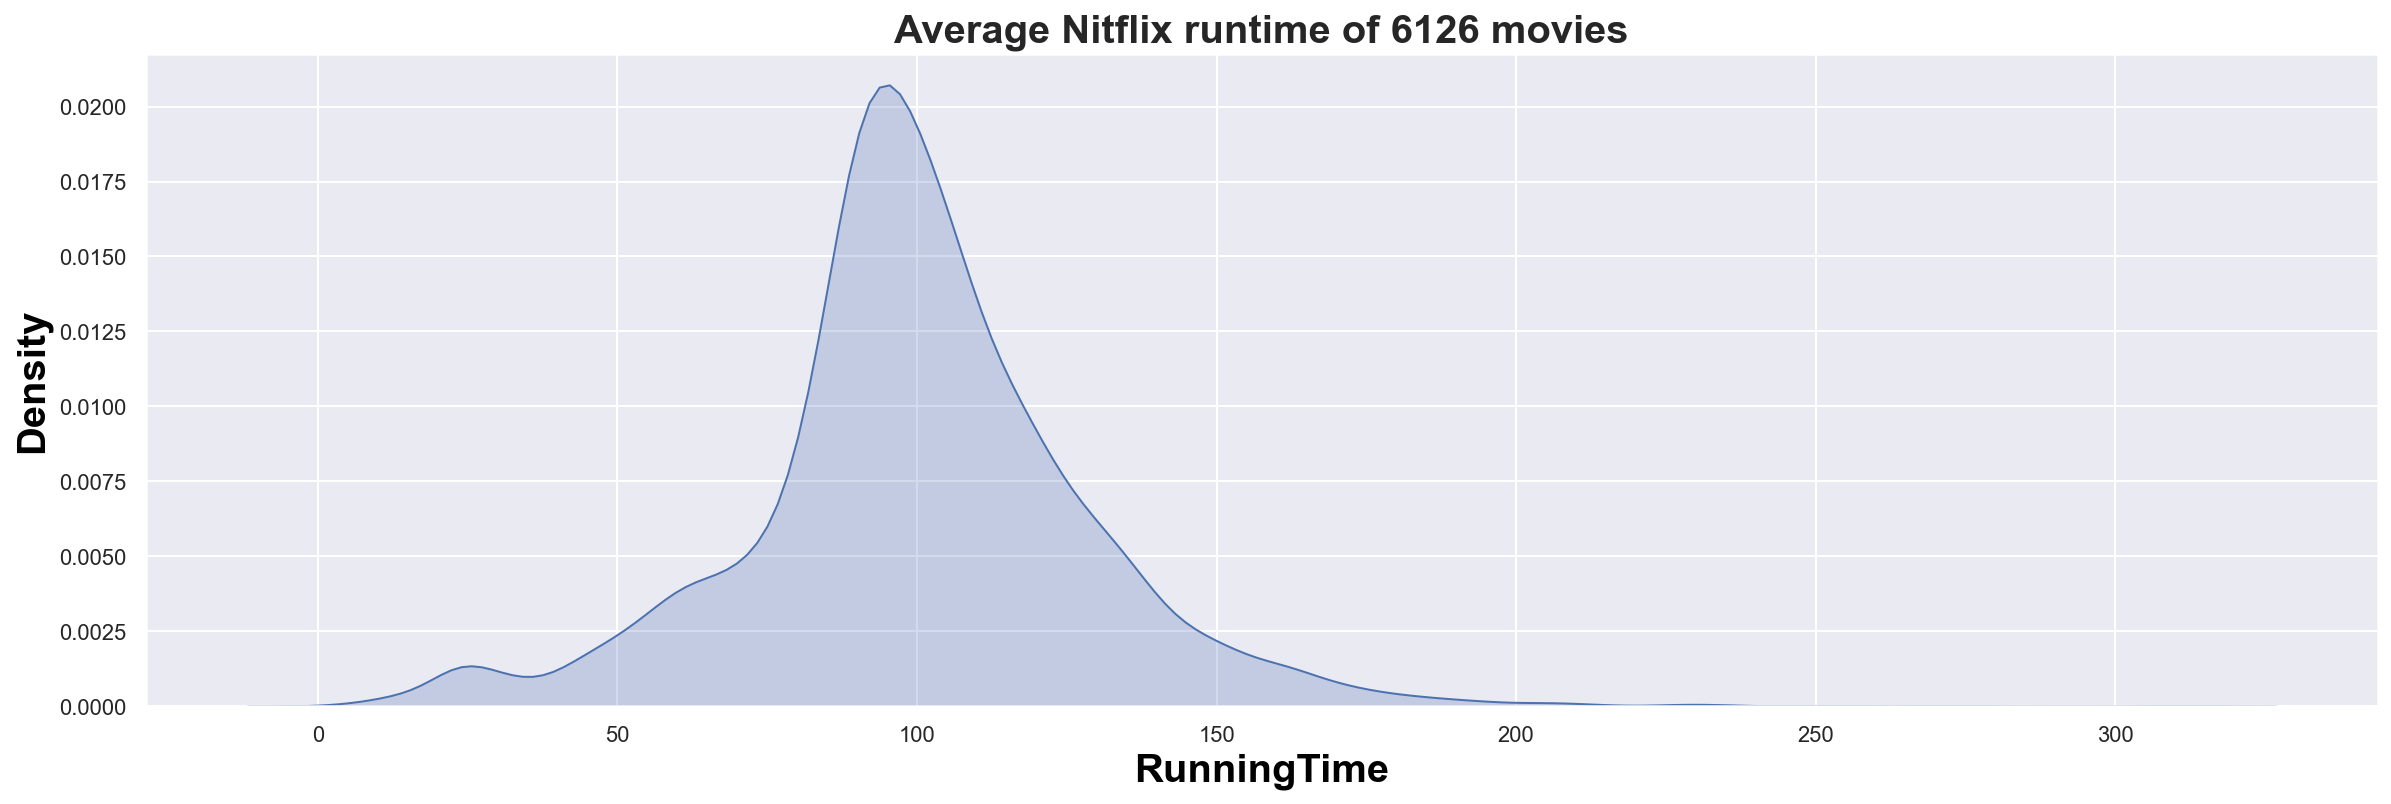

In [244]:
plt.figure(figsize=[20,6])
plt.title('Average Nitflix runtime of {} movies'.format(Movies['title'].count()),fontweight="bold", fontsize=20)
plt.xlabel('RunningTime',fontsize = 20, weight = 'bold',color='black')
plt.ylabel('Density',fontsize = 20, weight = 'bold',color='black')
sns.set(style="darkgrid")
sns.kdeplot(data=Movies['RunnibgTime'], shade=True)

In [245]:
Movies['RunnibgTime'].mean()

99.58488410055502

## 2.IMDb

<AxesSubplot:title={'center':'Average runtime of 78666 movies'}, xlabel='Duration', ylabel='Density'>

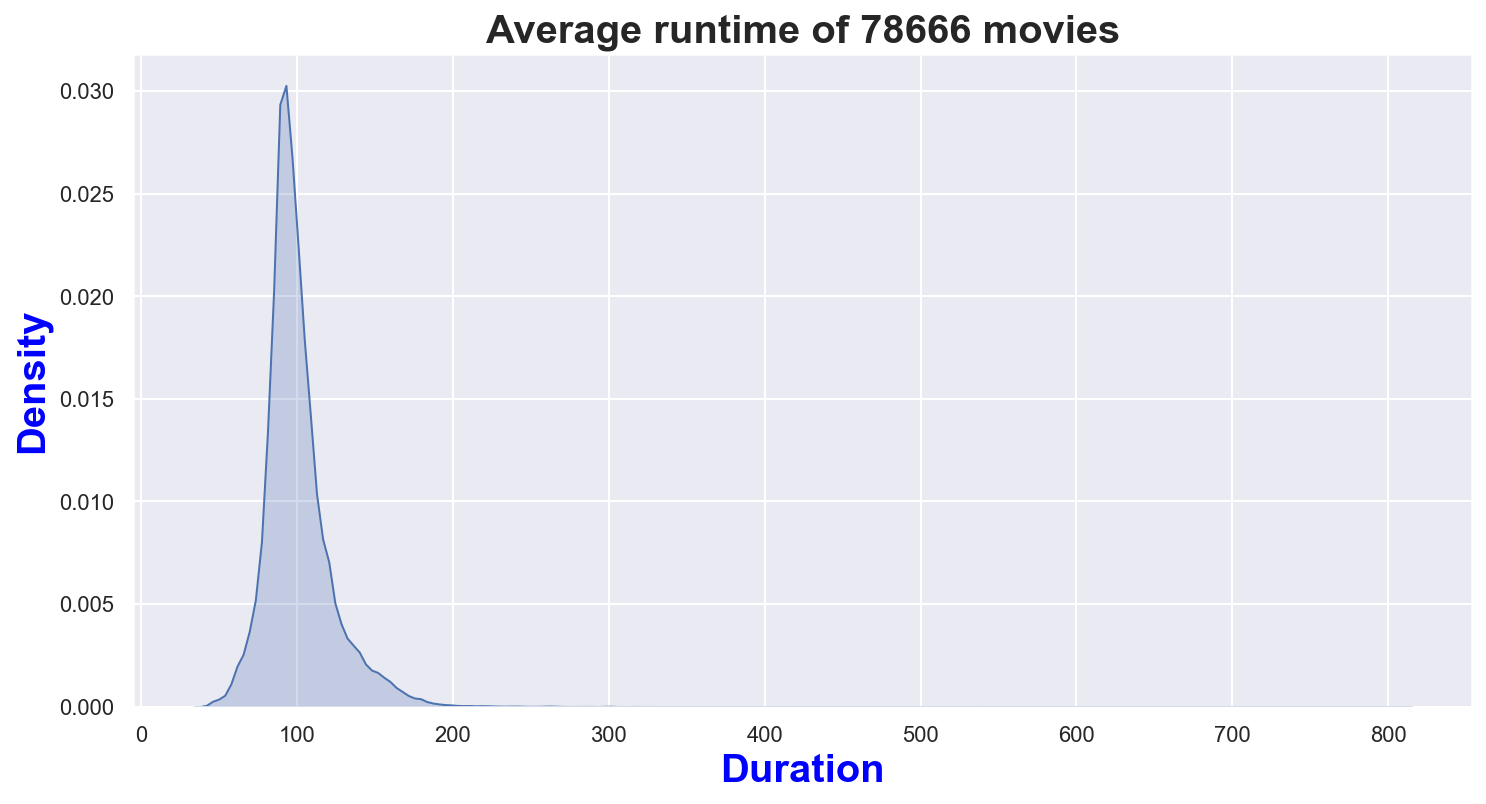

In [246]:
plt.figure(figsize=[12,6])
plt.title('Average runtime of {} movies'.format(IMDbmovies['title'].count()),fontweight="bold", fontsize=20)
plt.ylabel('Density',fontsize = 20, weight = 'bold',color='blue')
plt.xlabel('Duration',fontsize = 20, weight = 'bold',color='blue');
sns.set(style="darkgrid")
sns.kdeplot(data=IMDbmovies['duration'], shade=True)


In [247]:
IMDbmovies['duration'].mean()

100.34868939567285

### The avrage running time in IMDb dataset on 78666 shows still the same 100 mins

# Higher movies duration

In [248]:
highduration = IMDbmovies[['title','language','duration_hours']]


In [249]:
highduration['title'] = highduration['title']+' in '+ highduration['language']


## Highest moves duration in IMDb dataset by movies

In [250]:
highduration2 = IMDbmovies.groupby(['title','language']).duration_hours.sum().sort_values(ascending=False)
highduration2.head(10)


title                                   language                                                   
La flor                                 Catalan, Spanish, French, English, Russian, German, Swedish    13.466667
Out 1, noli me tangere                  French, English                                                12.150000
I miserabili                            French                                                         11.850000
A Midsummer Night's Dream               English                                                        10.966667
Amleto                                  English                                                        10.383333
Khleb - imya sushchestvitelnoe          Russian                                                         9.666667
Orbius                                  None                                                            9.500000
I tre moschettieri                      English                                                         9.033

## 10. Highest movies maker directors

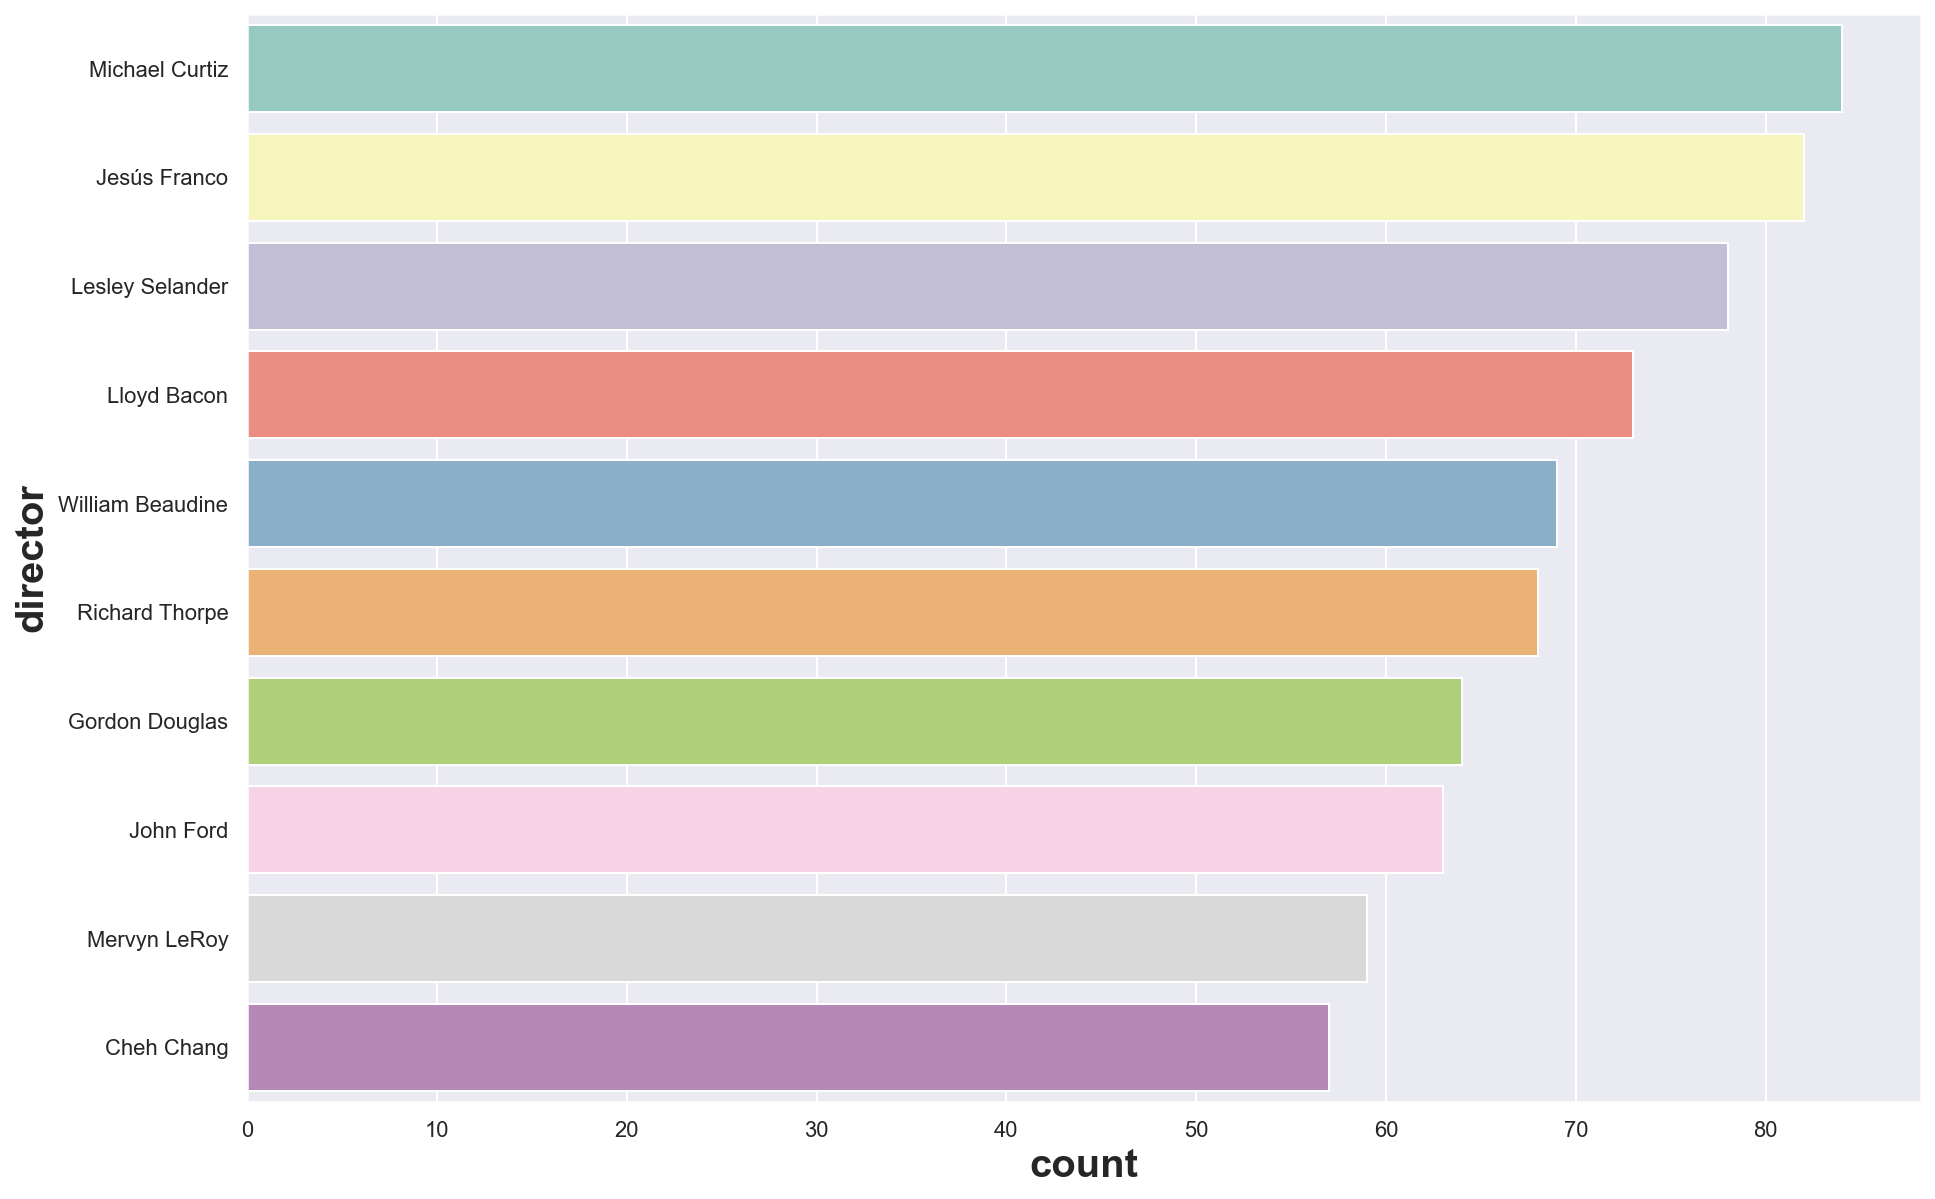

In [251]:
plt.figure(figsize=(15,10))
plt.xlabel("Count",fontsize = 20, weight = 'bold')
plt.ylabel("director",fontsize = 20, weight = 'bold')
sns.set(style="whitegrid")
ax = sns.countplot(y="director", data=IMDbmovies, palette="Set3", order=IMDbmovies['director'].value_counts().index[0:10])

## 11. Top countries making movies

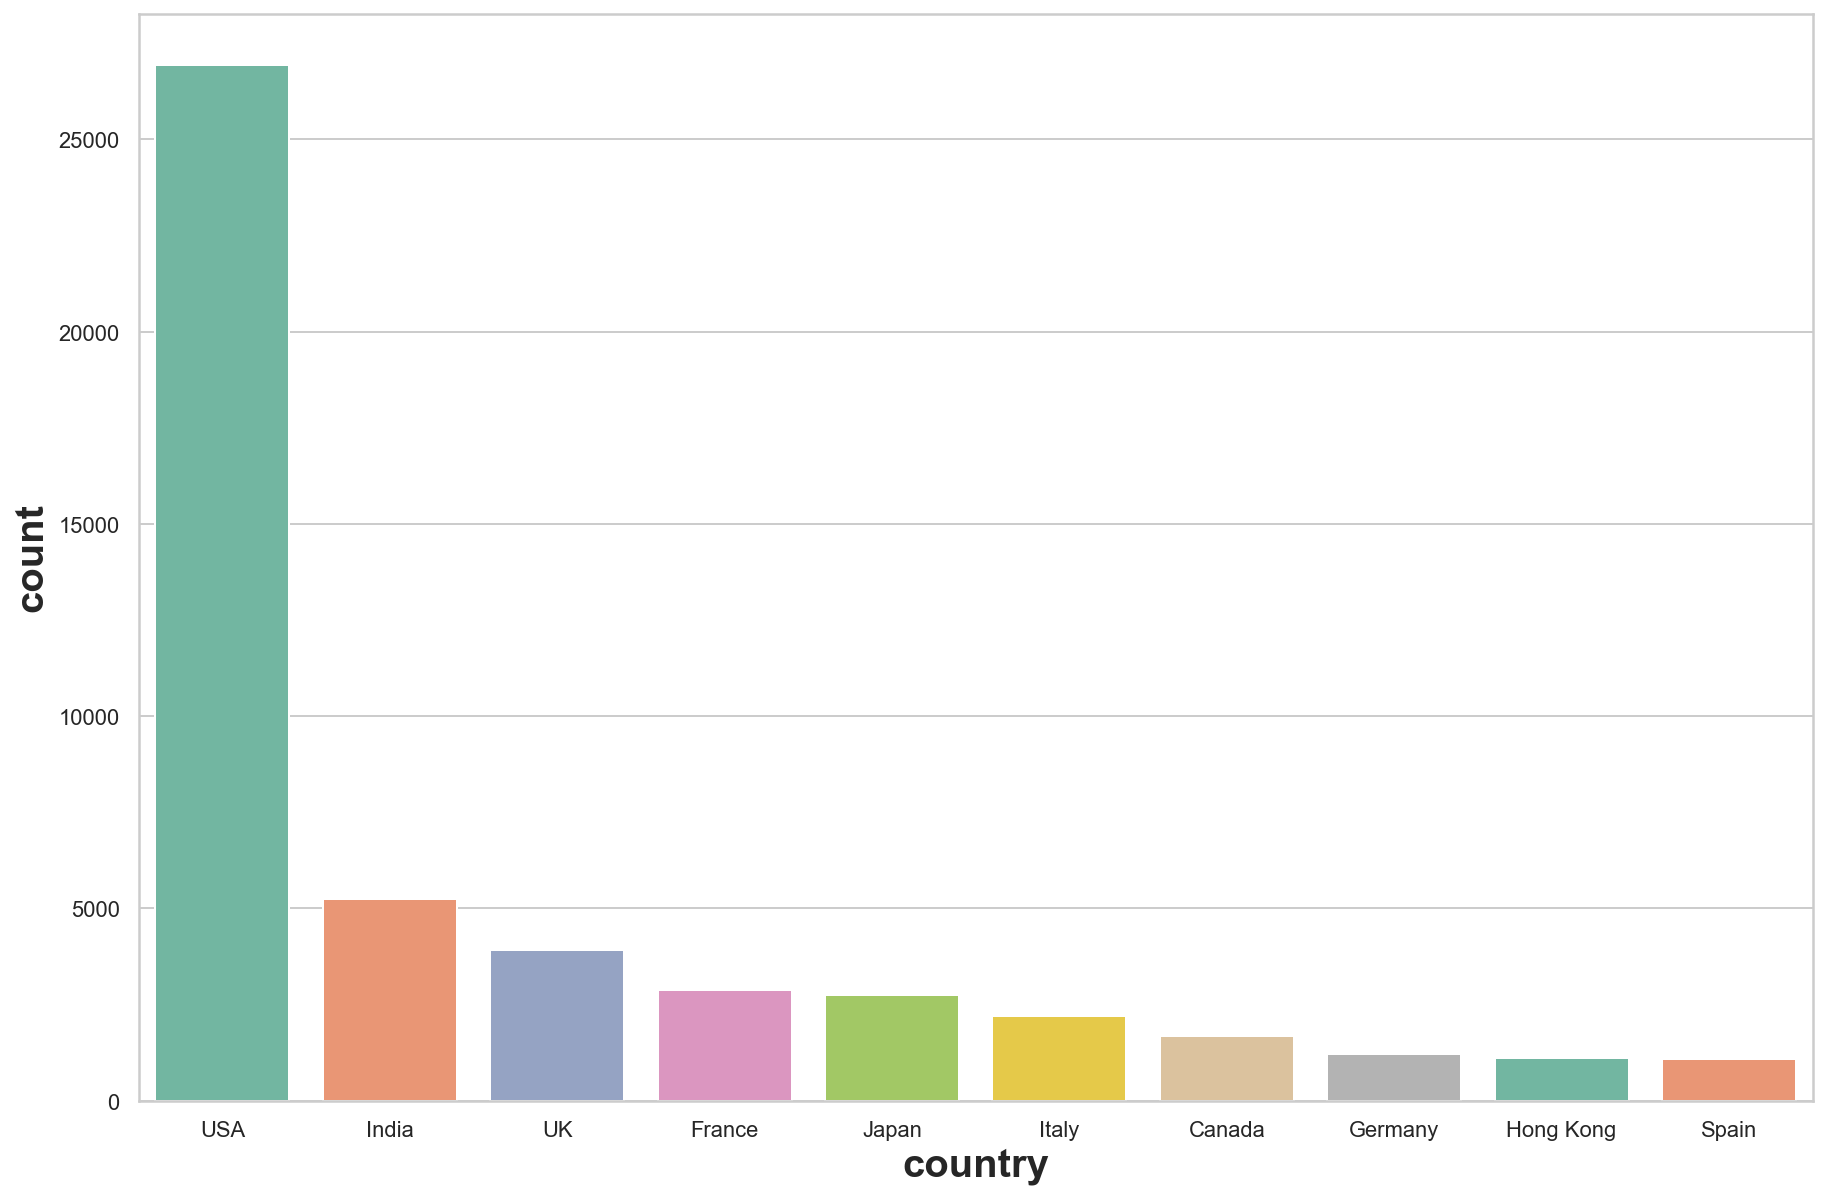

In [252]:
plt.figure(figsize=(15,10))
plt.ylabel("Number of movies",fontsize = 20, weight = 'bold')
plt.xlabel("country",fontsize = 20, weight = 'bold')
sns.set(style="whitegrid")
ax = sns.countplot(x="country", data=IMDbmovies, palette="Set2", order=IMDbmovies['country'].value_counts().index[0:10])

## Now we will merge our tow dataset of Netflix and IMDb datasets to find out the % of movies on Netflix from IMDb movies

### Craete short table for Netflix movies by years 

In [253]:
NetflixMoyears = NetflixMovies.groupby('year')[['counter']].sum()

### Craete short table for IMDb movies by years 

In [254]:
IMDbmoyear = IMDbmovies.groupby('year')[['counter']].count()

### merge them 

In [255]:
MoviesIMDBvsNetflix = pd.merge(NetflixMoyears, IMDbmoyear, on='year')
MoviesIMDBvsNetflix

counter_x  counter_y
year                      
1925          1         51
1942          2        302
1943          3        270
1944          3        271
1945          4        246
...         ...        ...
2016        901       2871
2017       1030       2996
2018       1146       2946
2019       1030       2553
2020        953        700

[73 rows x 2 columns]

### Rename the columns 

In [256]:
MoviesIMDBvsNetflix.rename(columns={'counter_x' : 'Netflix','counter_y' : 'IMDB'},inplace=True)


### Now we need a new column to calculate the diffence and its % between Netflix movies count and IMDb movies

In [257]:
MoviesIMDBvsNetflix['Diff'] = MoviesIMDBvsNetflix.IMDB - MoviesIMDBvsNetflix.Netflix
MoviesIMDBvsNetflix['Movies_on_Netflix_per'] = (MoviesIMDBvsNetflix.Netflix / MoviesIMDBvsNetflix.IMDB)*100


### Figure to show them togather

No handles with labels found to put in legend.


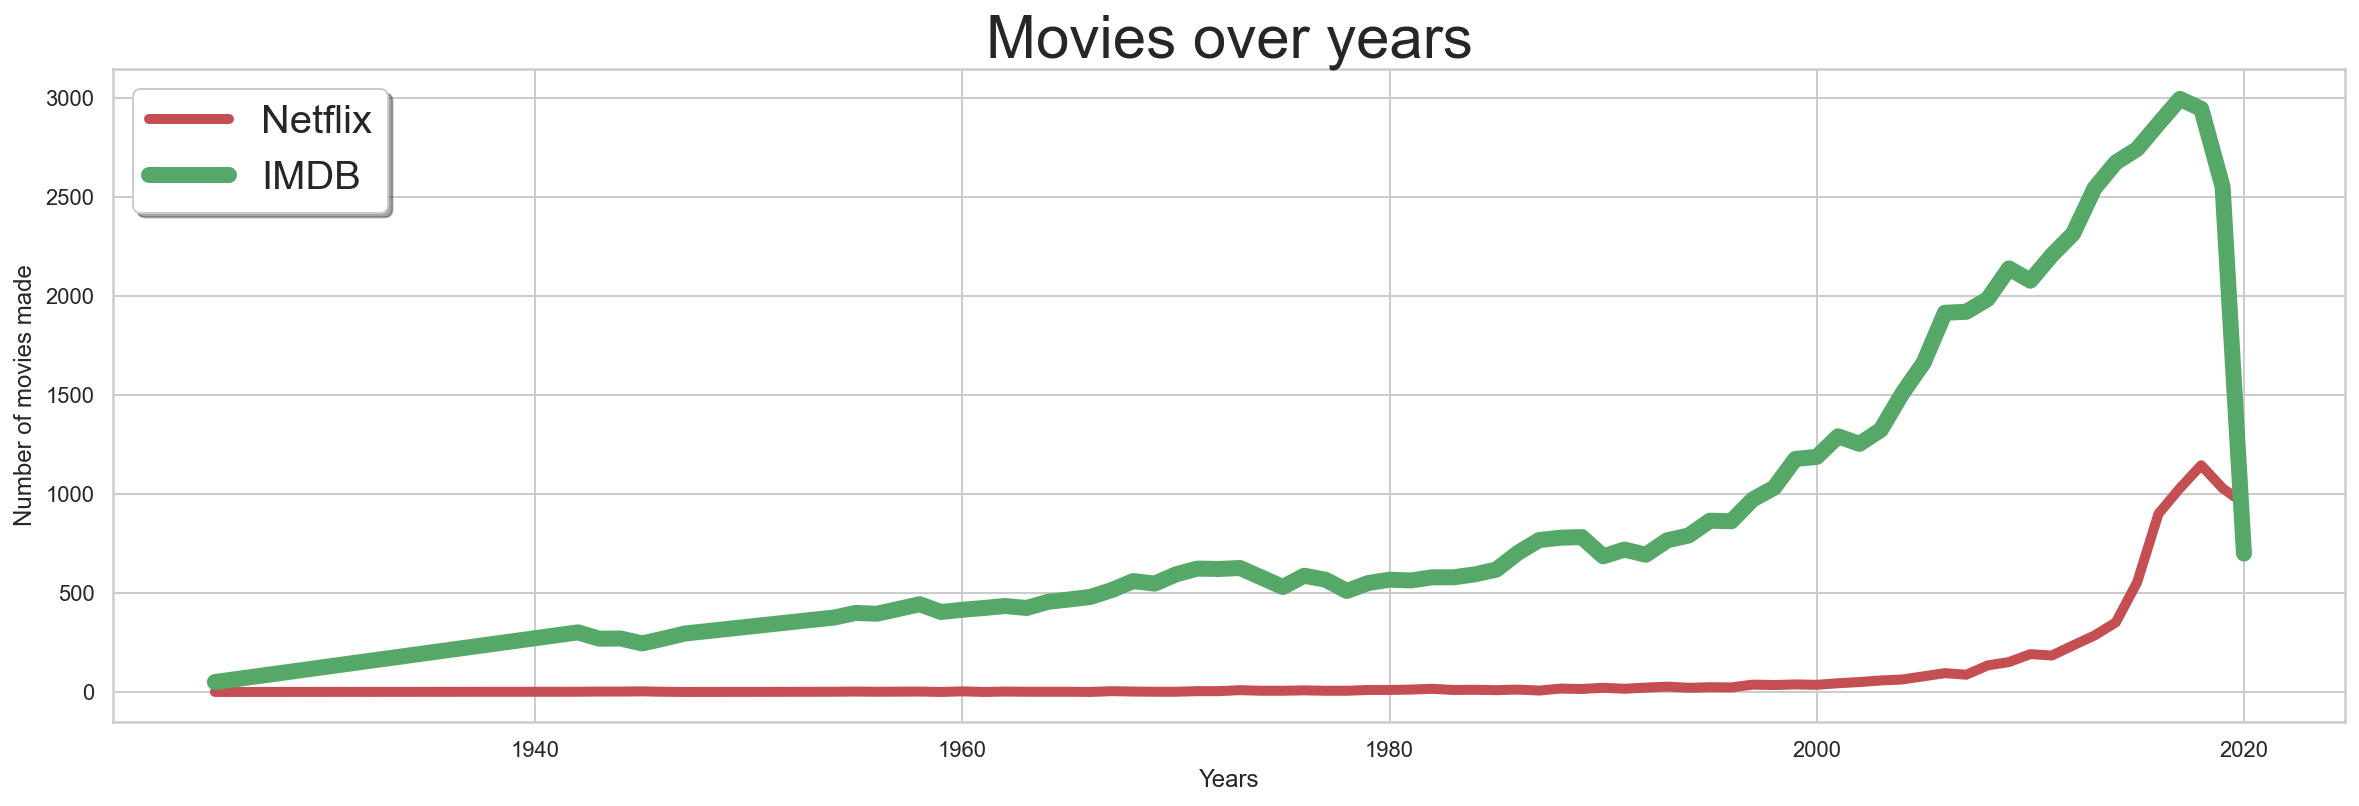

<Figure size 432x288 with 0 Axes>

In [258]:
plt.figure(figsize=[20,6])

plt.plot(MoviesIMDBvsNetflix.Netflix, 'r',linewidth = 5)
plt.plot(MoviesIMDBvsNetflix.IMDB,'g', linewidth = 8)
plt.legend()
plt.xlabel("Years")
plt.ylabel("Number of movies made")
plt.title('Movies over years',fontsize=30)
plt.legend(['Netflix','IMDB'],shadow = True, loc = 2,fontsize=20)
plt.show()   
plt.savefig('Netflix vs IMDB.png')

## We can see that Netflix foucs on new movies more than older movies and they keep there count of movies high despite of the impact of the COVID-19 pandemic on film production 

# 3.Model Movies

###  Movies futures descripction

In [259]:
ModelMovies

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country      budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000.0   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000.0   
2              Leigh Brackett       Mark Hamill   United States  18000000.0   
3                Jim Abrahams       Robert Hays   United States   3500000.0   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000.0   
...                       ...               ...             ...         ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000.0   
7664              Lisa Huston  Michael Saquella   United States         NaN   
7665             Lynno Lovert      Onyama Laura   United States     58750.0   
7666            James Randall     Christina Roz   United States     15000.0   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         NaN   

            gross                    company  runtime  
0      46998772.0               Warner Bros.    146.0  
1      58853106.0          Columbia Pictures    104.0  
2     538375067.0                  Lucasfilm    124.0  
3      83453539.0         Paramount Pictures     88.0  
4      39846344.0             Orion Pictures     98.0  
...           ...                        ...      ...  
7663          NaN                        NaN     90.0  
7664          NaN  Cactus Blue Entertainment     90.0  
7665          NaN           Embi Productions      NaN  
7666          NaN                        NaN    120.0  
7667          NaN                PK 65 Films    102.0  

[7668 rows x 15 columns]

## EDA

### Check nulls

In [260]:
ModelMovies.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

### Drop

In [261]:
ModelMovies.dropna(inplace= True)


In [262]:
ModelMovies.isna().sum()

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [263]:
ModelMovies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


### Rename and change data type

In [264]:
ModelMovies.rename(columns={'name' : 'title'},inplace=True)
ModelMovies['budget'] = ModelMovies['budget'].astype('int64')
ModelMovies['gross'] = ModelMovies['gross'].astype('int64')

### The data distrpution

<AxesSubplot:title={'center':'Average movies runtime'}, xlabel='Runtime', ylabel='Count'>

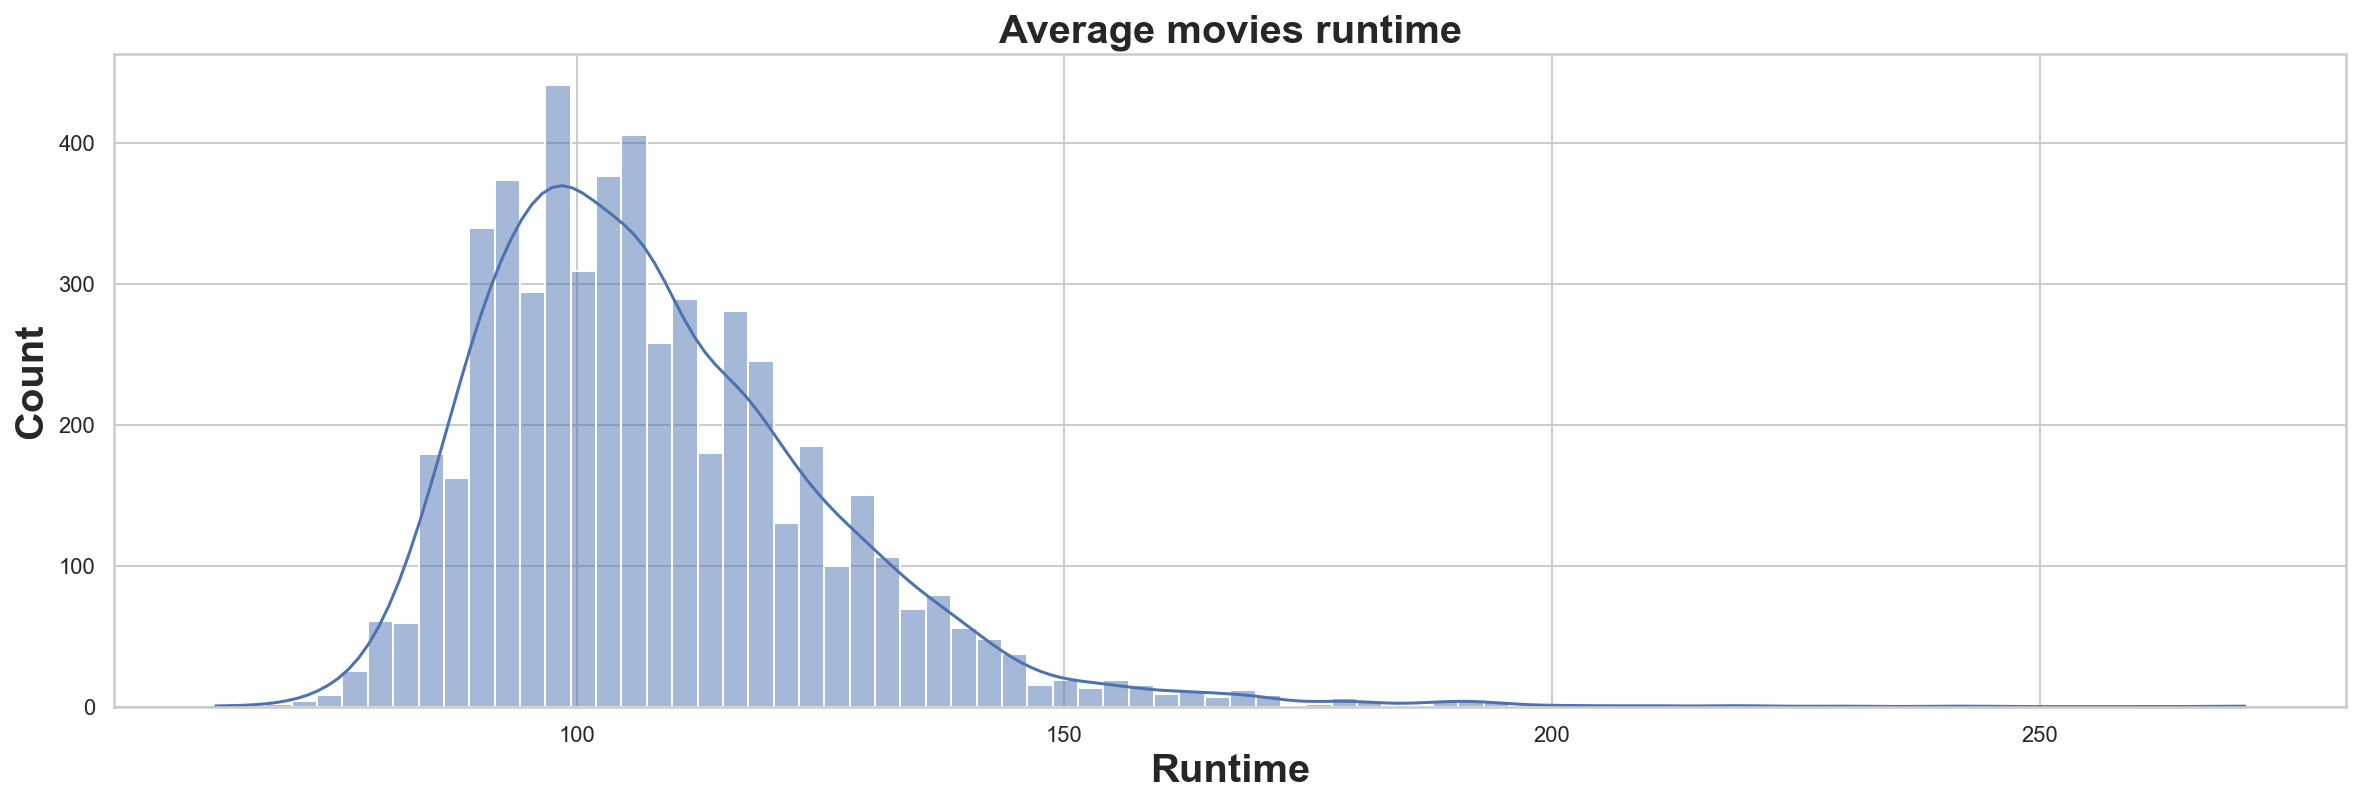

In [265]:
plt.figure(figsize=[20,6])
plt.title('Average movies runtime',fontweight="bold", fontsize=20)
plt.ylabel("Count",fontsize = 20, weight = 'bold')
plt.xlabel("Runtime",fontsize = 20, weight = 'bold')
sns.histplot(data=ModelMovies['runtime'],kde=True)
#plt.hist(nba_df['age']);

# Best Rated Movies

In [266]:
Movies_rating = ModelMovies[['title','score','votes']]
Movies_rating

title  score      votes
0                                        The Shining    8.4   927000.0
1                                    The Blue Lagoon    5.8    65000.0
2     Star Wars: Episode V - The Empire Strikes Back    8.7  1200000.0
3                                          Airplane!    7.7   221000.0
4                                         Caddyshack    7.3   108000.0
...                                              ...    ...        ...
7648                               Bad Boys for Life    6.6   140000.0
7649                              Sonic the Hedgehog    6.5   102000.0
7650                                        Dolittle    5.6    53000.0
7651                            The Call of the Wild    6.8    42000.0
7652                               The Eight Hundred    6.8     3700.0

[5421 rows x 3 columns]

In [267]:
Best_Movies=Movies_rating.groupby(['title','votes']).score.sum().sort_values(ascending=False)
Best_Movies
#df.groupby(['manufacturer', 'type']).calories.median()

title                                          votes    
The Shawshank Redemption                       2400000.0    9.3
The Dark Knight                                2400000.0    9.0
Schindler's List                               1200000.0    8.9
Pulp Fiction                                   1900000.0    8.9
The Lord of the Rings: The Return of the King  1700000.0    8.9
                                                           ... 
Son of the Mask                                53000.0      2.2
House of the Dead                              36000.0      2.1
From Justin to Kelly                           25000.0      2.1
Disaster Movie                                 88000.0      1.9
Superbabies: Baby Geniuses 2                   30000.0      1.9
Name: score, Length: 5421, dtype: float64

# MODELING

In [268]:
ModelMovies


title     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

<AxesSubplot:>

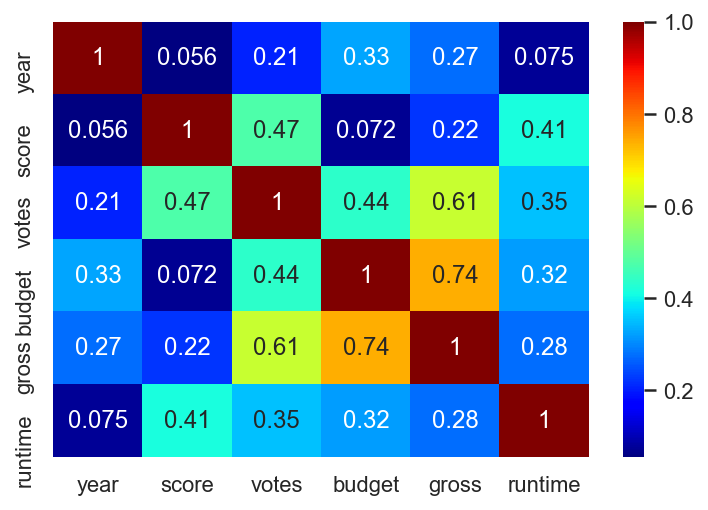

In [269]:
sns.heatmap(ModelMovies.corr(),cmap='jet',annot=True)

### Outer values

<AxesSubplot:>

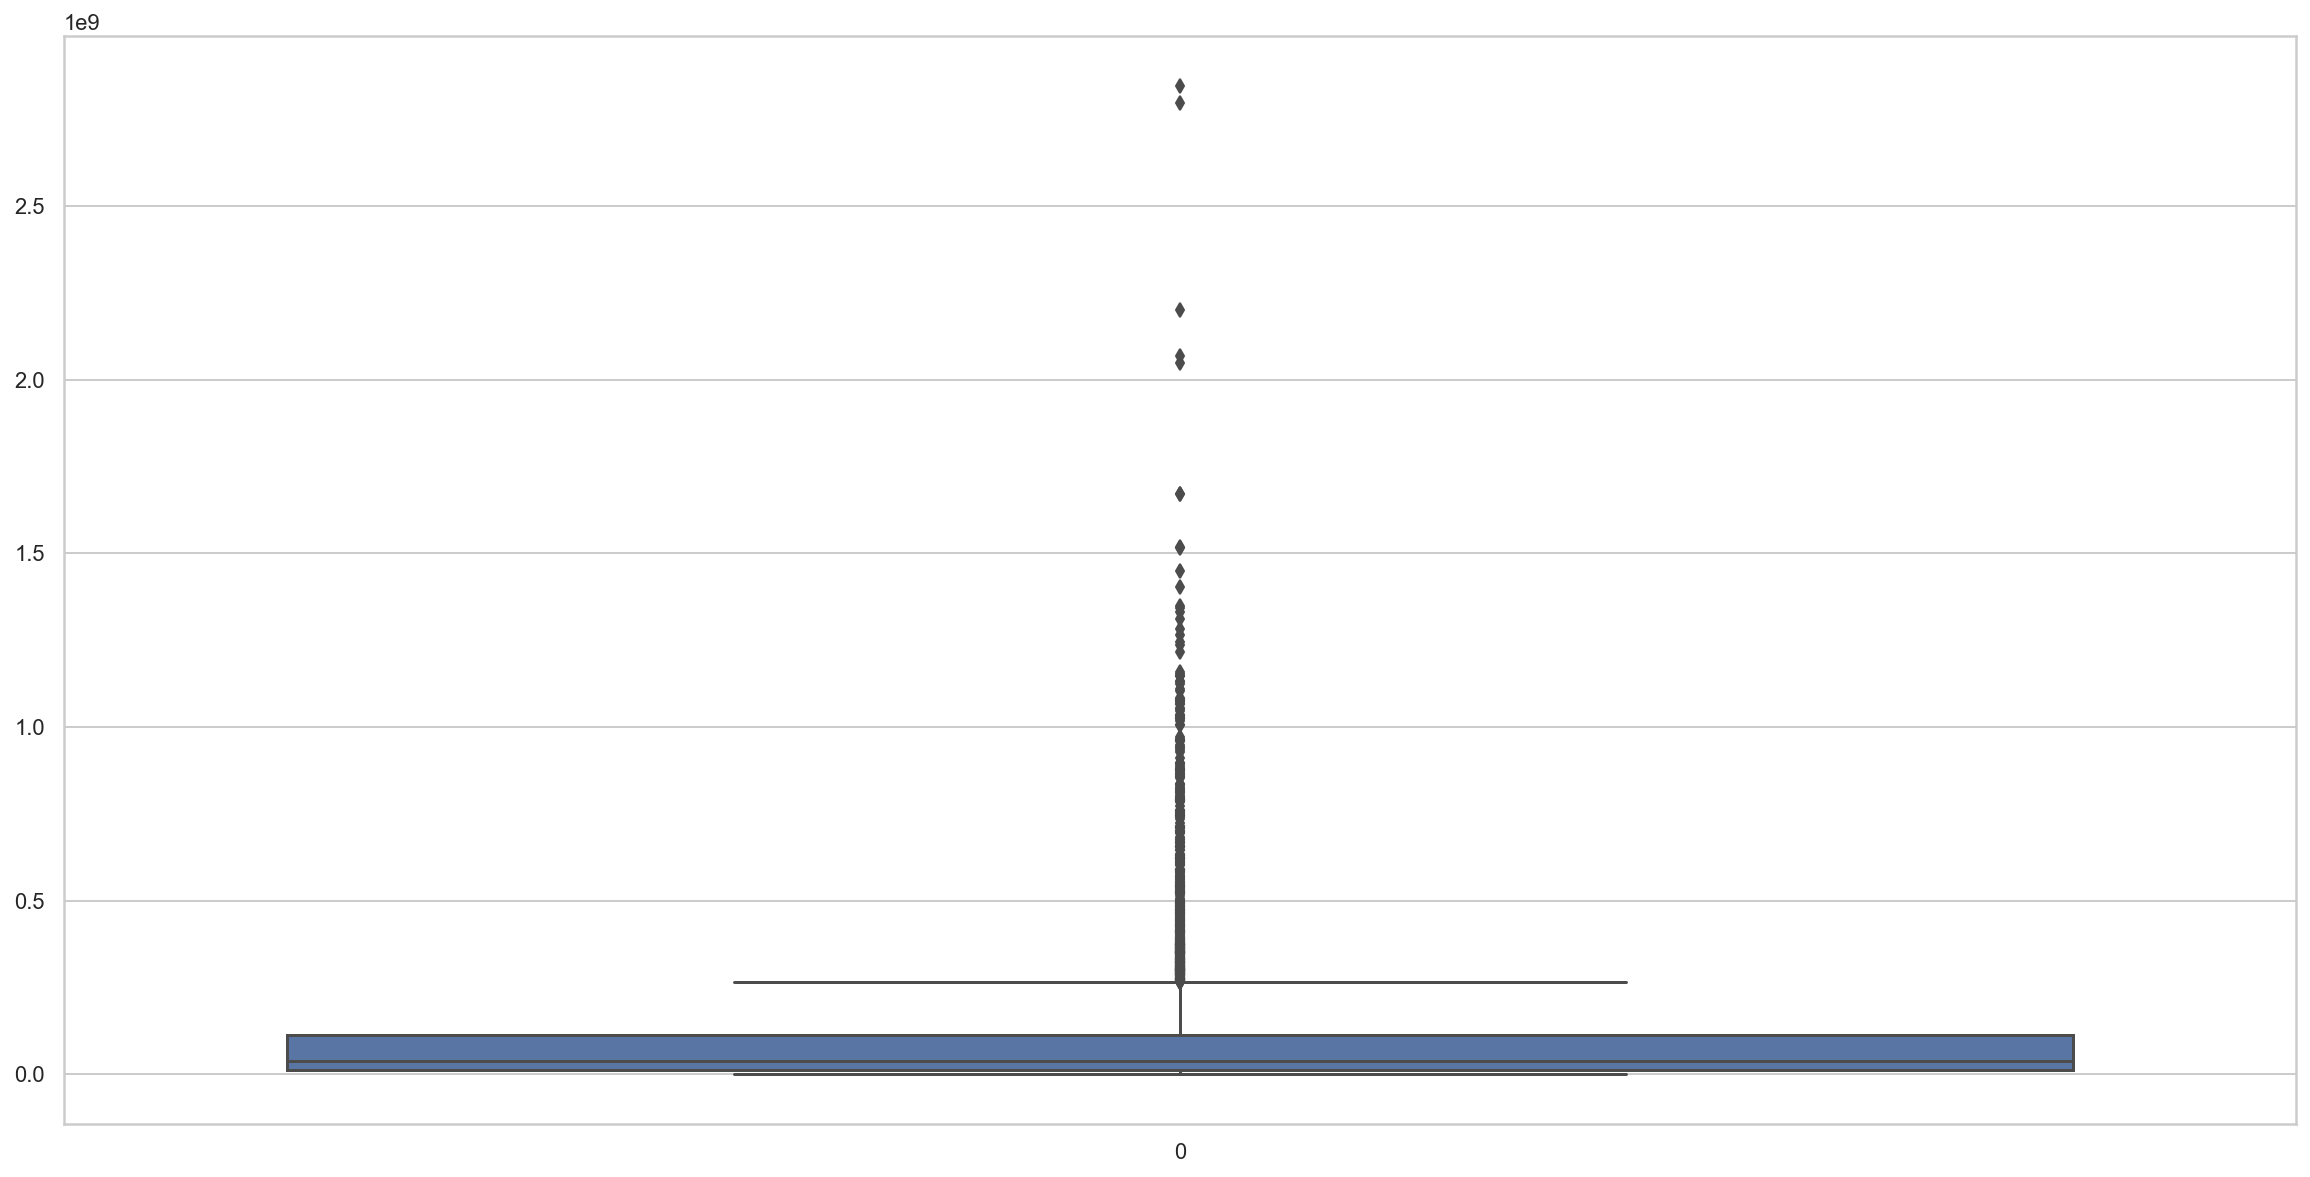

In [270]:
plt.figure(figsize=[20,10])
sns.boxplot(data=ModelMovies['gross'])

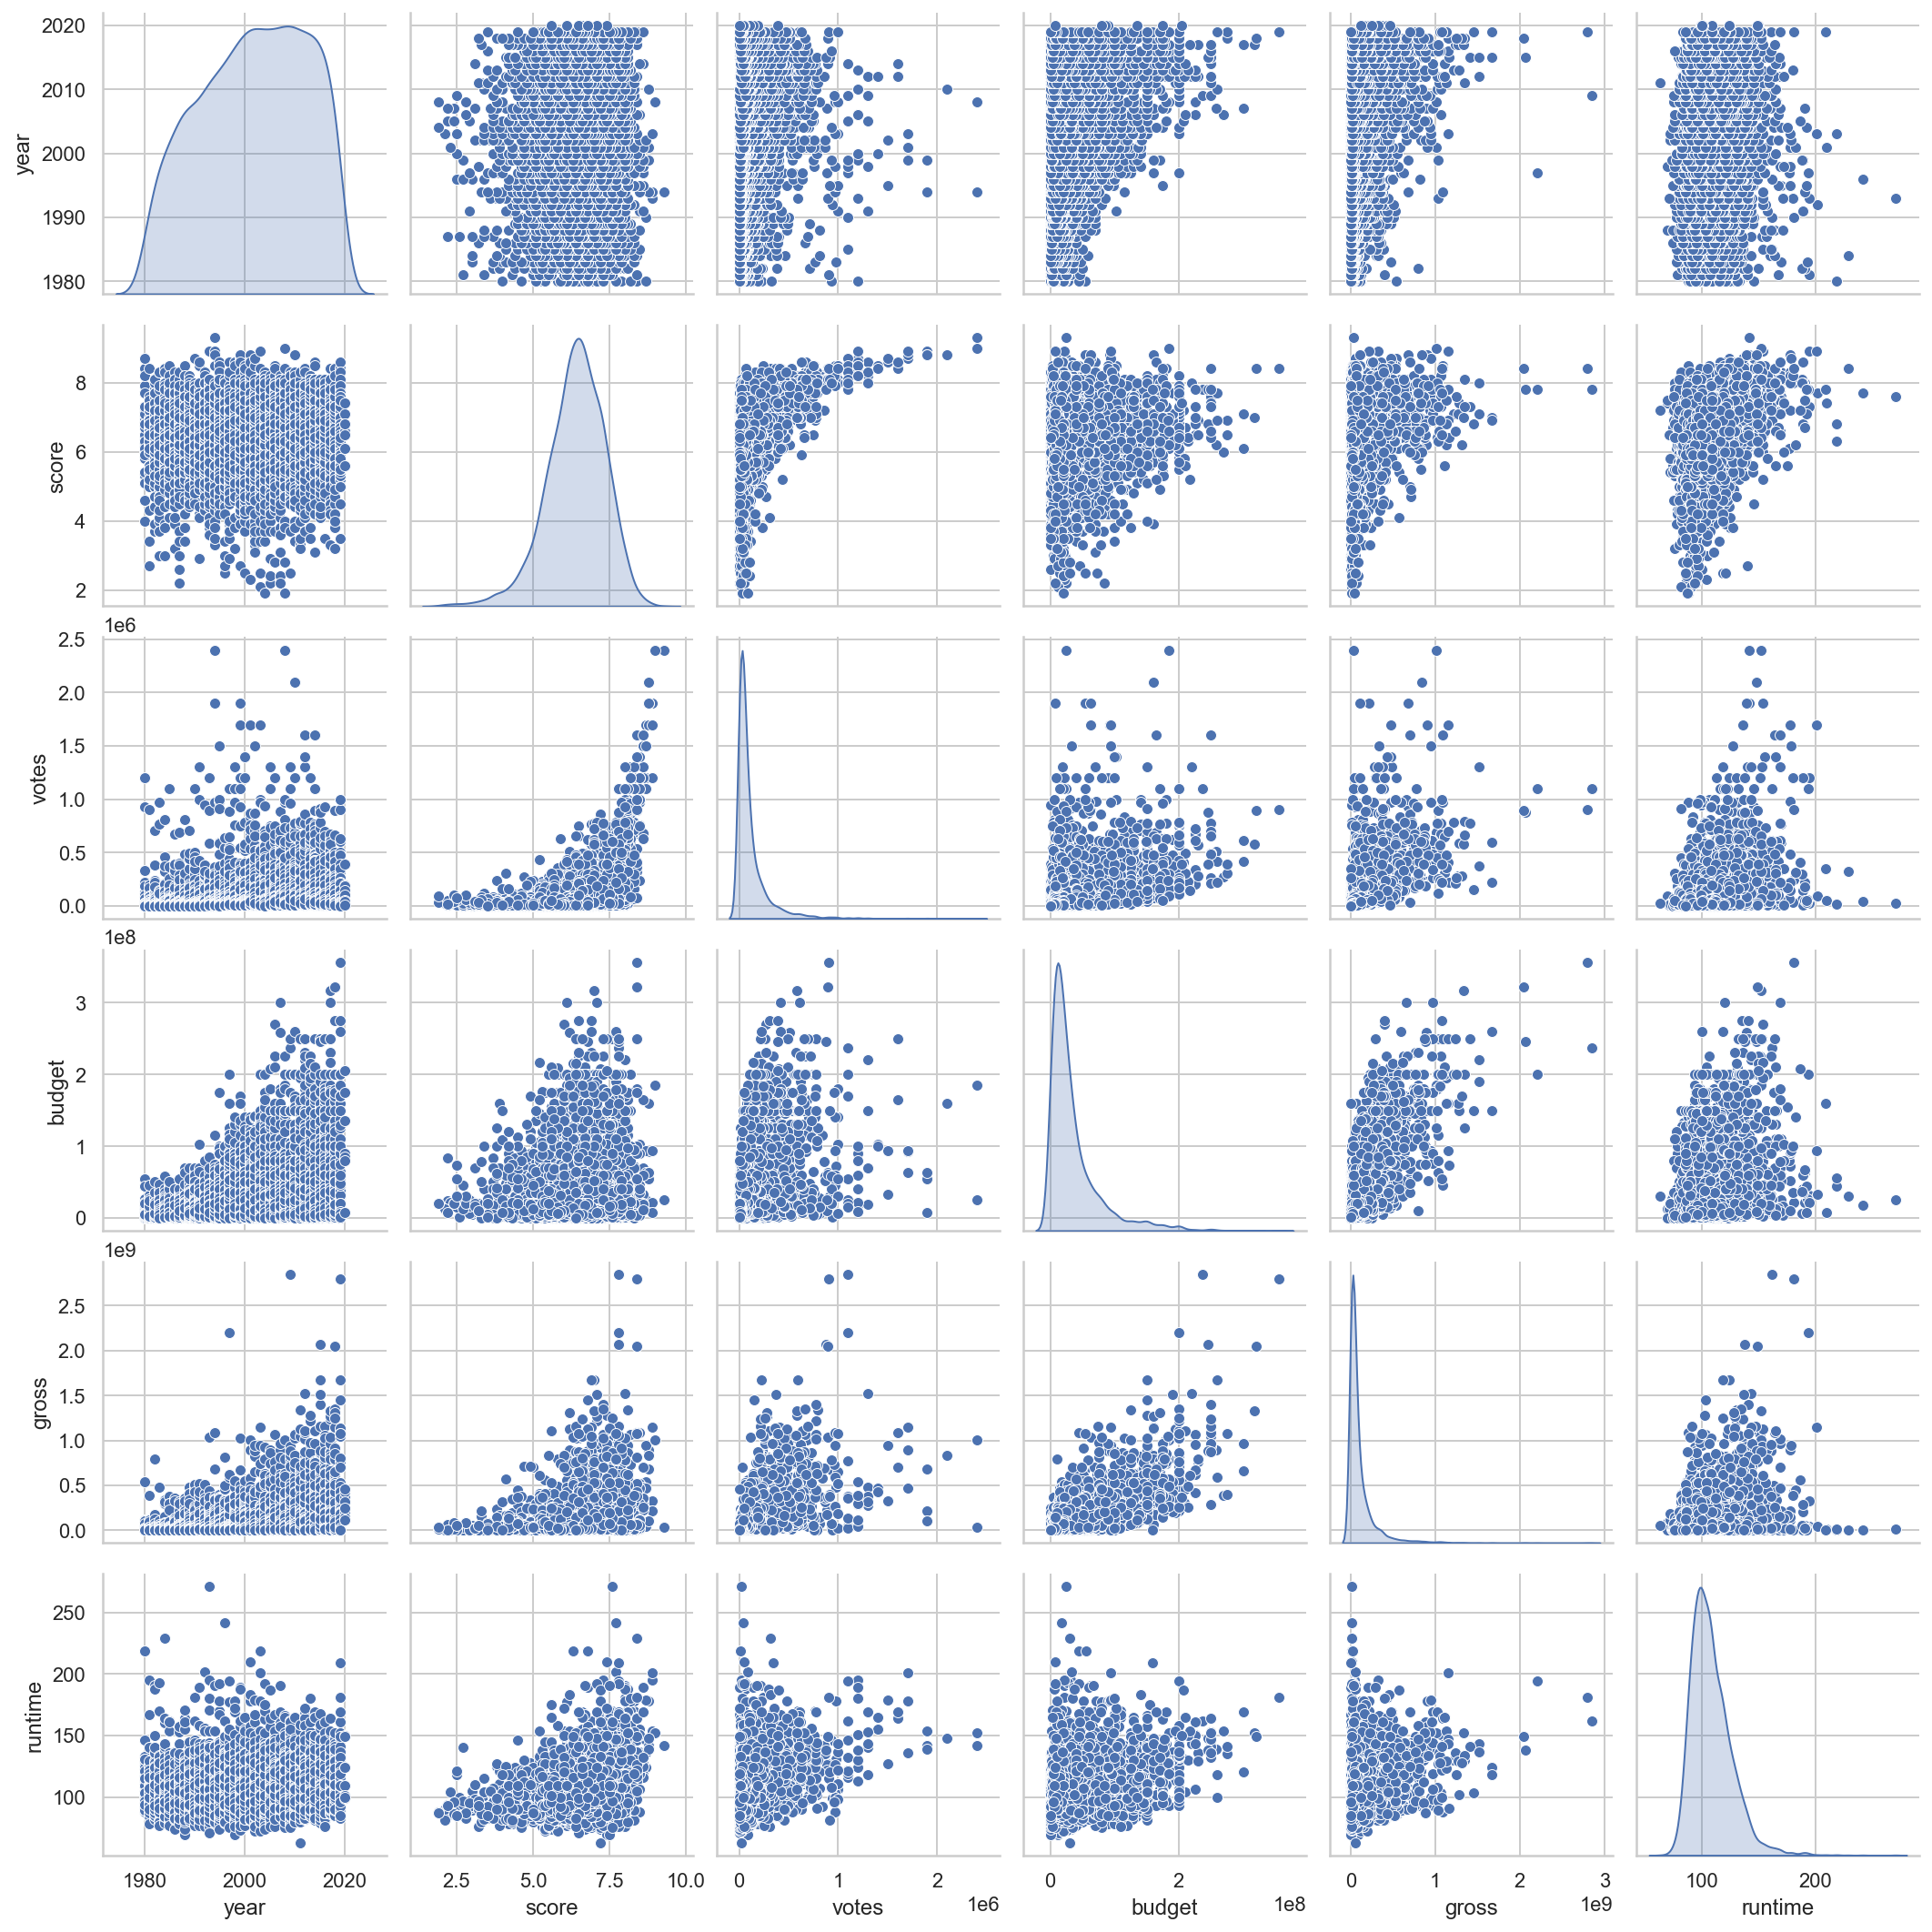

In [271]:
sns.pairplot(ModelMovies,diag_kind='kde')

In [272]:
coded_Movies = ModelMovies

In [273]:
coded_Movies

title     rating      genre  \
0                                        The Shining          R      Drama   
1                                    The Blue Lagoon          R  Adventure   
2     Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                          Airplane!         PG     Comedy   
4                                         Caddyshack          R     Comedy   
...                                              ...        ...        ...   
7648                               Bad Boys for Life          R     Action   
7649                              Sonic the Hedgehog         PG     Action   
7650                                        Dolittle         PG  Adventure   
7651                            The Call of the Wild         PG  Adventure   
7652                               The Eight Hundred  Not Rated     Action   

      year                           released  score      votes  \
0     1980      June 13, 1980 (United States)    8.4   927000.0   
1     1980       July 2, 1980 (United States)    5.8    65000.0   
2     1980      June 20, 1980 (United States)    8.7  1200000.0   
3     1980       July 2, 1980 (United States)    7.7   221000.0   
4     1980      July 25, 1980 (United States)    7.3   108000.0   
...    ...                                ...    ...        ...   
7648  2020   January 17, 2020 (United States)    6.6   140000.0   
7649  2020  February 14, 2020 (United States)    6.5   102000.0   
7650  2020   January 17, 2020 (United States)    5.6    53000.0   
7651  2020  February 21, 2020 (United States)    6.8    42000.0   
7652  2020    August 28, 2020 (United States)    6.8     3700.0   

             director                   writer               star  \
0     Stanley Kubrick             Stephen King     Jack Nicholson   
1      Randal Kleiser  Henry De Vere Stacpoole     Brooke Shields   
2      Irvin Kershner           Leigh Brackett        Mark Hamill   
3        Jim Abrahams             Jim Abrahams        Robert Hays   
4        Harold Ramis       Brian Doyle-Murray        Chevy Chase   
...               ...                      ...                ...   
7648     Adil El Arbi              Peter Craig         Will Smith   
7649      Jeff Fowler                Pat Casey       Ben Schwartz   
7650   Stephen Gaghan           Stephen Gaghan  Robert Downey Jr.   
7651    Chris Sanders            Michael Green      Harrison Ford   
7652          Hu Guan                  Hu Guan    Zhi-zhong Huang   

             country     budget      gross  \
0     United Kingdom   19000000   46998772   
1      United States    4500000   58853106   
2      United States   18000000  538375067   
3      United States    3500000   83453539   
4      United States    6000000   39846344   
...              ...        ...        ...   
7648   United States   90000000  426505244   
7649   United States   85000000  319715683   
7650   United States  175000000  245487753   
7651          Canada  135000000  111105497   
7652           China   80000000  461421559   

                                  company  runtime  
0                            Warner Bros.    146.0  
1                       Columbia Pictures    104.0  
2                               Lucasfilm    124.0  
3                      Paramount Pictures     88.0  
4                          Orion Pictures     98.0  
...                                   ...      ...  
7648                    Columbia Pictures    124.0  
7649                   Paramount Pictures     99.0  
7650                   Universal Pictures    101.0  
7651                 20th Century Studios    100.0  
7652  Beijing Diqi Yinxiang Entertainment    149.0  

[5421 rows x 15 columns]

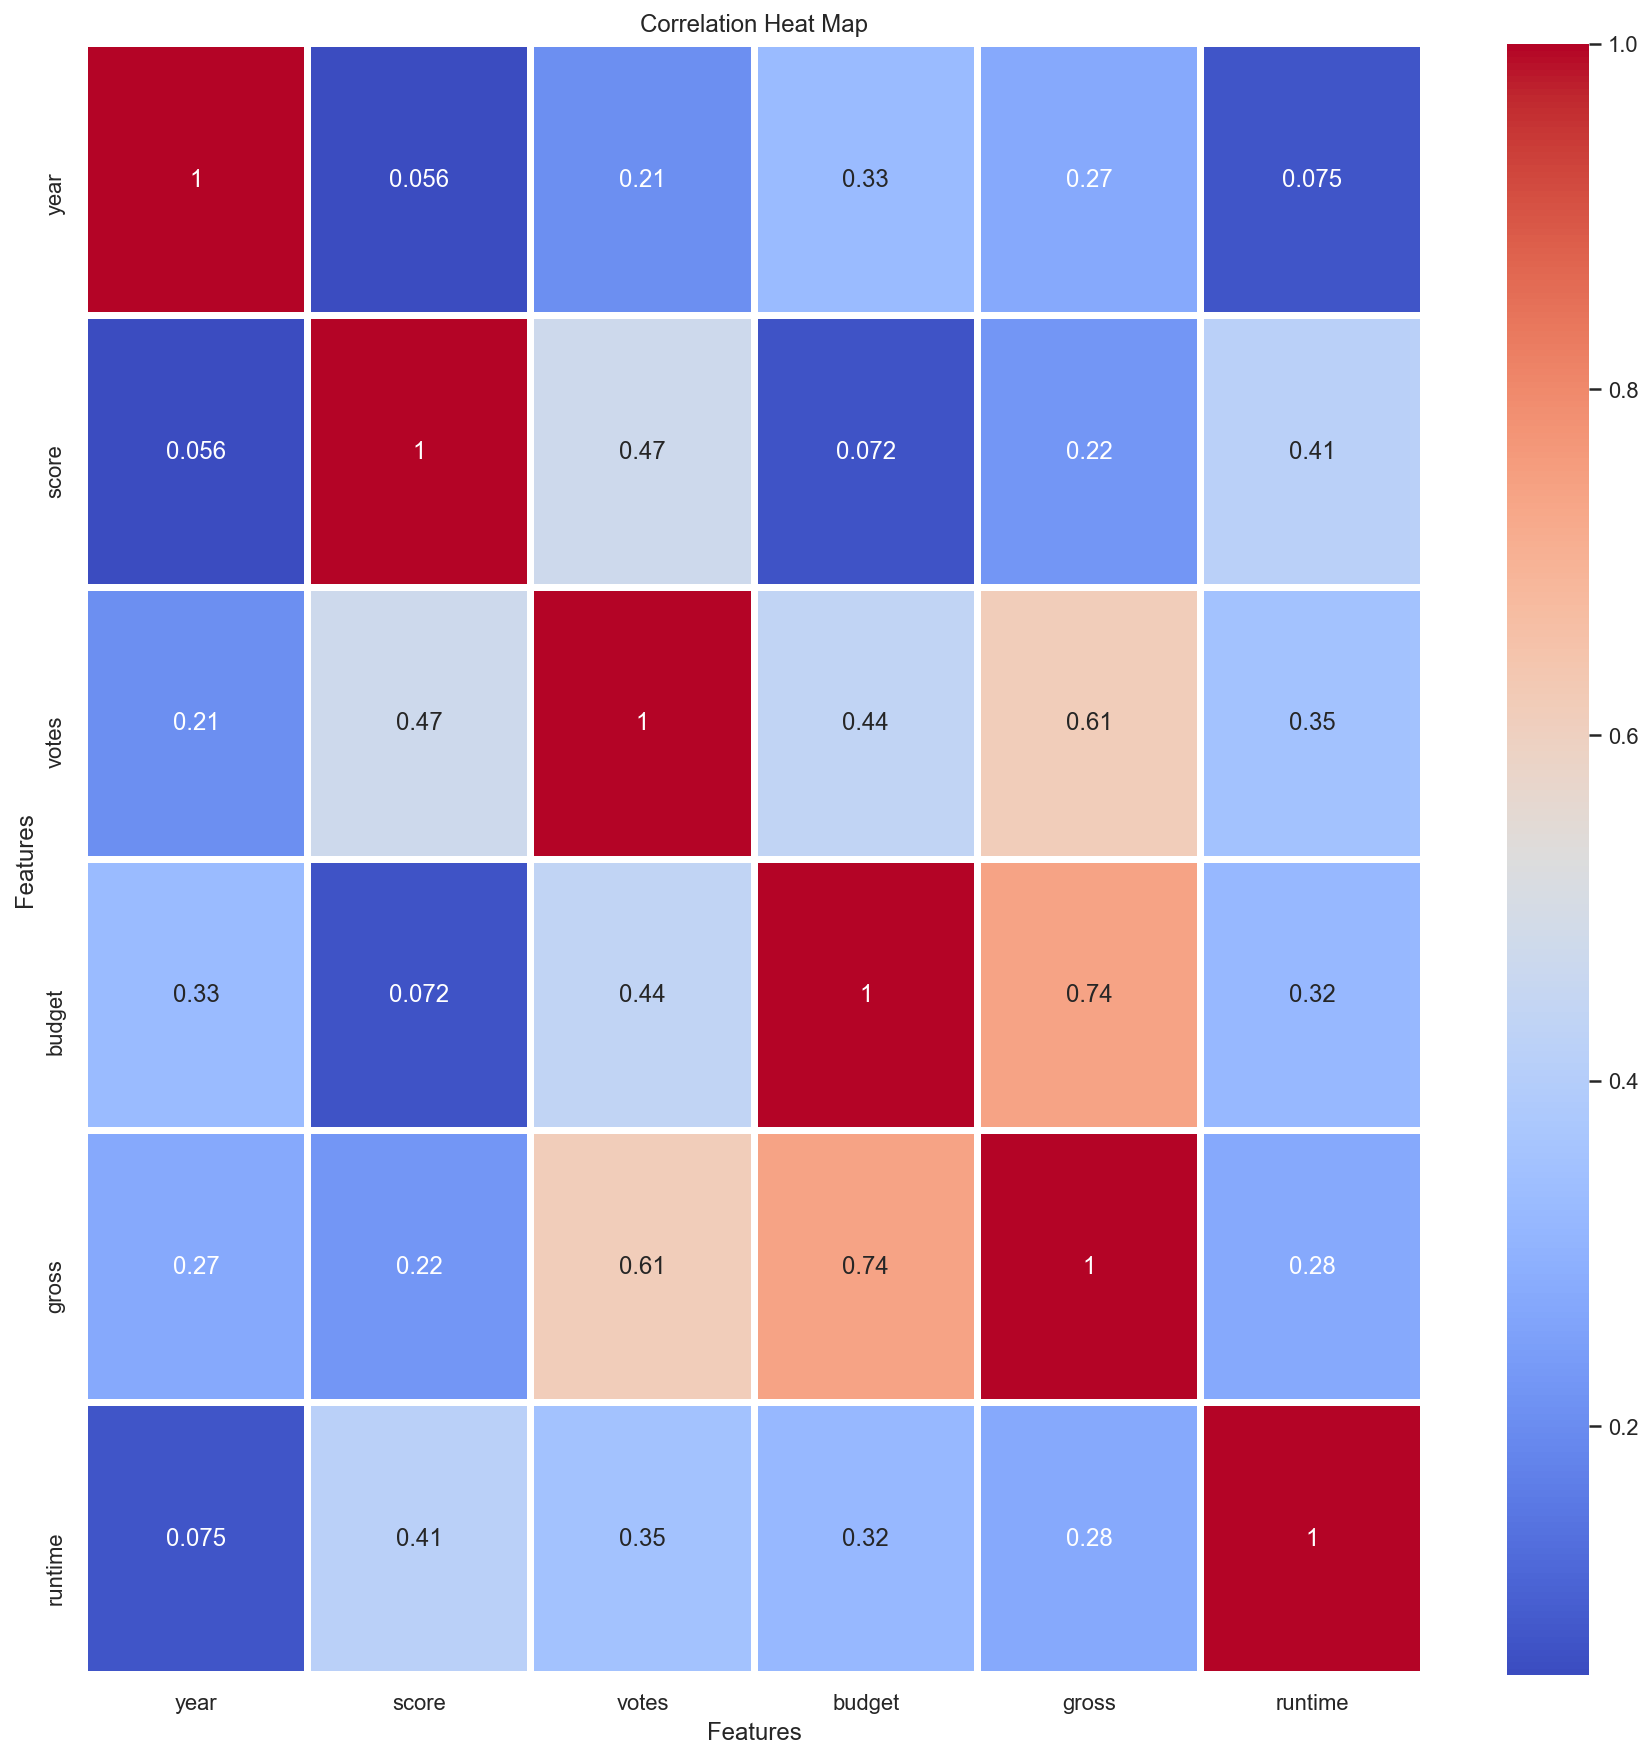

In [274]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(coded_Movies.corr(), annot = True, cmap= "coolwarm",linewidths=3)
plt.title('Correlation Heat Map')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### Chagne the Object columns to categorical values

In [275]:
for col_name in coded_Movies.columns:
    if(coded_Movies[col_name].dtype == 'object'):
        coded_Movies[col_name] = coded_Movies[col_name].astype('category')
        coded_Movies[col_name] = coded_Movies[col_name].cat.codes
coded_Movies.head()  

title  rating  genre  year  released  score      votes  director  writer  \
0   4692       6      6  1980      1304    8.4   927000.0      1795    2832   
1   3929       6      1  1980      1127    5.8    65000.0      1578    1158   
2   3641       4      0  1980      1359    8.7  1200000.0       757    1818   
3    204       4      4  1980      1127    7.7   221000.0       889    1413   
4    732       6      4  1980      1170    7.3   108000.0       719     351   

   star  country    budget      gross  company  runtime  
0   699       46  19000000   46998772     1426    146.0  
1   214       47   4500000   58853106      452    104.0  
2  1157       47  18000000  538375067      945    124.0  
3  1474       47   3500000   83453539     1108     88.0  
4   271       47   6000000   39846344     1083     98.0

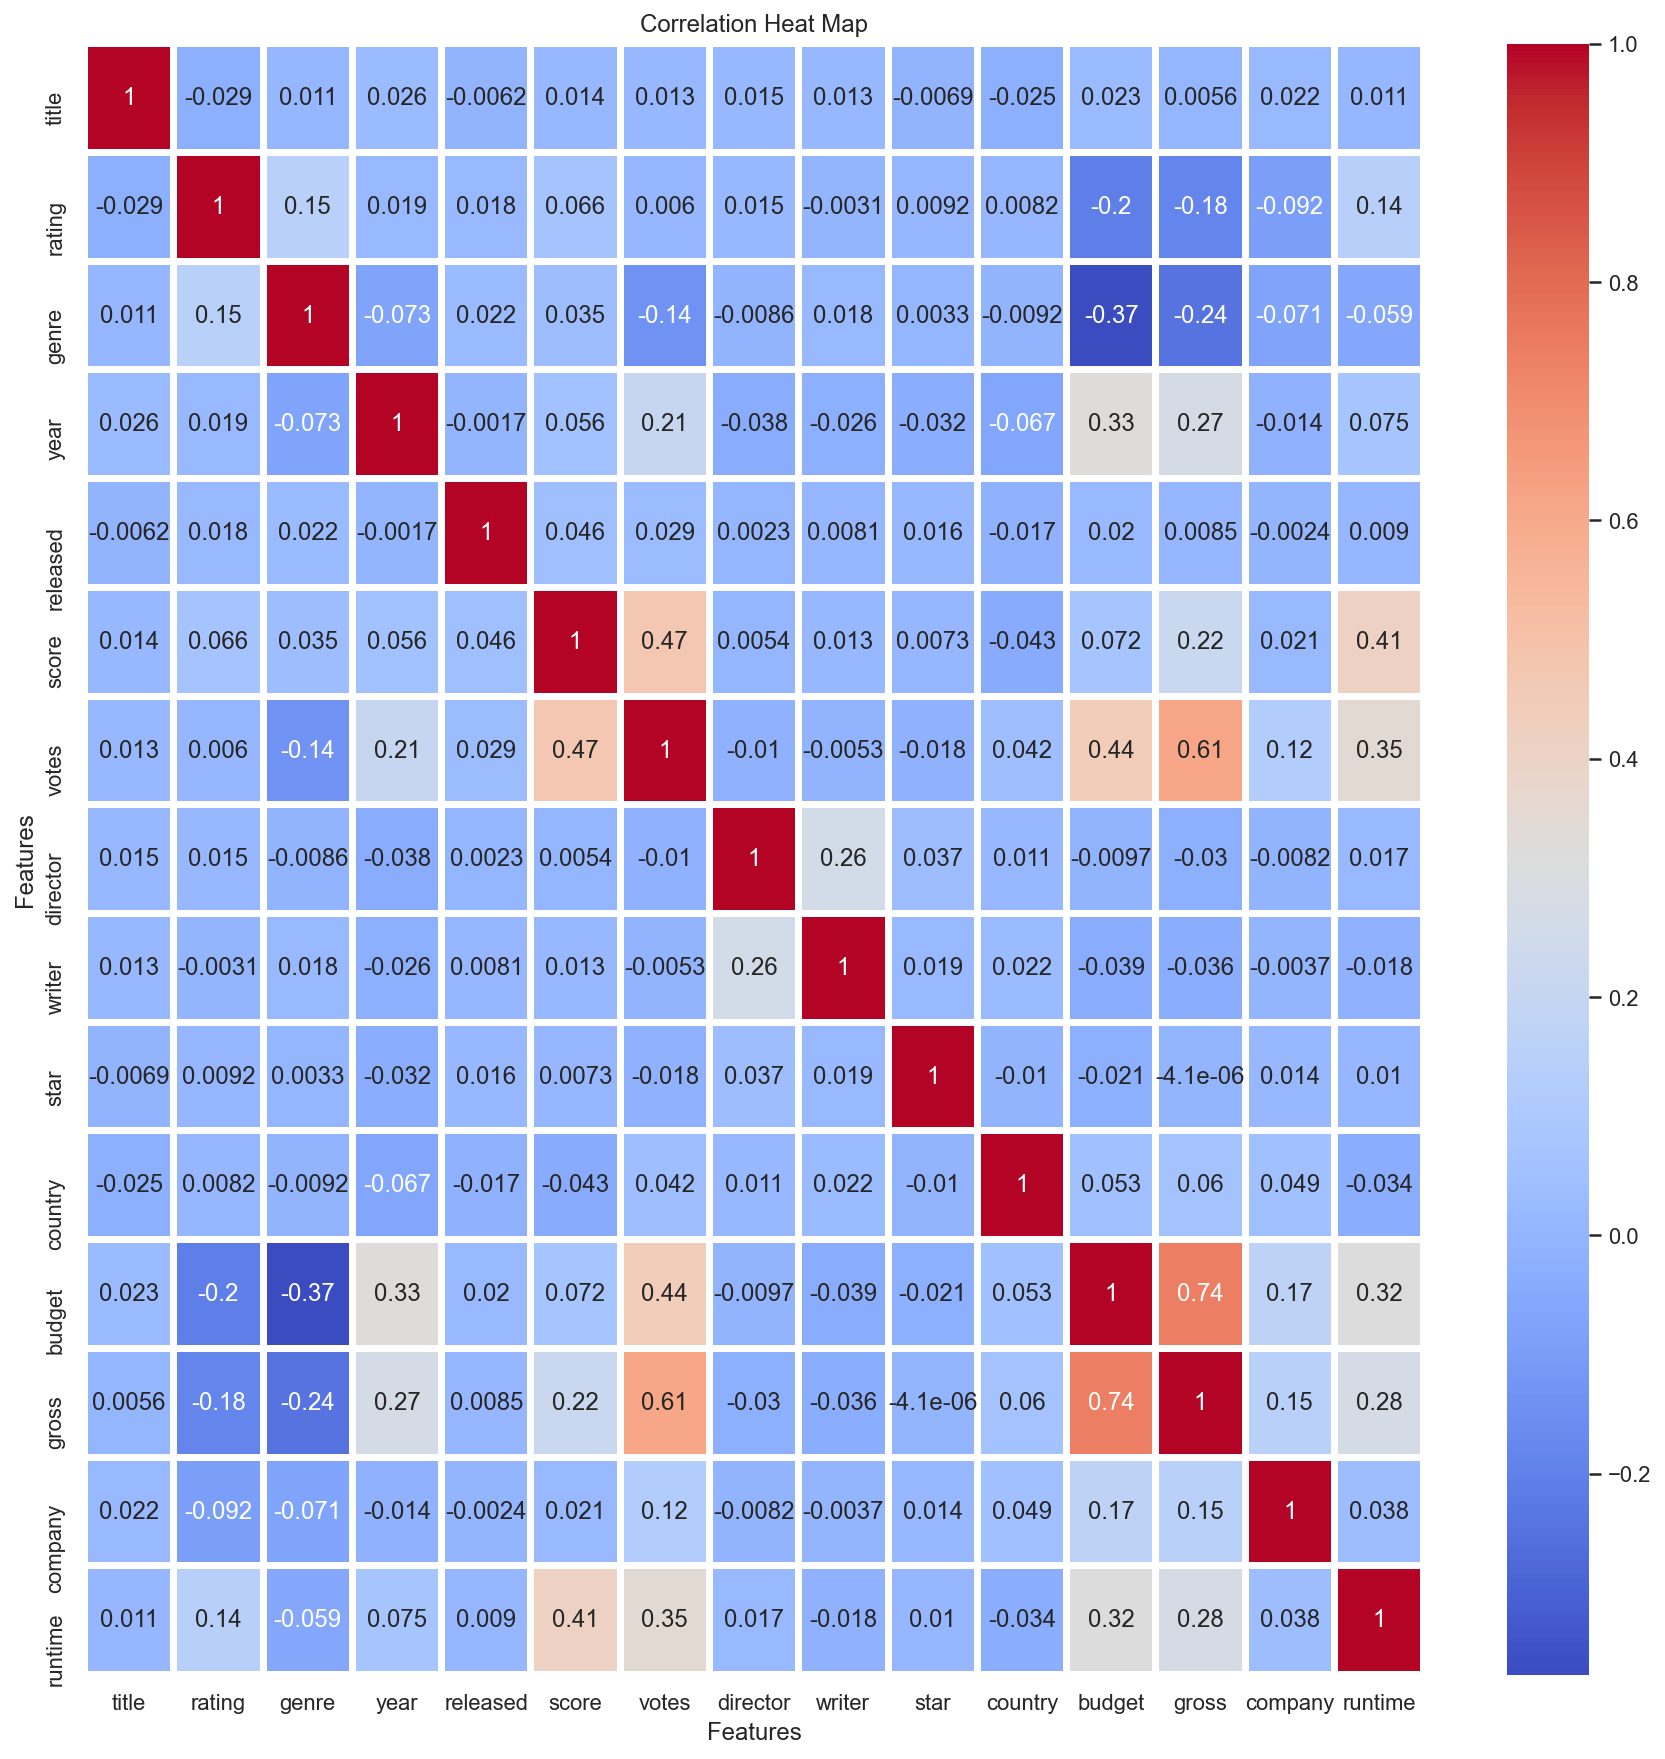

In [276]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(coded_Movies.corr(), annot = True, cmap= "coolwarm",linewidths=3)
plt.title('Correlation Heat Map')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [277]:
coded_Movies.corr()['gross'].sort_values(ascending=False)

gross       1.000000
budget      0.740247
votes       0.614751
runtime     0.275796
year        0.274321
score       0.222556
company     0.149553
country     0.060078
released    0.008501
title       0.005639
star       -0.000004
director   -0.029560
writer     -0.035885
rating     -0.181906
genre      -0.244101
Name: gross, dtype: float64

## The highest corralation 

In [278]:
by2 = coded_Movies.corr().unstack()
sorted_by2 = by2.sort_values(ascending=False)
sorted_by2[((sorted_by2) > 0.5) & ((sorted_by2) < 1 )]

gross   budget    0.740247
budget  gross     0.740247
votes   gross     0.614751
gross   votes     0.614751
dtype: float64

## USING regplot to show the regression line

### bugget with gross

<AxesSubplot:xlabel='budget', ylabel='gross'>

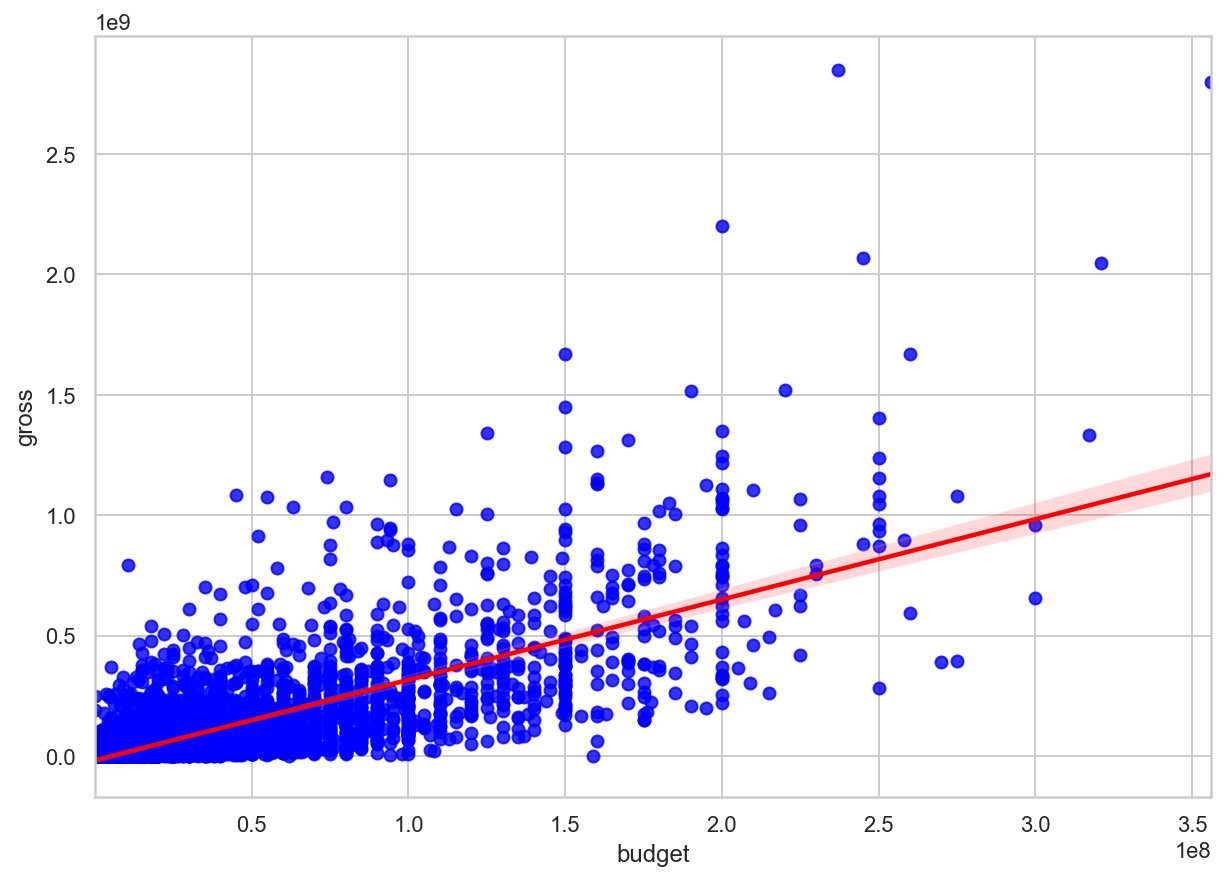

In [279]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.regplot(x='budget', y='gross', data=ModelMovies, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'})

### votes with gross

<AxesSubplot:xlabel='votes', ylabel='gross'>

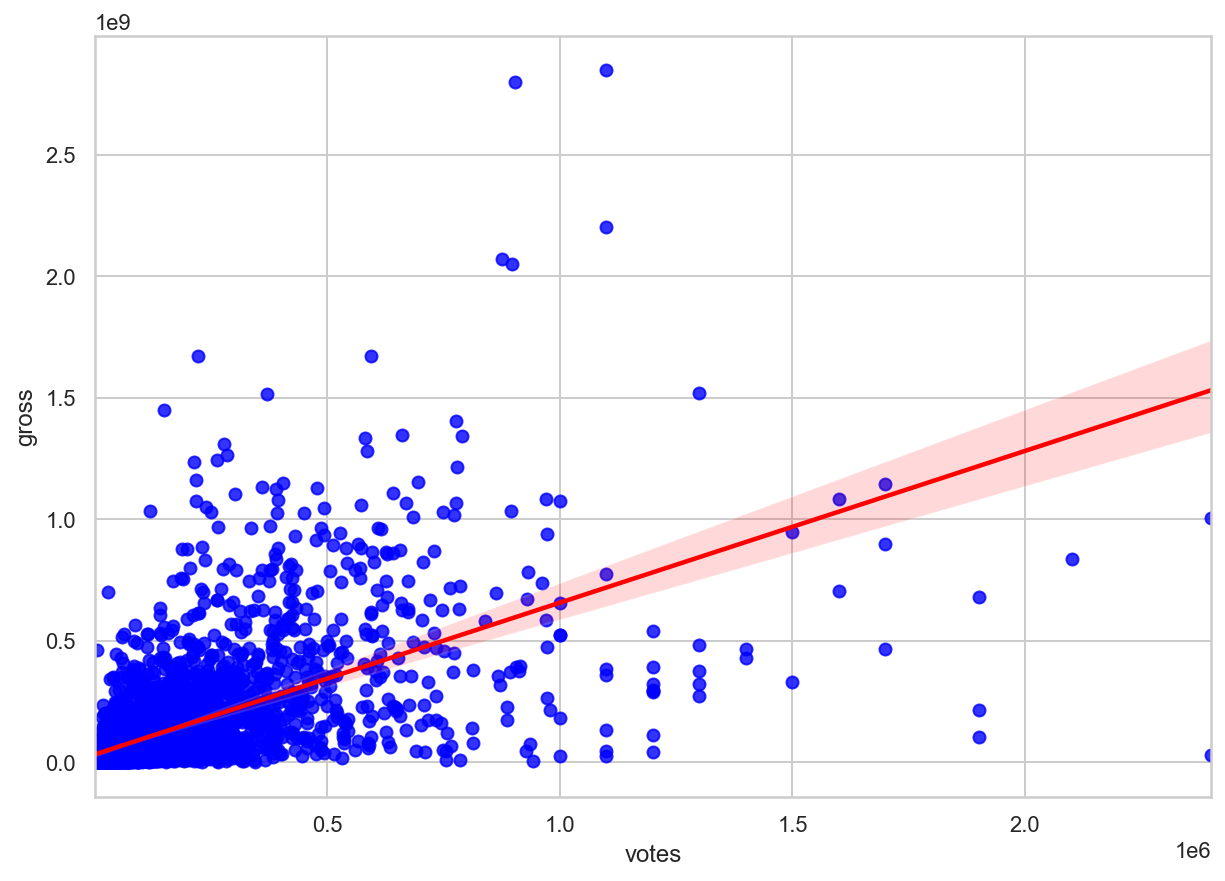

In [280]:
fig, ax = plt.subplots(figsize = (10, 7))
sns.regplot(x='votes', y='gross', data=ModelMovies, scatter_kws={'color': 'blue'}, line_kws = {'color': 'red'})

## USING jointplot to show the regression line

<Figure size 1440x720 with 0 Axes>

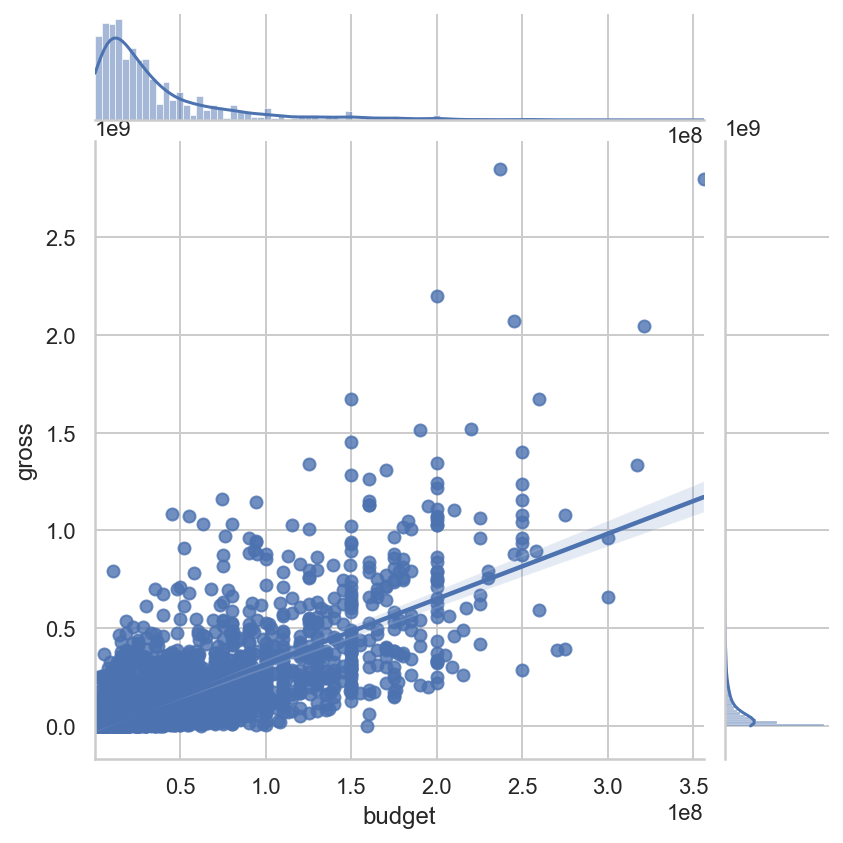

In [281]:
plt.figure(figsize=[20,10])
sns.color_palette("mako", as_cmap=True)
sns.jointplot(x="budget" , y="gross", kind="reg", data=ModelMovies);

## USING pairplot to show the regression line by budget and votes as well with gross

<Figure size 1440x720 with 0 Axes>

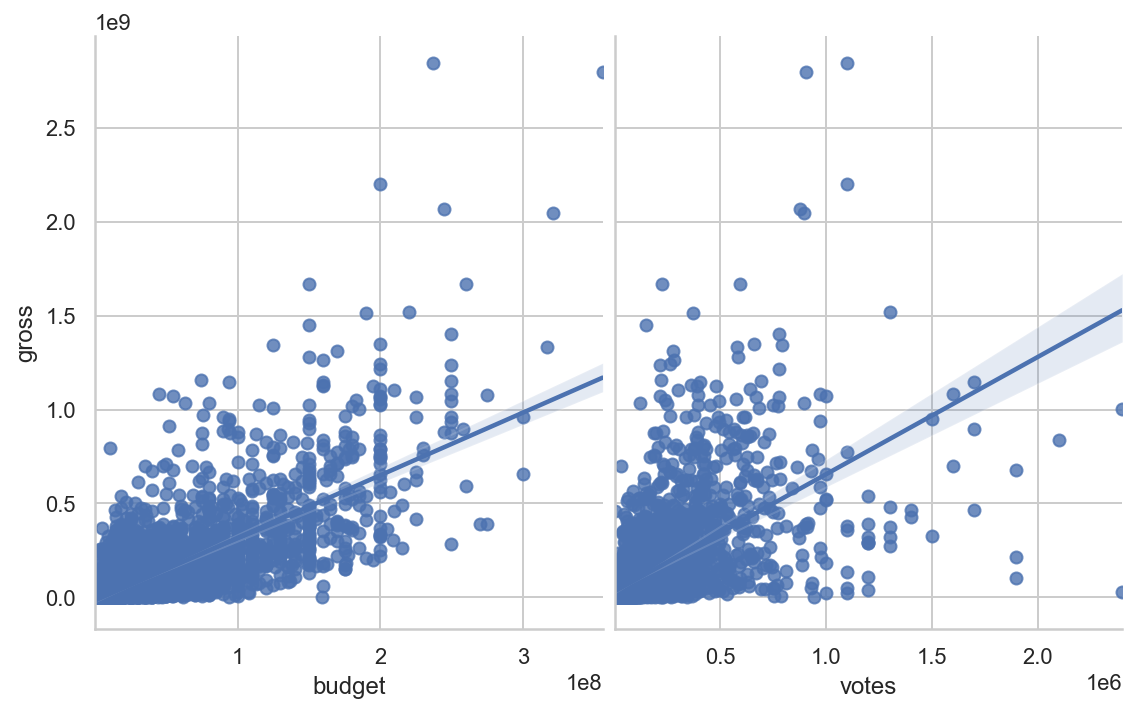

In [282]:
plt.figure(figsize=[20,10])
sns.pairplot(ModelMovies, x_vars=["budget", "votes"], y_vars=["gross"], height=5, aspect=.8, kind="reg");

<AxesSubplot:xlabel='rating', ylabel='gross'>

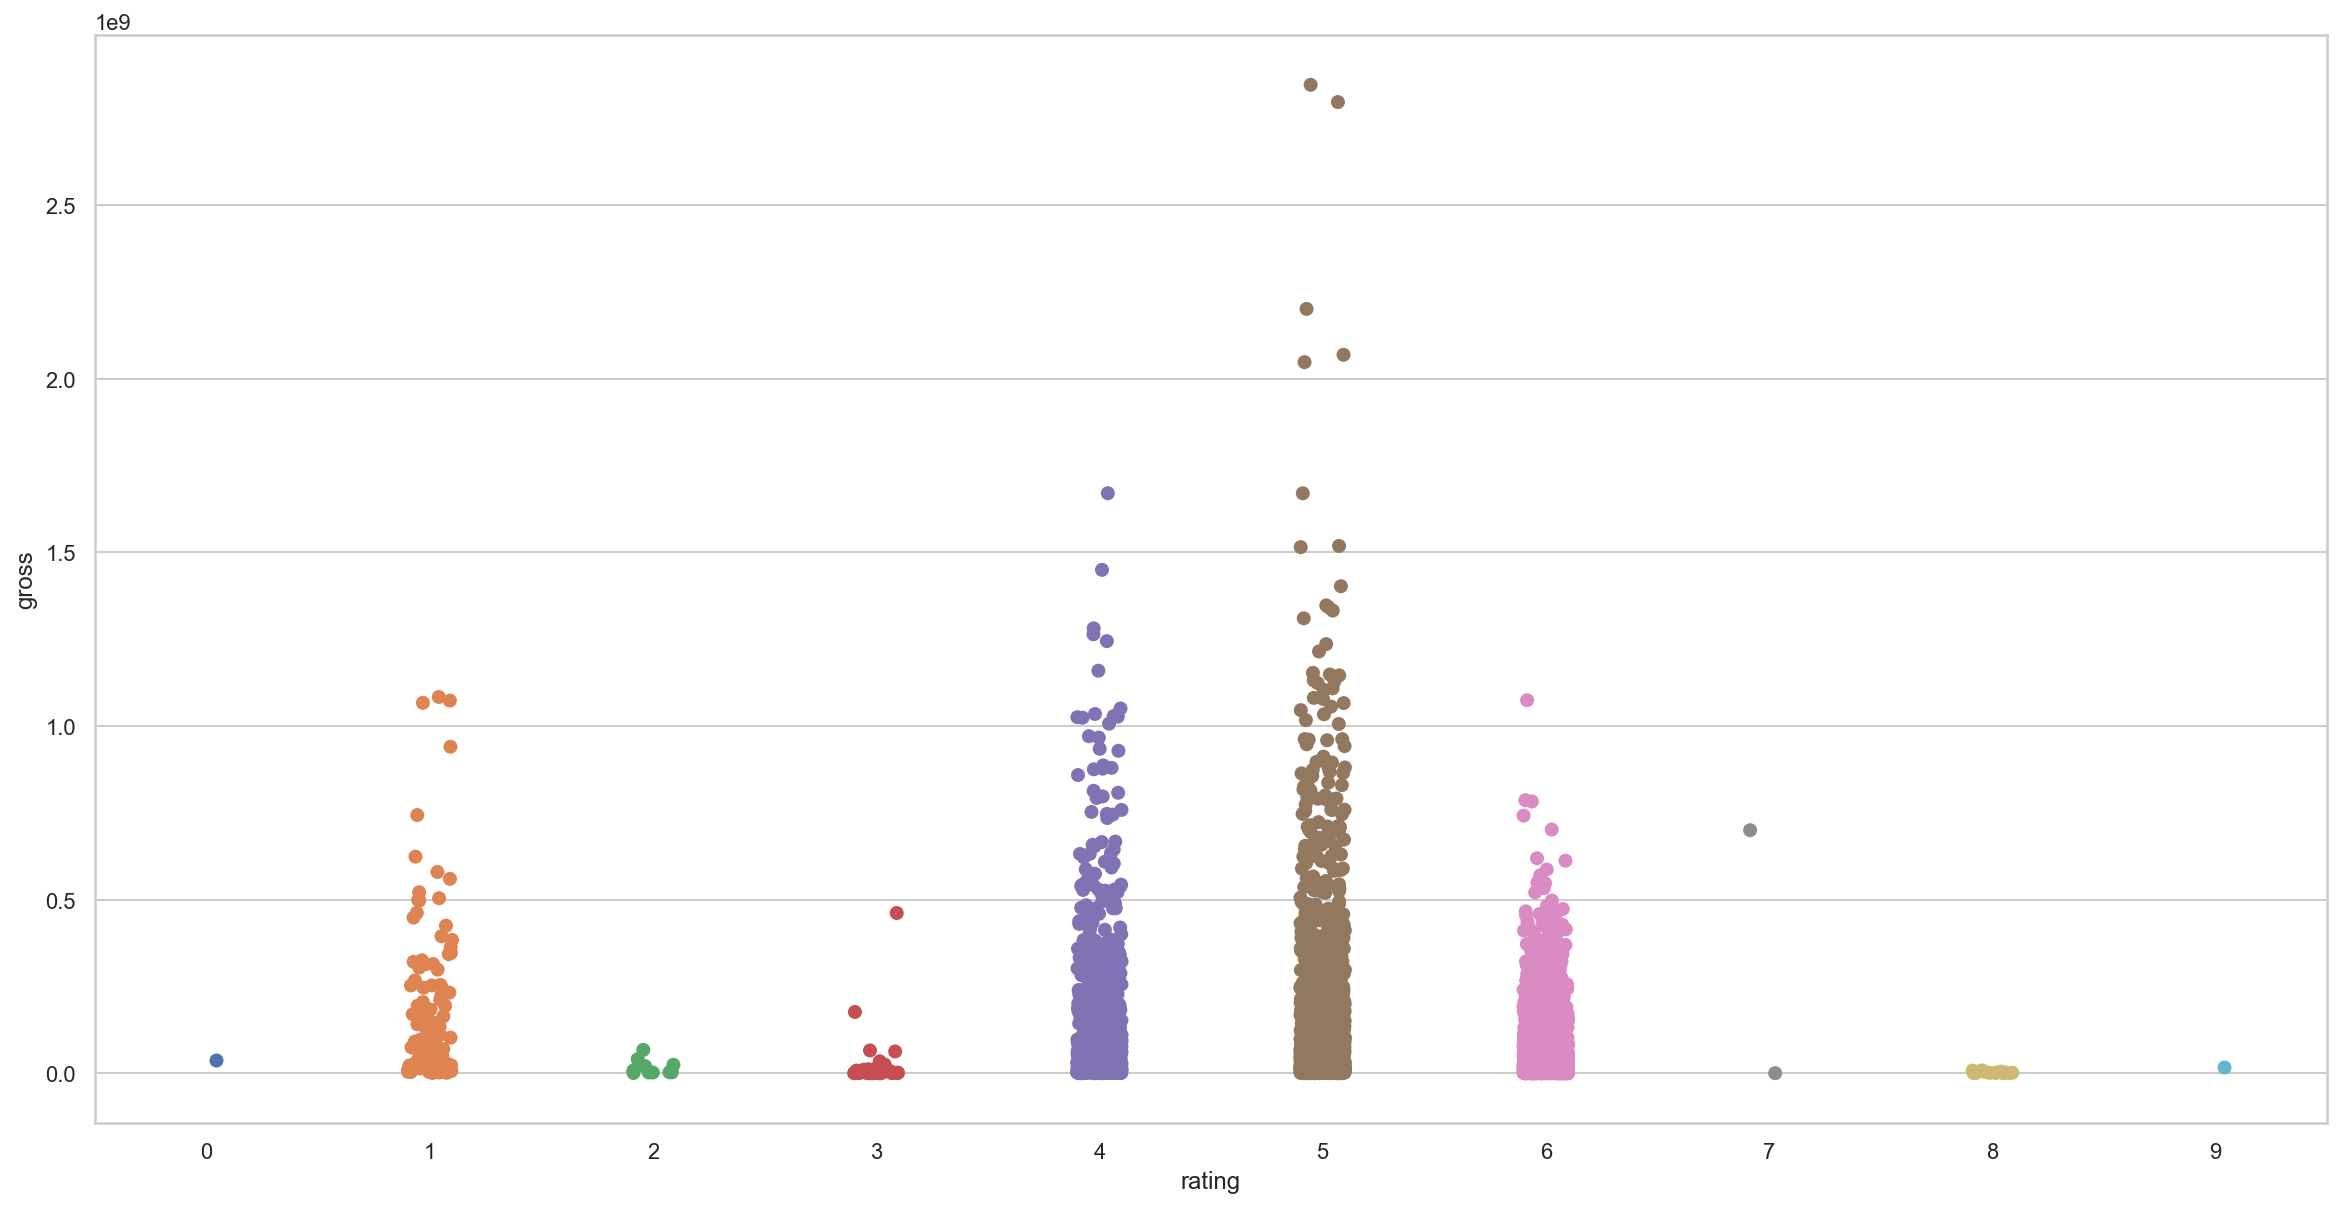

In [283]:
plt.figure(figsize=[20,10])
sns.stripplot(x="rating", y="gross", data = ModelMovies,size=7)

## importing needed libraries

In [284]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

### statsmodels

In [285]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('gross ~ title + rating + genre + year + released + score + votes + director + writer + star + country + budget + company+  runtime' , data=ModelMovies, return_type="dataframe")

# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  gross   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     749.1
Date:                Thu, 21 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:16:00   Log-Likelihood:            -1.0803e+05
No. Observations:                5421   AIC:                         2.161e+05
Df Residuals:                    5406   BIC:                         2.162e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.067e+08   3.05e+08     -1.661      0.097    -1.1e+09    9.12e+07
title      -1758.1509    967.370     -1.817      0.069   -3654.586     138.284
rating     -1.223e+07   1.56e+06     -7.829      0.000   -1.53e+07   -9.17e+06
genre       2.006e+06   6.14e+05      3.270      0.001    8.03e+05    3.21e+06
year        2.658e+05   1.52e+05      1.748      0.081   -3.23e+04    5.64e+05
released   -3506.2369   1995.084     -1.757      0.079   -7417.405     404.932
score       6.023e+06    1.9e+06      3.164      0.002    2.29e+06    9.76e+06
votes        363.2417     10.416     34.873      0.000     342.822     383.662
director   -5090.7350   2561.875     -1.987      0.047   -1.01e+04     -68.427
writer     -1720.3451   1672.156     -1.029      0.304   -4998.445    1557.754
star        7369.3677   2790.083      2.641      0.008    1899.681    1.28e+04
country     2.867e+05   1.45e+05      1.976      0.048    2253.527    5.71e+05
budget         2.6323      0.048     54.615      0.000       2.538       2.727
company     1632.2735   3552.831      0.459      0.646   -5332.708    8597.255
runtime    -4.011e+05   9.78e+04     -4.102      0.000   -5.93e+05   -2.09e+05
==============================================================================
Omnibus:                     4675.454   Durbin-Watson:                   1.888
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           430460.382
Skew:                           3.646   Prob(JB):                         0.00
Kurtosis:                      46.042   Cond. No.                     1.13e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [286]:
fit.predict()

array([ 3.30796258e+08, -2.82650946e+07,  4.61951373e+08, ...,
        4.63700402e+08,  3.46432701e+08,  1.88504427e+08])

In [287]:
fit.resid

0      -2.837975e+08
1       8.711820e+07
2       7.642369e+07
3      -1.063880e+07
4       1.840208e+07
            ...     
7648    1.724726e+08
7649    7.892225e+07
7650   -2.182126e+08
7651   -2.353272e+08
7652    2.729171e+08
Length: 5421, dtype: float64

# Regression with sklearn


## Creating LinearRegression model and assinging values to X and y

In [288]:
#X = coded_Movies[['title','rating','genre','year','released','score','votes','director','writer','star','country','budget','company','runtime']]
X = coded_Movies[['score','votes','budget']]

y = coded_Movies['gross']
lr = LinearRegression()


## Fitting X and y to the model and see the score

In [289]:
lr.fit(X, y)
lr.score(X,y)



0.651851689106304

In [290]:
y_predicted = lr.predict(X)

In [291]:
y_predicted

array([3.53273252e+08, 7.30162473e+05, 4.48760588e+08, ...,
       4.45242680e+08, 3.39178100e+08, 1.80580156e+08])

In [292]:
lr.intercept_

-50111357.55786304

In [293]:
lr.coef_


array([2.72662813e+06, 3.56427631e+02, 2.63539575e+00])

In [294]:
from sklearn.metrics import r2_score

In [295]:
r2_score(y, y_predicted)

0.651851689106304

# Train, Test Split with sklearn.model

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=17)

In [298]:
lr2 = LinearRegression()

In [299]:
lr2.fit(X_train, y_train)

LinearRegression()

In [300]:
predictions = lr2.predict(X_test)

In [301]:
predictions 

array([ 3.49932647e+07,  5.79625180e+08,  3.63585756e+07, ...,
        2.27645168e+06, -1.09598371e+07,  6.79445872e+07])

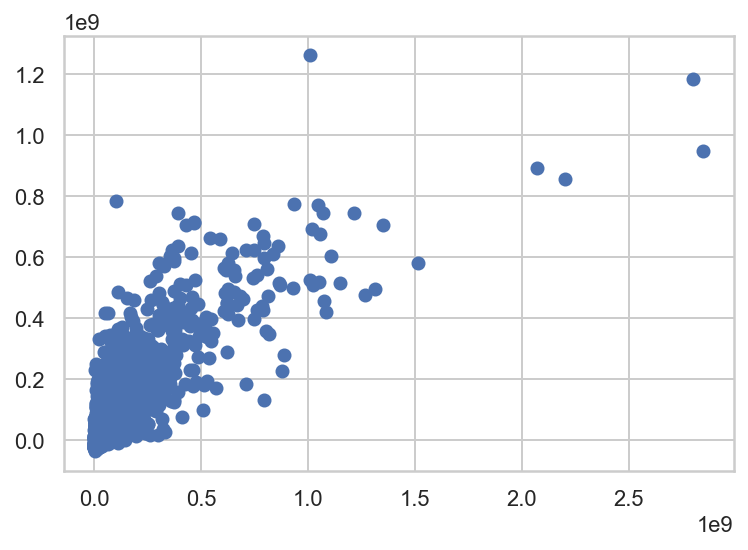

In [302]:
plt.scatter(y_test,predictions)


In [303]:
lr2.score(X_train, y_train)

0.6660888753297676

In [304]:
r2_score(y_test, predictions)

0.6303827664374018

In [305]:
adjusted_r_squared_1 = 1 - (1-(r2_score(y_test, predictions)))*(len(y)-1)/(len(y)-X.shape[1]-1)
adjusted_r_squared_1 

0.6301780679510278

In [306]:
intercept = lr2.intercept_

In [307]:
lr2.coef_

array([2.96456172e+06, 3.38986412e+02, 2.52619697e+00])

$$\widehat{Y} = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_3 + \beta_4X_4 + \beta_5X_5 + \beta_6X_6$$

## Do all regression one time to see the best fit model

### Import needed labraries

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

### Define X and y

In [309]:
X=coded_Movies[['title','rating','genre','year','released','score','votes','director','writer','star','country','budget','company','runtime']]
y = coded_Movies['gross']

### Split data 

In [310]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [311]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.30, random_state=3)

### Define the model

In [312]:
#set up the 3 models we're choosing from:

lm3 = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm3_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm3_poly = LinearRegression()

### Print the model outputs

In [313]:
#validate

lm3.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm3.score(X_val, y_val):.3f}')

lm3_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm3_reg.score(X_val_scaled, y_val):.3f}')

lm3_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm3_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.675
Ridge Regression val R^2: 0.675
Degree 2 polynomial regression val R^2: 0.721


### predict y by X_test

In [314]:
y_pred = lm3.predict(X_test)
r2_score(y_test, y_pred)

0.6537399607200194

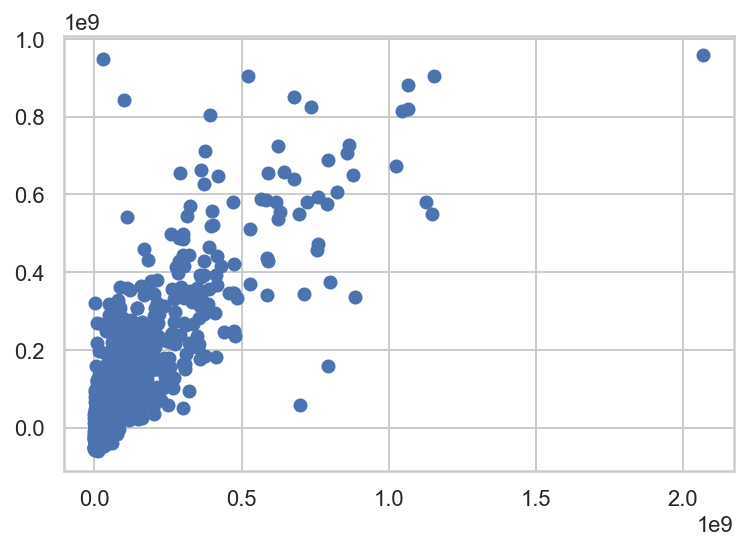

In [315]:
plt.scatter(y_test, y_pred)
